In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import json
import ast
import math
from wordcloud import WordCloud,STOPWORDS
from collections import OrderedDict, Counter
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

train_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/train.csv'
test_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/test.csv'
#train_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/train.csv'
#test_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/test.csv'

def str_to_list(x):
    return eval(x) if x and x != '#N/A' else []

list_cols = [
    'genres',
    'belongs_to_collection',
    'production_companies',
    'production_countries',
    'spoken_languages',
    'Keywords',
    'cast',
    'crew'
]

io_params = {
    'index_col': 'id',
    'converters': {col: str_to_list for col in list_cols}
}

dataset = pd.read_csv(train_path, **io_params)
dataset.info()
print(dataset.describe())
dataset.head()
x_labels = ['belongs_to_collection', 'budget', 'genres','homepage','imdb_id','original_language','original_title','overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']
y_labels =['revenue']
x_train, x_test, y_train, y_test = train_test_split(dataset[x_labels], dataset[y_labels], test_size=0.20, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   3000 non-null   object 
 11  production_countries   3000 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       3000 non-null   object 
 15  stat

In [2]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 643 to 861
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  2400 non-null   int64
dtypes: int64(1)
memory usage: 37.5 KB


REVENUE

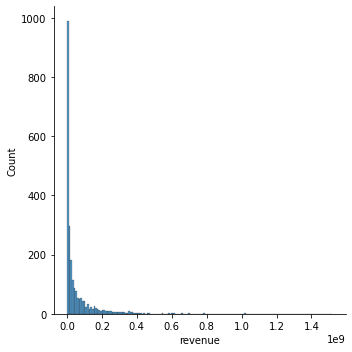

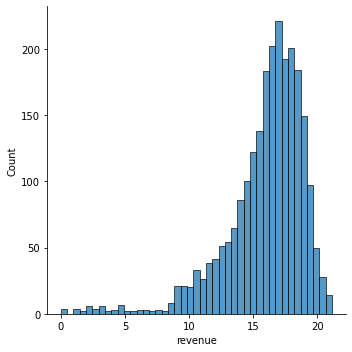

In [3]:
sns.displot(y_train.revenue)
sns.displot(np.log(y_train.revenue))

In [4]:
for i, e in enumerate(y_train['revenue']):
    if(e < 1000):
        print(i, e)

55 3
179 1
211 18
416 70
437 25
523 20
536 923
660 1
732 306
738 4
806 46
854 6
881 88
981 198
987 1
1006 671
1027 3
1188 30
1233 18
1257 30
1301 85
1313 204
1344 10
1381 12
1401 8
1410 15
1427 60
1506 25
1511 8
1533 1
1543 500
1583 3
1599 404
1656 10
1740 126
1803 641
1865 79
1871 100
1925 97
1970 11
1980 311
2047 5
2097 8
2114 23
2131 100
2216 125
2231 422
2381 32


In [5]:
x_train['logRevenue'] = y_train['revenue'].apply(lambda x: np.log(x))
dataset['logRevenue'] = dataset['revenue'].apply(lambda x: np.log(x))

BELONGS TO COLLECTION

In [6]:
for i, e in enumerate(x_train['belongs_to_collection'][:5]):
    print(i, e)

0 []
1 []
2 []
3 []
4 []


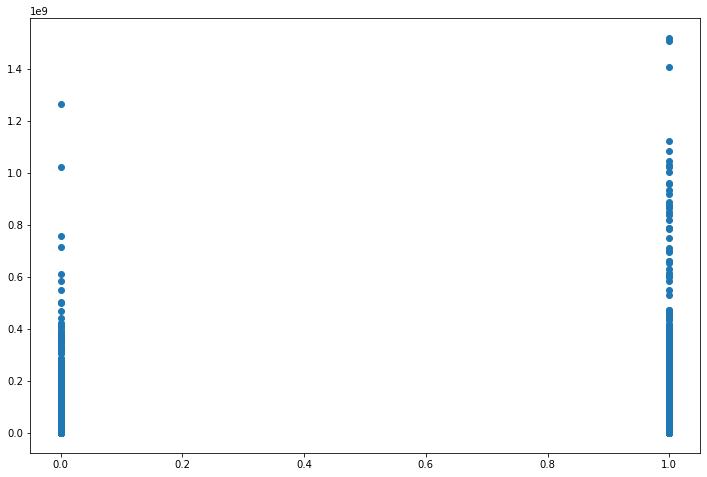

In [7]:
x_train['has_collection'] = x_train['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
sum(x_train['has_collection'])

plt.figure(figsize=(12,8))
plt.scatter(x_train['has_collection'], y_train['revenue'])
plt.show()

In [8]:
dataset['has_collection'] = dataset['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
dataset = dataset.drop(['belongs_to_collection'], axis=1)

BUDGET

In [9]:
for i, e in enumerate(x_train['budget']):
    if e <=1e5:
        print(i, e)

3 0
12 0
18 0
20 0
32 0
38 0
51 24554
52 0
55 0
59 0
61 0
71 0
74 0
76 0
80 0
83 0
85 0
86 0
87 0
88 0
89 0
90 0
94 0
95 0
100 0
102 0
109 0
110 0
113 0
115 0
117 0
120 0
122 0
126 0
127 0
128 0
133 0
138 0
141 0
145 0
150 0
151 0
153 0
154 0
157 0
159 0
160 0
162 0
163 0
164 0
166 0
167 0
169 0
170 0
173 0
178 0
179 12
180 0
184 0
185 0
190 0
192 0
198 0
201 0
202 0
209 0
218 0
219 0
220 0
221 0
229 0
232 0
233 0
234 0
241 0
243 0
254 0
257 0
261 0
265 0
267 0
271 60000
276 0
277 0
283 0
286 0
292 0
297 0
298 0
305 0
308 0
309 0
312 0
317 0
318 0
319 0
322 0
328 0
329 0
331 0
332 0
340 0
343 0
344 0
348 0
353 0
356 0
362 0
369 0
378 0
381 0
382 0
383 0
384 0
386 0
389 0
392 0
398 0
402 0
404 0
408 0
410 0
412 0
414 0
416 0
417 0
419 0
420 0
428 0
429 0
434 0
435 0
437 4
440 0
450 0
456 0
457 0
458 0
465 0
466 0
467 0
468 0
471 0
473 0
475 0
476 0
480 0
481 0
487 0
490 0
493 0
494 0
497 0
498 0
499 0
500 0
502 0
505 0
508 0
509 0
511 0
513 25000
515 0
517 0
523 0
524 0
525 0
533 0
534 

In [10]:
x_train['isBudgetDirty'] = x_train['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =x_train[x_train['budget'] >= 1e5]['budget'].mean()
mean_budget

30854833.02696366

In [11]:
x_train.loc[x_train.budget < 1e5, 'budget'] = mean_budget

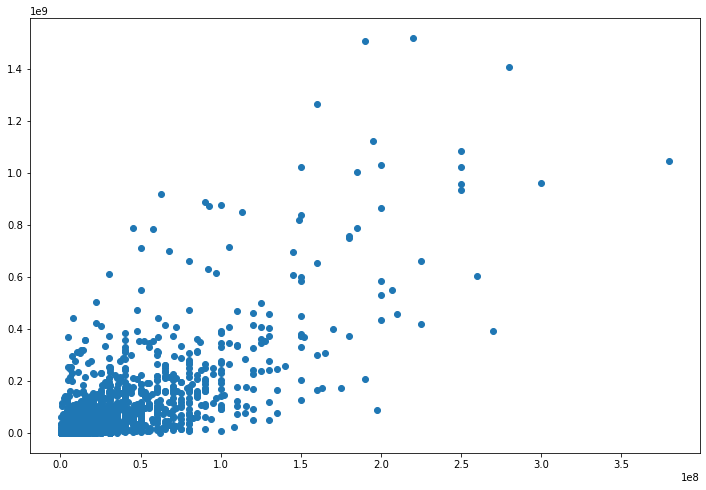

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['budget'], y_train['revenue'])
plt.show()

In [13]:
dataset['isBudgetDirty'] = dataset['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =dataset[dataset['budget'] >= 1e5]['budget'].mean()
mean_budget
dataset.loc[dataset.budget < 1e5, 'budget'] = mean_budget

GENRES

In [14]:
for i, e in enumerate(x_train['genres'][:5]):
    for gen in e:
        print(gen['name'])

Comedy
Romance
Horror
Comedy
Music
Fantasy
Thriller
Action
Crime
Drama
Romance
Thriller
Comedy


In [15]:
x_train['list_of_genres'] = x_train['genres'].apply(lambda x: [gen['name'] for gen in x])
x_train['genre_count'] = x_train['list_of_genres'].apply(lambda x: len(x))
x_train = x_train.drop(['genres'], axis=1)
x_train = x_train.drop(['list_of_genres'], axis=1)
x_train.head()

,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,status,tagline,title,Keywords,cast,crew,logRevenue,has_collection,isBudgetDirty,genre_count
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,NaN,tt0094898,en,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,Released,The Four Funniest Men in America are Eddie Mur...,Coming to America,"[{'id': 3015, 'name': 'fast food restaurant'},...","[{'cast_id': 1, 'character': 'Prince Akeem / C...","[{'credit_id': '52fe450fc3a36847f80ba1d3', 'de...",19.481080,0,0,2
701,[],2.500000e+07,NaN,tt0091419,en,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'name': 'The Geffen Company', 'id': 2956}, {...",...,Released,Don't feed the plants.,Little Shop of Horrors,"[{'id': 2382, 'name': 'flower'}, {'id': 2642, ...","[{'cast_id': 8, 'character': 'Seymour Krelborn...","[{'credit_id': '52fe43b59251416c7501b029', 'de...",17.472600,0,0,3
227,[],5.000000e+07,http://www.driveangry3d.com/,tt1502404,en,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'name': 'Summit Entertainment', 'id': 491}, ...",...,Released,One hell of a ride.,Drive Angry,"[{'id': 4479, 'name': 'bone'}, {'id': 41019, '...","[{'cast_id': 4, 'character': 'Milton', 'credit...","[{'credit_id': '54e07d43c3a368454d0053e5', 'de...",17.180438,0,0,4
1698,[],3.085483e+07,NaN,tt0105391,en,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,Released,He needed to trust her with his secret. She ha...,Shining Through,"[{'id': 74, 'name': 'germany'}, {'id': 818, 'n...","[{'cast_id': 2, 'character': 'Ed Leland', 'cre...","[{'credit_id': '58fd30ef925141643c02713f', 'de...",16.889176,0,1,3
1011,[],3.500000e+07,NaN,tt3152624,en,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,Released,We All Know One.,Trainwreck,"[{'id': 567, 'name': 'alcohol'}, {'id': 2864, ...","[{'cast_id': 4, 'character': 'Amy Townsend', '...","[{'credit_id': '55aa7f0c92514172ef003b26', 'de...",18.762821,0,0,1


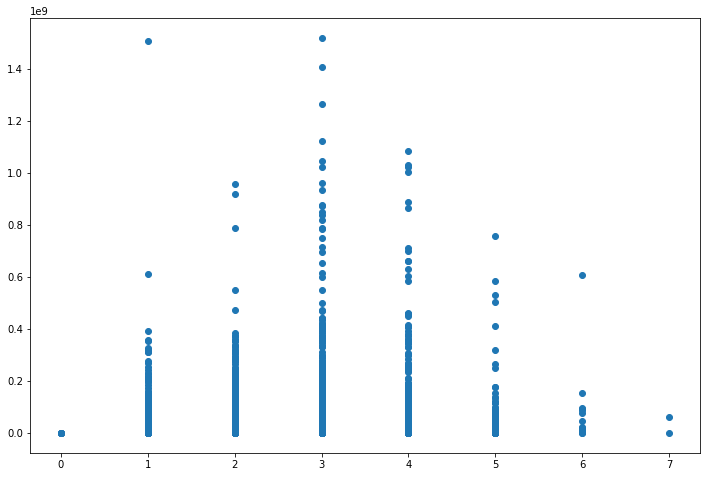

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['genre_count'], y_train['revenue'])
plt.show()

In [17]:
dataset['list_of_genres'] = dataset['genres'].apply(lambda x: [gen['name'] for gen in x])
dataset['genre_count'] = dataset['list_of_genres'].apply(lambda x: len(x))
dataset = dataset.drop(['genres'], axis=1)
dataset = dataset.drop(['list_of_genres'], axis=1)

In [18]:
#x_train.head()
#list_of_genres = []
#for l in x_train['list_of_genres']:
#    for gen in l:
#        list_of_genres.append(gen)

#list_of_genres
#len(list_of_genres)
#unique_genres = set(list_of_genres)
#unique_genres
#len(unique_genres)
#Counter(list_of_genres).most_common(12)

HOMEPAGE

In [19]:
x_train['hasHomepage'] = x_train['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
x_train = x_train.drop(['homepage'], axis=1)

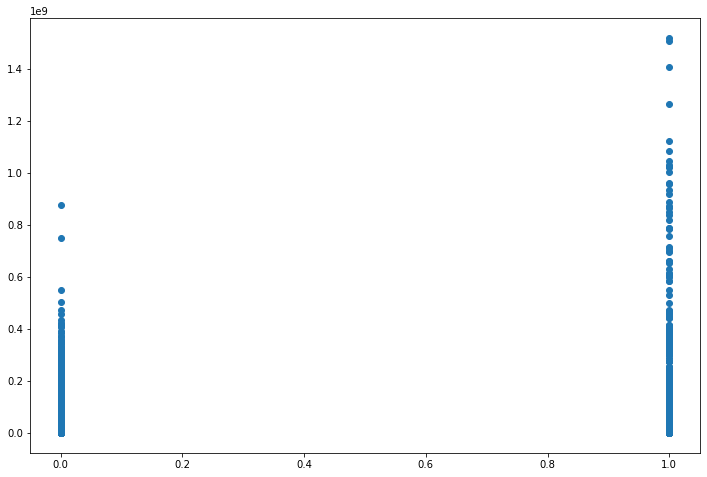

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['hasHomepage'], y_train['revenue'])
plt.show()

In [21]:
dataset['hasHomepage'] = dataset['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
dataset = dataset.drop(['homepage'], axis=1)

IMDB ID

In [22]:
dataset = dataset.drop(['imdb_id'], axis=1)

ORIGINAL LANGUAGE

In [23]:
list_of_languages = []
for lan in x_train['original_language']:
    list_of_languages.append(lan)
print(Counter(list_of_languages))
unique_languages = set(list_of_languages)
len(unique_languages)

Counter({'en': 2051, 'fr': 60, 'ru': 43, 'hi': 35, 'es': 33, 'ja': 29, 'it': 19, 'ko': 18, 'de': 17, 'cn': 16, 'zh': 16, 'ta': 15, 'sv': 6, 'nl': 5, 'pt': 5, 'ro': 4, 'da': 4, 'fa': 3, 'no': 2, 'te': 2, 'pl': 2, 'ml': 2, 'fi': 2, 'id': 1, 'hu': 1, 'el': 1, 'ur': 1, 'sr': 1, 'nb': 1, 'ar': 1, 'he': 1, 'bn': 1, 'mr': 1, 'vi': 1})


34

In [24]:
x_train['is_english'] = x_train['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
x_train = x_train.drop(['original_language'], axis=1)

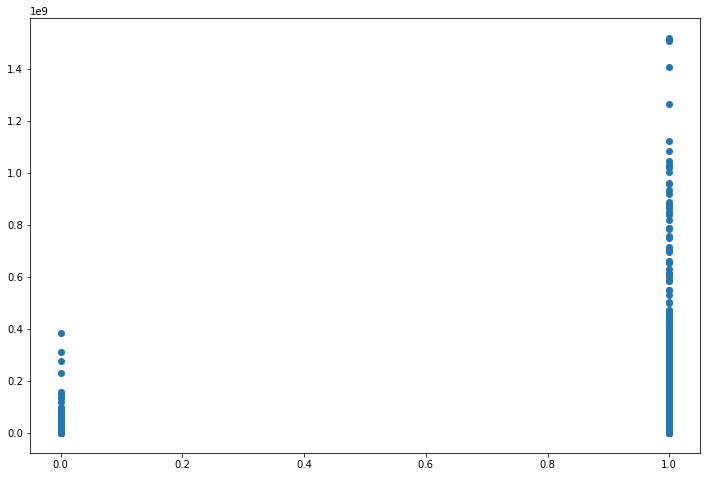

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['is_english'], y_train['revenue'])
plt.show()

In [26]:
dataset['is_english'] = dataset['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
dataset = dataset.drop(['original_language'], axis=1)

ORIGINAL TITLE

In [27]:
dataset = dataset.drop(['original_title'], axis=1)

OVERVIEW

In [28]:
dataset = dataset.drop(['overview'], axis=1)

POPULARITY

In [29]:
x_train['logPop'] = x_train['popularity'].apply(lambda x: np.log(x)) #prova

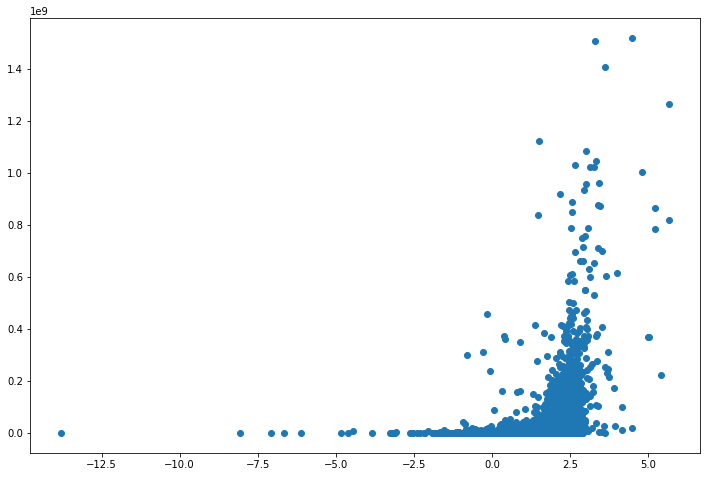

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['logPop'], y_train['revenue'])
plt.show()

In [31]:
x_train = x_train.drop(['logPop'], axis=1)

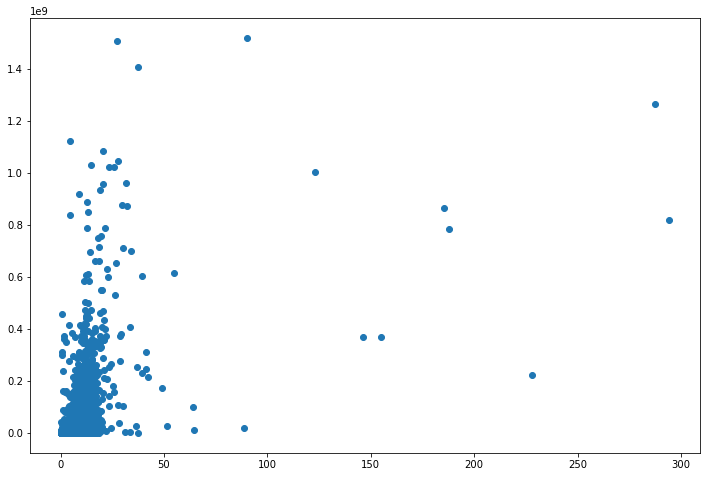

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['popularity'], y_train['revenue'])
plt.show()

POSTER PATH

In [33]:
dataset= dataset.drop(['poster_path'], axis=1)

PRODUCTION COMPANIES

In [34]:
for i, e in enumerate(x_train['production_companies']):
    for comp in e:
        print(comp['name'])

Paramount Pictures
Eddie Murphy Productions
The Geffen Company
Warner Bros.
Summit Entertainment
Saturn Films
Nu Image Films
Millennium Films
Michael De Luca Productions
Twentieth Century Fox Film Corporation
Sandollar Productions
Peter V. Miller Investment Corp.
Universal Pictures
Fuji Television Network
Dentsu
Apatow Productions
Geetha Arts
Bazmark Films
Ingenious Film Partners
Twentieth Century Fox Film Corporation
Dune Entertainment III
ScreenWest
Telefe
A Contracorriente Films
Pampa Films
Directv
Miramax Films
Miramax Films
Lions Gate Films
Ventanarosa Productions
Handprint Entertainment
Wonderland Sound and Vision
CBS Films
Vast Entertainment
Touchstone Pictures
Silver Screen Partners IV
Universal International Pictures (UI)
Paramount Pictures
Alfran Productions
De Laurentiis Entertainment Group (DEG)
Famous Films (II)
International Film Corporation
United Artists
Independent Film Distributors
Romulus Films
Universal Pictures
Hollywood Pictures
DreamWorks SKG
Jinks/Cohen Company


Village Roadshow Pictures
NPV Entertainment
Dark Castle Entertainment
Warner Bros.
Ghost Ship Films Pty. Ltd.
Regency Enterprises
Alcor Films
Canal+
New Regency Pictures
Hera Productions
Metro-Goldwyn-Mayer (MGM)
Paramount Pictures
DreamWorks SKG
Laurence Mark Productions
The Universal Film Mfg. Co.
New Line Cinema
Irwin Allen Productions
Prelude Pictures
Saltire Entertainment
TriStar Pictures
Grindstone Entertainment Group
Cheetah Vision
K5 International
Paradox Entertainment
Emmett/Furla Films
Picture Perfect Corporation
Court Five
Envision Entertainment
Valentina Films
New Line Cinema
Groundswell Productions
Axon Films
Perdido Productions
Harbor Picture Company
Mercury
Home Box Office (HBO)
Cinema Plus
Outlaw Productions (I)
Douglas
New Line Cinema
Metro-Goldwyn-Mayer (MGM)
Red Granite Pictures
TinRes Entertainment
Cinedigm
Scott Free Productions
1984 Private Defense Contractors
LD Entertainment
Open Road Films
Inferno Distribution
Chambara Pictures
New Line Cinema
Flower Films
Metr

G.P.F.I.
Parafrance Films
Walt Disney
Walden Media
Stillking Films
Ozumi Films
Propeler
Silverbell Films
Revolution Sun Studios
Imagine Entertainment
Columbia Pictures Corporation
JC 23 Entertainment
Bigelow Productions
Touchstone Pictures
Вольга
Weed Road Pictures
Warner Bros.
Dimension Films
Red Hour Films
AR-TL
Shree Ashtavinayak Cinevision Ltd
Walt Disney Pictures
Marvel Studios
Blue Sky Studios
Twentieth Century Fox Animation
Impact Pictures
Davis-Films
Constantin Film Produktion
TriStar Pictures
Palisades California Inc.
Magnolia Pictures
Jigsaw Productions
CNN Films
Columbia Pictures
Innovisions
Orion Pictures
TV Tokyo
Oriental Light and Magic
GameFreak
East Japan Marketing & Communications Inc.
Shogakukan
Pikachu Project
The Pokémon Company
Shogakukan-Shueisha Productions
Production I.G.
Oriental Light and Magic Team Koitabashi
France 3 Cinéma
The Kennedy/Marshall Company
Pathé Renn Productions
Banques Populaire Image 7
Canal+
CinéCinéma
C.R.R.A.V. Nord Pas de Calais
Région Nor

Paramount Pictures
Mirage Enterprises
Icon Productions
Twentieth Century Fox Film Corporation
Plan B Entertainment
Revolution Films
Paramount Vantage
Walt Disney Pictures
Pixar Animation Studios
Columbia Pictures Corporation
Beacon Communications
Radiant Productions
Metro-Goldwyn-Mayer (MGM)
McElroy & McElroy
Universal Pictures
Mr. Mudd Production
Indian Paintbrush
Right of Way Films
Columbia Pictures
Revolution Studios
Hard Eight Pictures
Wonder works studios entertainment group
Topcraft
Rankin/Bass Productions
Incorporated Television Company
Media 8 Entertainment
Empire Films
Alla Prima Productions
Brushwork Pictures
Universal Pictures
MFPV Film
Double Feature Films
ShadowCatcher Entertainment
Daniel Bobker Productions
Brick Dust Productions LLC
Village Roadshow Pictures
Warner Bros.
Riche-Ludwig Productions
Groucho III Film Partnership
Miramax Films
Appian Way
Forward Pass
Cappa Productions
Warner Bros.
Initial Entertainment Group (IEG)
IMF Internationale Medien und Film GmbH & Co. 

Sobini Films
Dune Films
Universal Pictures
StudioCanal
Working Title Films
Ringerike Erste Filmproduktion
Rick Lashbrook Films
Paramount Pictures
Kerner Entertainment Company
David Foster Productions
Cheyenne Enterprises
Metro-Goldwyn-Mayer (MGM)
David Ladd Films
Argosy Pictures
Metro-Goldwyn-Mayer (MGM)
Village Roadshow Pictures
Castle Rock Entertainment
NPV Entertainment
Mel's Cite du Cinema
Columbia Pictures
Vanguard Films
Scanbox
Universal Pictures
Fox Searchlight Pictures
Sound for Film
Working Title Films
Antidote Films (I)
Twentieth Century Fox Film Corporation
Dune Entertainment
Vinyl Films
LBI Entertainment
Bazelevs Production
Paramount Pictures
IAC Film
Jax Media
СТВ
Twentieth Century Fox Film Corporation
Crossbow Productions
Hollywood Pictures
Cinergi Pictures Entertainment
Lions Gate
Lions Gate Entertainments
Amigos Creations
United Artists
Joseph E. Levine Productions
Paramount Pictures
Alfred J. Hitchcock Productions
Antares Produzione Cinematografica
Metro-Goldwyn-Mayer 

In [35]:
x_train['list_of_companies'] = x_train['production_companies'].apply(lambda x: [comp['name'] for comp in x])

In [36]:
list_of_companies = []
for l in x_train['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)

print(len(list_of_companies))
unique_companies = set(list_of_companies)
print(len(unique_companies))
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

6506
3183


In [37]:
top_20_comp

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Touchstone Pictures',
 'Columbia Pictures Corporation',
 'Walt Disney Pictures',
 'TriStar Pictures',
 'Canal+',
 'Relativity Media',
 'United Artists',
 'Village Roadshow Pictures',
 'Miramax Films',
 'Regency Enterprises',
 'Dune Entertainment',
 'Fox Searchlight Pictures',
 'Lionsgate']

In [38]:
x_train['companies_count'] = x_train['list_of_companies'].apply(lambda x: len(x))

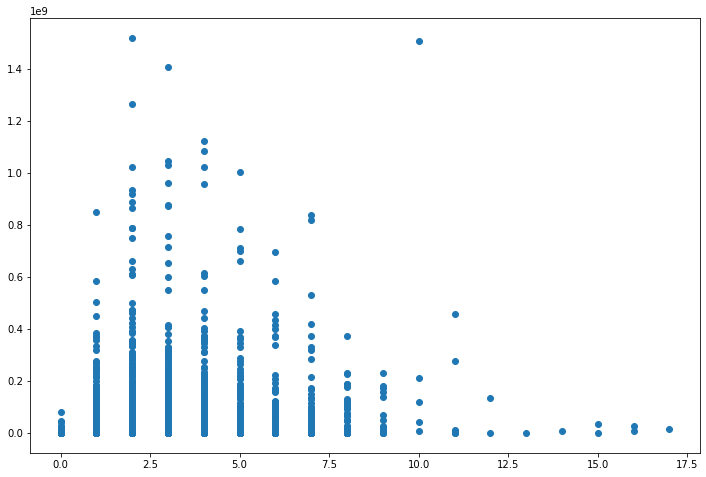

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['companies_count'], y_train['revenue'])
plt.show()

In [40]:
checked_companies = []
for i, l in enumerate(x_train['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            x_train[colName] = pd.Series([1 if comp in x else 0 for x in x_train['list_of_companies']], index =x_train.index)


In [41]:
print(sum(x_train['isColumbia Pictures Corporation']))
top_20_comp_pair

47


[('Warner Bros.', 164),
 ('Universal Pictures', 149),
 ('Paramount Pictures', 126),
 ('Twentieth Century Fox Film Corporation', 96),
 ('Columbia Pictures', 80),
 ('Metro-Goldwyn-Mayer (MGM)', 68),
 ('New Line Cinema', 60),
 ('Touchstone Pictures', 51),
 ('Columbia Pictures Corporation', 47),
 ('Walt Disney Pictures', 43),
 ('TriStar Pictures', 43),
 ('Canal+', 38),
 ('Relativity Media', 38),
 ('United Artists', 37),
 ('Village Roadshow Pictures', 33),
 ('Miramax Films', 29),
 ('Regency Enterprises', 28),
 ('Dune Entertainment', 26),
 ('Fox Searchlight Pictures', 25),
 ('Lionsgate', 24)]

In [42]:
x_train = x_train.drop(['production_companies'], axis=1)
x_train = x_train.drop(['list_of_companies'], axis=1)
x_train = x_train.drop(['companies_count'], axis=1)

isWarner Bros.


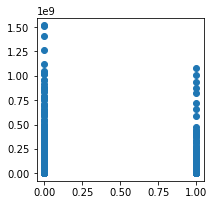

isUniversal Pictures


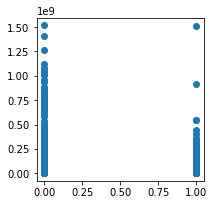

isParamount Pictures


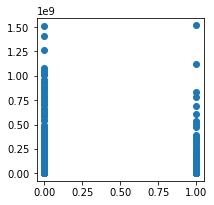

isTwentieth Century Fox Film Corporation


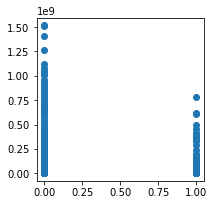

isColumbia Pictures


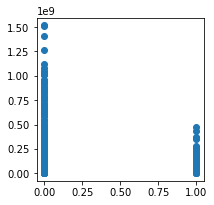

isMetro-Goldwyn-Mayer (MGM)


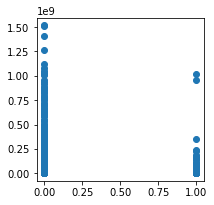

isNew Line Cinema


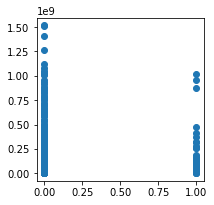

isTouchstone Pictures


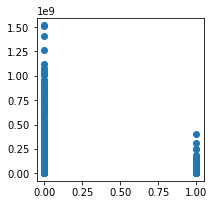

isColumbia Pictures Corporation


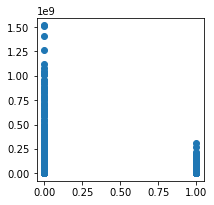

isWalt Disney Pictures


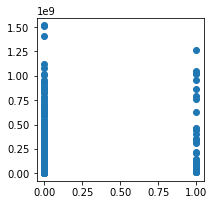

isTriStar Pictures


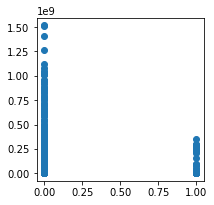

isCanal+


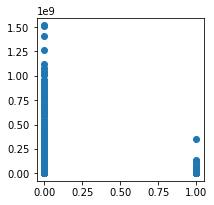

isRelativity Media


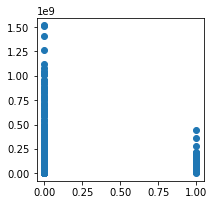

isUnited Artists


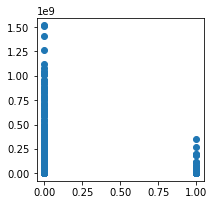

isVillage Roadshow Pictures


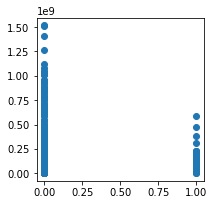

isMiramax Films


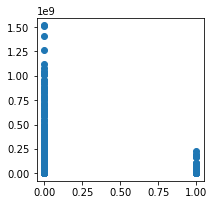

isRegency Enterprises


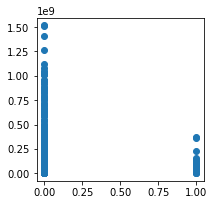

isDune Entertainment


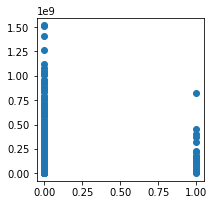

isFox Searchlight Pictures


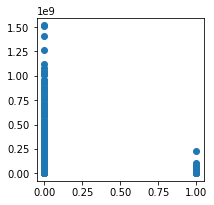

isLionsgate


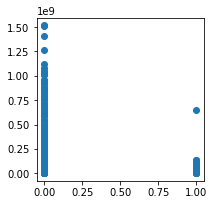

In [43]:
for comp in top_20_comp:
    col = 'is' + comp
    print(col)
    plt.figure(figsize=(3,3))
    plt.scatter(x_train[col], y_train['revenue'])
    plt.show()

In [44]:
dataset['list_of_companies'] = dataset['production_companies'].apply(lambda x: [comp['name'] for comp in x])
list_of_companies = []
for l in dataset['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)
unique_companies = set(list_of_companies)
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

dataset['companies_count'] = dataset['list_of_companies'].apply(lambda x: len(x))
checked_companies = []
for i, l in enumerate(dataset['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            dataset[colName] = pd.Series([1 if comp in x else 0 for x in dataset['list_of_companies']], index =dataset.index)
dataset = dataset.drop(['production_companies'], axis=1)
dataset = dataset.drop(['list_of_companies'], axis=1)
dataset = dataset.drop(['companies_count'], axis=1)
dataset.head()

,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,...,isColumbia Pictures Corporation,isTriStar Pictures,isColumbia Pictures,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",...,0,0,0,0,0,0,0,0,0,0
2,4.000000e+07,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",...,0,0,0,0,0,0,0,0,0,0
3,3.300000e+06,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",...,0,0,0,0,0,0,0,0,0,0
4,1.200000e+06,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",...,0,0,0,0,0,0,0,0,0,0
5,3.142419e+07,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],...,0,0,0,0,0,0,0,0,0,0


PRODUCTION COUNTRIES

In [45]:
print(x_train[['production_countries', 'is_english']])
dataset = dataset.drop(['production_countries'], axis=1)

                                   production_countries  is_english
id                                                                 
643   [{'iso_3166_1': 'US', 'name': 'United States o...           1
701   [{'iso_3166_1': 'US', 'name': 'United States o...           1
227   [{'iso_3166_1': 'US', 'name': 'United States o...           1
1698  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...           1
1011  [{'iso_3166_1': 'US', 'name': 'United States o...           1
...                                                 ...         ...
1639            [{'iso_3166_1': 'JP', 'name': 'Japan'}]           0
1096  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...           1
1131  [{'iso_3166_1': 'US', 'name': 'United States o...           1
1295  [{'iso_3166_1': 'US', 'name': 'United States o...           1
861   [{'iso_3166_1': 'US', 'name': 'United States o...           1

[2400 rows x 2 columns]


RELEASE DATE

In [46]:
date = '01/02/93'
dmy = date.split('/')
integer_map = map(int, dmy)
dmy_int = list(integer_map)
dmy_int

[1, 2, 93]

In [47]:
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 21:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

x_train['release_date'] = x_train['release_date'].apply(lambda x: fix_date(x))

In [48]:
x_train['release_date'] = x_train['release_date'].apply(lambda x: x.split('/'))

In [49]:
x_train['release_day'] = pd.Series([x[1] for x in x_train['release_date']], index =x_train.index)
x_train['release_day'] = x_train['release_day'].astype(int)
x_train['release_month'] = pd.Series([x[0] for x in x_train['release_date']], index =x_train.index)
x_train['release_month'] = x_train['release_month'].astype(int)
x_train['release_year'] = pd.Series([x[2] for x in x_train['release_date']], index =x_train.index)
x_train['release_year'] = x_train['release_year'].astype(int)
x_train.info()
x_train = x_train.drop(['release_date'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 643 to 861
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   belongs_to_collection                     2400 non-null   object 
 1   budget                                    2400 non-null   float64
 2   imdb_id                                   2400 non-null   object 
 3   original_title                            2400 non-null   object 
 4   overview                                  2392 non-null   object 
 5   popularity                                2400 non-null   float64
 6   poster_path                               2399 non-null   object 
 7   production_countries                      2400 non-null   object 
 8   release_date                              2400 non-null   object 
 9   runtime                                   2398 non-null   float64
 10  spoken_languages                   

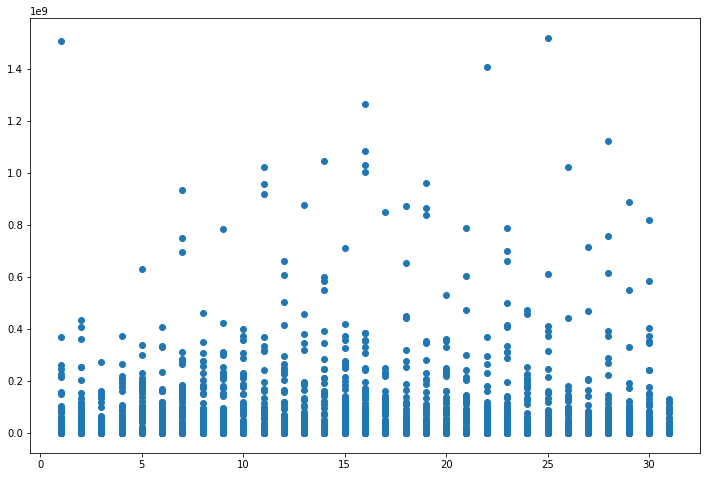

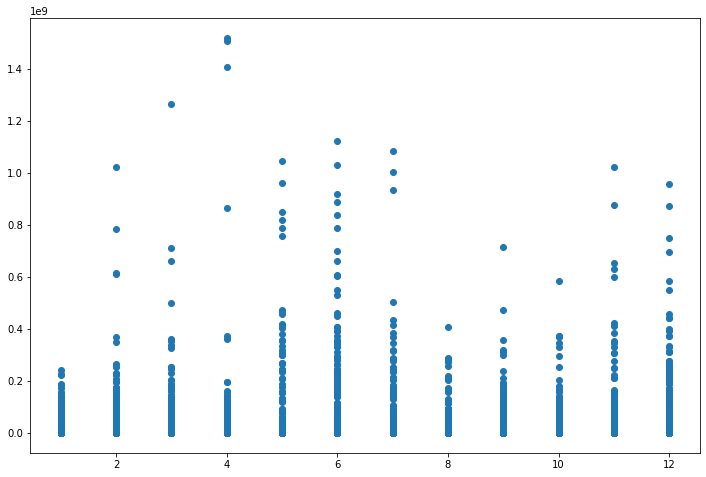

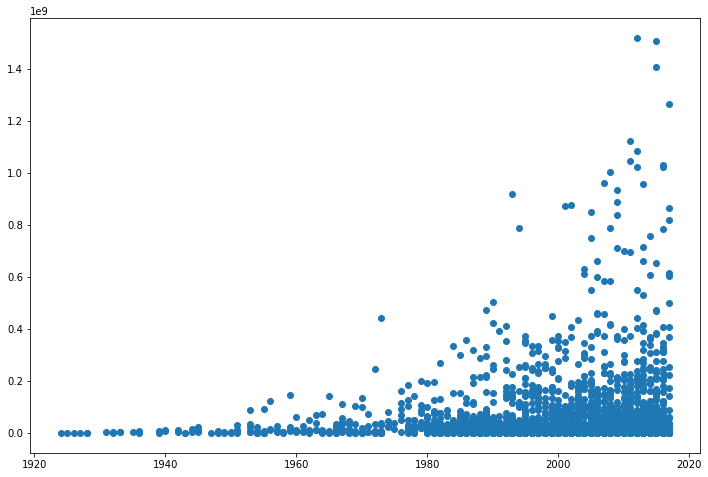

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_day'], y_train['revenue'])
plt.show()
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_month'], y_train['revenue'])
plt.show()
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_year'], y_train['revenue'])
plt.show()

In [51]:
dataset['release_date'] = dataset['release_date'].apply(lambda x: fix_date(x))
dataset['release_date'] = dataset['release_date'].apply(lambda x: x.split('/'))
dataset['release_day'] = pd.Series([x[1] for x in dataset['release_date']], index =dataset.index)
dataset['release_day'] = dataset['release_day'].astype(int)
dataset['release_month'] = pd.Series([x[0] for x in dataset['release_date']], index =dataset.index)
dataset['release_month'] = dataset['release_month'].astype(int)
dataset['release_year'] = pd.Series([x[2] for x in dataset['release_date']], index =dataset.index)
dataset['release_year'] = dataset['release_year'].astype(int)
dataset = dataset.drop(['release_date'], axis=1)

RUNTIME

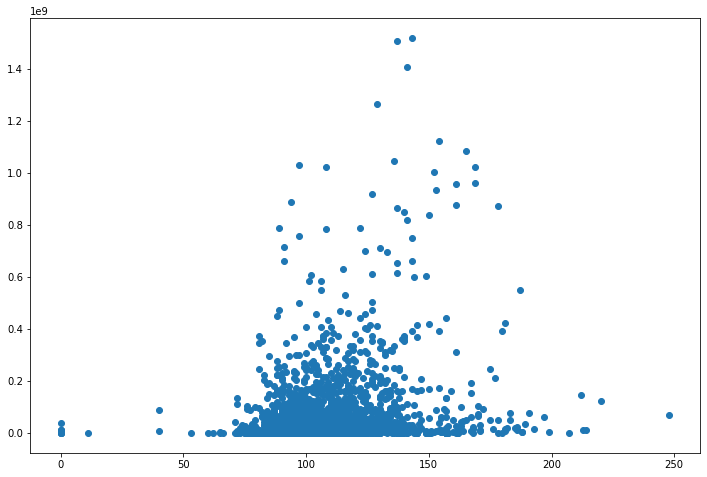

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['runtime'], y_train['revenue'])
plt.show()

In [53]:
x_train[pd.isna(x_train['runtime'])]

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isWalt Disney Pictures,isLionsgate,isCanal+,isTriStar Pictures,isColumbia Pictures Corporation,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
2303,[],3.085483e+07,tt0116485,Happy Weekend,NaN,0.002229,NaN,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",...,0,0,0,0,0,0,0,14,3,1996
1336,[],6.000000e+06,tt1107828,Королёв,NaN,0.292296,/2XcRiIvliLUUGqv5qOvpc76WeCU.jpg,[],NaN,[],...,0,0,0,0,0,0,0,29,10,2007


In [54]:
x_train.iloc[2302, x_train.columns.get_loc('runtime')] = 90
x_train.iloc[1335, x_train.columns.get_loc('runtime')] = 130

In [55]:
dataset[pd.isna(dataset['runtime'])]

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1336,6.000000e+06,0.292296,NaN,[],Released,NaN,Королёв,[],"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",...,0,0,0,0,0,0,0,29,10,2007
2303,3.142419e+07,0.002229,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,"[{'id': 572, 'name': 'sex'}, {'id': 596, 'name...","[{'cast_id': 0, 'character': 'Joachim Krippo',...",[],...,0,0,0,0,0,0,0,14,3,1996


In [56]:
dataset.iloc[2302, dataset.columns.get_loc('runtime')] = 90
dataset.iloc[1335, dataset.columns.get_loc('runtime')] = 130

SPOKEN LANGUAGES

In [57]:
dataset = dataset.drop(['spoken_languages'], axis=1)

<!-- STATUS #da qua -->

In [58]:
for i,e in enumerate(x_train['status']):
    if(e!='Released'):
        print (i,e)

1171 Rumored
1427 Rumored


In [59]:
x_train.iloc[1171]#vabbè

belongs_to_collection                       [{'id': 144200, 'name': 'Swan Princess Series'...
budget                                                                        30854833.026964
imdb_id                                                                             tt0120254
original_title                                 The Swan Princess: Escape from Castle Mountain
overview                                    The first wedding anniversary of Princess Odet...
popularity                                                                           5.121309
poster_path                                                  /oTEgvTpAIugS7OH6oIoVZkmV3C3.jpg
production_countries                                                                       []
runtime                                                                                  71.0
spoken_languages                            [{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...
status                                                      

In [60]:
dataset = dataset.drop(['status'], axis=1)

TAGLINE

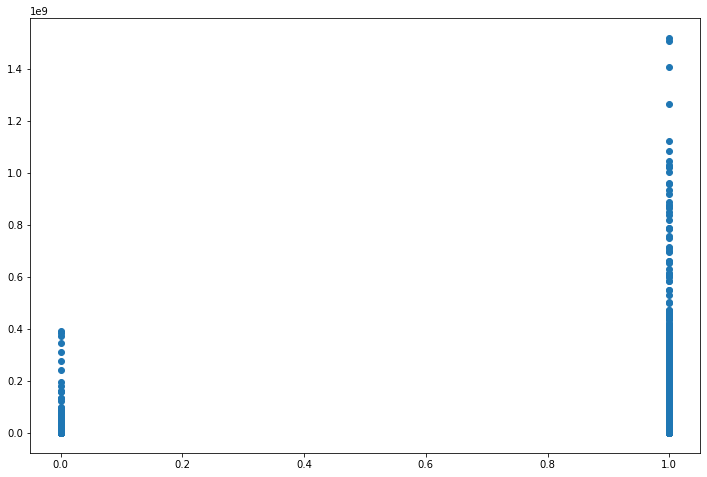

In [61]:
x_train['hasTagline'] = x_train['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)
plt.figure(figsize=(12,8))
plt.scatter(x_train['hasTagline'], y_train['revenue'])
plt.show()

In [62]:
dataset = dataset.drop(['tagline'], axis=1)

TITLE

In [63]:
dataset = dataset.drop(['title'], axis=1)

KEYWORDS

In [64]:
for i, e in enumerate(x_train['Keywords']):
    print (i)
    for comp in e:
        print(comp['name'])

0
fast food restaurant
prince
heir to the throne
fish out of water
new york city
fake identity
duringcreditsstinger
searching for love
1
flower
solar eclipse
florist
assistant
plant
success
aggression by plant
investigation
nerd
blonde
carnivorous plant
remake
crush
based on play or musical
motorcycle
eclipse
part animated
dentist
bum
killer plant
skid row
based on movie
plant food
flesh eating plant
inept assistant
cult classic
man eating plant
2
bone
car explosion
premarital sex
satanic cult
driver's license
finger gun
backhand slap
car jump
man punching a woman
magic trick
3
germany
based on novel
nazis
double agent
4
alcohol
one-night stand
5
tattoo
short-term memory
6
missionary
world war ii
ranch
australia
british
racist
cattle drive
aftercreditsstinger
stampede
waltzing matilda
trampled to death
7
isolation
cabin
snow
hunt
dark past
8
puberty
first time
9
painter
love of one's life
disabled
woman director
10
high school
teenager
popularity
high school student
teen comedy
duringc

coffee
autograph
cigarette
bartender
smalltalk
jukebox
gathering
conversation
interview
addicted
cousin
independent film
emergency doctor
191
competition
world war i
great depression
caddy
savannah
192
blackmail
music video
193
babysitter
194
transvestism
gay
hostage
love of one's life
northern ireland
homosexuality
gay interest
teenage crush
soldier
political unrest
195
drug cartel
dea
196
competition
greece
colosseum
olympic games
emperor
magic
horse
roman
wild boar
governance
galier
197
car journey
transportation
auto
human trafficking
198
prison
sex
handcuffs
waitress
fight
fireworks
nudity
volcano
navy
road trip
money
escape
convertible
scam
inmate
escort
military
embezzlement
nervous
199
sport
basketball
doctor
basketball team
basketball game
referee
basketball court
tweety bird
speedy gonzales
cartoon chicken
sylvester the cat
cartoon reality crossover
basketball hoop
cartoon skunk
200
witch
monster
heart attack
mummy
anthology
dark comedy
based on tv series
decapitation
darksid

college freshman
anarchic comedy
365
court case
gun rampage
firearm
jury
suspense
person running amok
lobbyist
366
time travel
high school reunion
367
sexual fantasy
alien planet
distant future
cult classic
female mercenary
368
psychology
police operation
police
psychologist
369
370
wormhole
space travel
supernatural powers
spaceship
alien
371
artificial intelligence
android
hologram
computer program
virtual reality
ex-cop
visual effect
police training
372
saving the world
venice
holy grail
library
riddle
father son relationship
whip
treasure
nazis
entrapment
crusader
treasure hunt
escape
panzer
order of the templars
archaeologist
indiana jones
archeology 
373
independent film
aftercreditsstinger
duringcreditsstinger
374
375
orphanage
overweight woman
376
ocean
drug abuse
exotic island
east india trading company
love of one's life
traitor
shipwreck
strong woman
ship
alliance
calypso
afterlife
fighter
pirate
swashbuckler
aftercreditsstinger
377
support group
dual identity
nihilism
rage 

guardian
wedding ceremony
ward
542
california
brother sister relationship
loss of parents
suspense
psychological thriller
orphan
car accident
543
544
woman director
545
journalist
based on novel
journalism
kidnapping
afghanistan
war
taliban
based on true story
rescue
drone
terrorism
soldier
foreign correspondent
embedded journalism
war journalist
546
hotel
small town
siege
independent film
corpse
tarantula
death
animal attack
spiders
547
stewardess
airplane
shootout
air marshal
christmas
turbulence
548
549
550
independent film
551
ocean
alcohol
sea
monster
mine
shipwreck
human experimentation
scuba diving
scuba
deepsea
trapped underwater 
552
missionary
river
boat
pastor
snake
fight
border
mercenary
thailand
burma
war
weapon
sequel
553
police brutality
ghetto
delinquency
police
east los angeles
gang
gang member
mexican american
barrio
colleague
554
teleportation
transformation
telekinesis
portal
marvel comic
superhero
based on comic
superhero team
fantastic four
body horror
invisible w

competition
governor
715
cruise
pilot
ghost ship
716
aids
roommate
homicide
car journey
friendship
friends
homosexuality
escape
road movie
717
jupiter
super computer
space travel
space mission
ghost ship
outer space
astronaut
monolith
718
music record
manager
black people
adultery
soul
show business
drug addiction
oscar award
musical
deceived wife
recording contract
background singer
motown
the supremes
record producer
single
singer
singing
detroit
alcoholic
extramarital affair
music band
719
revenge
science fiction
720
time travel
sabotage
deep space explorer
721
gay
sister sister relationship
wife husband relationship
1970s
becoming an adult
adoption
therapist
marriage crisis
722
gun
escape
serial killer
man hunt
hunting
723
small town
rancher
724
provence
magic
aunt
spiritualist
725
babysitter
mom on holiday
children home alone
726
coma
musician
teenage girl
car accident
teenager
out of body experience
teen drama
based on young adult novel
727
motel
crime boss
728
alcohol
isolation


tv station
media tycoon
navy
motorcycle
secret service
hamburg germany
884
horseback riding
training
biography
duringcreditsstinger
woman director
885
gang of smugglers
886
misfit
wedding reception
wedding
rebound
dumped by boyfriend
wedding guest
887
gunslinger
revenge
prairie
shootout
pistol
888
female nudity
sunrise
waitress
experiment
rain
sunlight
vampire
dystopia
beautiful woman
slow motion scene
undead
decapitation
scientist
epidemic
night creatures
889
father son relationship
daily life
married couple
support
father
marriage
faith
baustelle
rescue
animal
nature
duringcreditsstinger
noah's ark
890
gay
great britain
narration
glam rock
bisexual
music journalism
school uniform
 begins with text
imaginary band
baby left on doorstep
fictional band
down feather
19th century
1980s
891
circus
trapeze artist
892
factory
ambulance
invention
tramp
great depression
industrial revolution
slapstick
machine
pardon
guilty
893
woman director
894
london england
prostitute
ex-detainee
chauffeur
h

richard pryor
semiautomatic pistol
sleeping car
1064
washington d.c.
telepathy
dna
mercenary
transformation
quarantine
hybrid
on the run
serial killer
mind reading
cloning
los angeles
astronaut
killing spree
virus
alien dna
1065
romantic comedy
online dating
woman director
1066
love triangle
london england
upper class
adultery
tennis
river thames
love
wealth
lust
instructor
gold digger
social climbing
actress
1067
rape
verlies
heresy
religion and supernatural
napoleon
biography
unwillingly pregnant
muse
1068
individual
schizophrenia
massachusetts
love of one's life
intelligence
mathematician
market economy
economic theory
princeton university
nobel prize
mathematical theorem
m.i.t.
mathematics
delusion
1069
war
racism
battle
union soldier
confederate soldier
american civil war
1070
undercover
nanny
computer virus
stress
undercover agent
overweight woman
children
disguise
fbi agent
impersonation
1071
con man
fraud
gambling debts
noir
1072
individual
scotland
in love with enemy
legend
in

bank robbery
christmas
1254
1255
dc comics
carnival
psychopath
joker
superhero
based on comic
descent into madness
torture
cruelty
justice
dark
madness
super powers
batgirl
1256
england
brother sister relationship
new love
castle
studies
innocence
loss
oxford
nobility
1257
suspense
1258
china
nepal
pilot
afghanistan
aerial combat
alcoholic
socialite
biplane
declared dead
1259
1260
alternate dimension
new age
parallel world
pseudoscience
theology
consciousness
quantum mysticism
fantasy docudrama
woman director
1261
duringcreditsstinger
1262
hotel
wife husband relationship
hitman
infection
forest
cult
priest
murderer
brutality
bonfire
ceremony
ex soldier
ritual sacrifice
contract killer
video tape
folk horror
mumblegore
1263
1264
engagement
wedding
pretend relationship
1265
sex
adultery
group sex
bisexuality
1266
street gang
uncle
female assassin
witness to murder
1267
1268
circus
lion
eccentric
robot
1269
car race
future
young prostitute
chinese
alcoholic
tofu
1270
dystopia
1271
upper c

father's day
marital infidelity
married man
1452
amnesia
betrayal
black and white
twins
evil twin
film theory
identity swapping
1453
ski
1454
sicily
cinema
film director
kiss
coming of age
mother son relationship
haunted by the past
censorship
movie theatre
flashback
1455
schizophrenia
identity
amnesia
loss of sense of reality
suppressed past
trauma
key
bisexuality
hallucination
surreal
job interview
casting
suspense
independent film
lesbian
los angeles
1456
washington d.c.
bus
march
1457
indigenous
lover (female)
pyramid
mammoth
sapient
mountain village
stone age
fighter
primitive time
saber-toothed tiger
1458
diving
u.s. navy
1459
green
dodgeball
incredibile
timothy
1460
culture clash
settler
forbidden love
colony
musical
gold rush
princess
romance
native american
animation
virginia
star crossed lovers
reference to pizarro
jamestown virginia
pug dog
cross cultural relationship
musket
animate tree
indian chief
based on myths or folklore
17th century
shamanism
songs
indians vs. settler

police officer
organ donation
aftercreditsstinger
virility
1631
father son relationship
monster
supermarket
fight
artist
fog
bible
spider
survivor
faith
prayer
blood splatter
gore
giant monster
blood
anger
thunderstorm
1632
war
based on manga
1633
based on novel
sniper
investigation
police
quarry
1634
paris
bank
secret
fbi
vault
magic
new orleans
investigation
heist
conspiracy
money
escape
new york city
las vegas
explosion
1635
bounty hunter
wyoming
mountain
narration
hangman
stagecoach
blizzard
post civil war
1636
1637
depression
suicide attempt
belgium
unemployment
injustice
employer employee relationship
bonus
economic crisis
xanax
family affairs
1638
beaver
zombie
animal attack
1639
assassination
assassin
identity
sniper
mistake in person
jew
gangster boss
gambling debts
boss
murder
sniper rifle
fbi agent
horse racing
gambler
slevin
caso
hoodlum
black men
1640
revenge
murder
plot twist
dirty cop
1641
male nudity
female nudity
romanian new wave
1642
1643
cia
violence
safe house
rogu

martial arts
kung fu
underworld
yakuza
sword
bride
revenge
gore
female yakuza
blood
wedding
samurai sword
part animation
1826
new york
cheating
flirt
lover
older woman seduces younger guy
playboy
1827
taxi
street gang
usa president
war veteran
hostage
kidnapping
liberation of prisoners
anti hero
gangster boss
dystopia
police operation
attempt to escape
cyberpunk
reluctant hero
1828
philosophy
mentor
artist
painting
friendship
teen movie
teenager
sketching
rebellious youth
1829
tokyo japan
1830
gay
loss of mother
secret
coming out
loss of father
cancer
lgbt elderly
1831
high school
school
woman director
1832
based on manga
1833
murder
suspense
union
dock
longshoreman
pigeon
1834
brother sister relationship
class
foot race
1835
transylvania
hotel
witch
technology
magic
mummy
dracula
skeleton
only child
backpacker
marriage
frankenstein
wolfman
zombie
moving out
invisible man
new life
1836
arbitrary law
covered investigation
uniform
investigation
inspector
vigilante
bad cop
1837
artificial

2006
future
chase
post-apocalyptic
dystopia
australia
rescue
survival
on the run
convoy
peak oil
dark future
2007
kung fu
chinatown
magic
mystery
2008
based on novel
sequel
talking animal
ape
2009
fire
supermarket
architect
earthquake
parking garage
natural disaster
national guard
disaster
child in peril
pool hall
los angeles
explosion
motorcycle
alcoholic
policeman
daredevil
movie theater
disaster film
disaster movie
sensurround
2010
montana
sheriff
pile of dead bodies
money
mobster
2011
paris
france
world war ii
nazis
hijacking of train
artwork
train ride
painting
french resistance
train crash
nazi germany
art thief
art theft
2012
female friendship
high school
fish out of water
best friend
teenager
popularity
gossip
teen comedy
high school rivalry
new girl at school
2013
love triangle
baby
sequel
pregnancy
unknown father
pregnant woman
childbirth
sitting on a toilet
woman director
ultrasound
2014
supermarket
midlife crisis
truck
urban
lesbian
working class
cell phone
happiness
truck 

comedian
cancer
marijuana
older man younger woman relationship
drug
stand-up comedian
audition
aging actor
divorced man
divorced father
award
actor
estranged daughter
2195
criminal
2196
love triangle
afterlife
day of the dead
bullfighting
2197
coronation
duty
marriage
falling in love
2198
investigation
memory loss
2199
africa
based on novel
child soldier
2200
musical
cancer
2201
doctor
india
english
magistrate
1920s
mosque
2202
princess
japanese woman
based on fairy tale
japanese folklore
bamboo
anime
2203
2204
pornography
chicago
money laundering
gas station
limousine
laundromat
comedy team
illegal immigrant
las vegas
lust
desert
latino
hispanic
double act
cross dresser
arab
peyote
arab sheik
pornographer
french restaurant
slot machine
2205
stand-up comedy
live comedy
2206
2207
assassination
assassin
repayment
ira
jack ryan
2208
bruges belgium
town square
vietnamese
canadian stereotype
skinned alive
gruuthuse museum bruges
2209
california
assassin
infidelity
fetish
hitman
tycoon
court

friendship
high school
prom
music fan
2369
man vs machine
hope
post-apocalyptic
dystopia
friendship
war
steampunk
coward
end of world
rag doll
2370
new york
couple
loss of a child
2371
russia
space mission
space
outer space
dog
2372
london england
alcohol
sex
based on novel
drug addiction
drug dealer
nightclub
junkie
heroin
cold turkey
modern society
hallucination
friendship
surrealism
dark comedy
stealing
monologue
cult film
recovering drug addict
illegal drugs
drug deal
drug rehabilitation
drug culture
antihero
2373
dj
2374
holiday
skinhead
england
vandalism
independent film
gang
racism
summer
youth
violence
drug
unemployment
xenophobia
culture
2375
lake
summer camp
murder
serial killer
slasher
summer
jason voorhees
one by one
friday the thirteenth
2376
gunslinger
anti terror
ambush
mexico
showdown
guitar
nudity
hitman
bartender
revenge
tragic hero
shootout
mariachi
explosion
extreme violence
brutality
drug lord
leg brace
concealed weapon
flashback
bookstore
2377
amsterdam
based on n

In [65]:
x_train['list_of_keywords'] = x_train['Keywords'].apply(lambda x: [comp['name'] for comp in x])

In [66]:
list_of_keywords = []
for l in x_train['list_of_keywords']:
    for key in l:
        list_of_keywords.append(key)

print(len(list_of_keywords))
unique_keywords = set(list_of_keywords)
print(len(unique_keywords))
top_50_keys_pair = Counter(list_of_keywords).most_common(50)
top_50_keys = []
for p in top_50_keys_pair:
    top_50_keys.append(p[0])
Counter(list_of_keywords).most_common(50)

17326
6488


[('woman director', 132),
 ('independent film', 120),
 ('duringcreditsstinger', 105),
 ('murder', 95),
 ('based on novel', 83),
 ('sport', 71),
 ('violence', 68),
 ('revenge', 65),
 ('dystopia', 64),
 ('friendship', 62),
 ('aftercreditsstinger', 57),
 ('sex', 57),
 ('biography', 57),
 ('love', 51),
 ('suspense', 51),
 ('sequel', 49),
 ('police', 49),
 ('drug', 46),
 ('teenager', 43),
 ('nudity', 43),
 ('female nudity', 41),
 ('high school', 40),
 ('prison', 40),
 ('los angeles', 38),
 ('musical', 37),
 ('family', 35),
 ('kidnapping', 34),
 ('father son relationship', 34),
 ('new york', 33),
 ('detective', 32),
 ('3d', 32),
 ('investigation', 31),
 ('based on comic', 31),
 ('london england', 30),
 ('paris', 29),
 ('corruption', 29),
 ('remake', 28),
 ('robbery', 28),
 ('wedding', 28),
 ('world war ii', 27),
 ('based on true story', 27),
 ('wife husband relationship', 27),
 ('suicide', 27),
 ('escape', 27),
 ('prostitute', 27),
 ('gay', 27),
 ('dying and death', 26),
 ('superhero', 26),


In [67]:
x_train['isInTop50Keywords'] = pd.Series([1 if list(set(x) & set(top_50_keys)) != [] else 0 for x in x_train['list_of_keywords']], index =x_train.index)

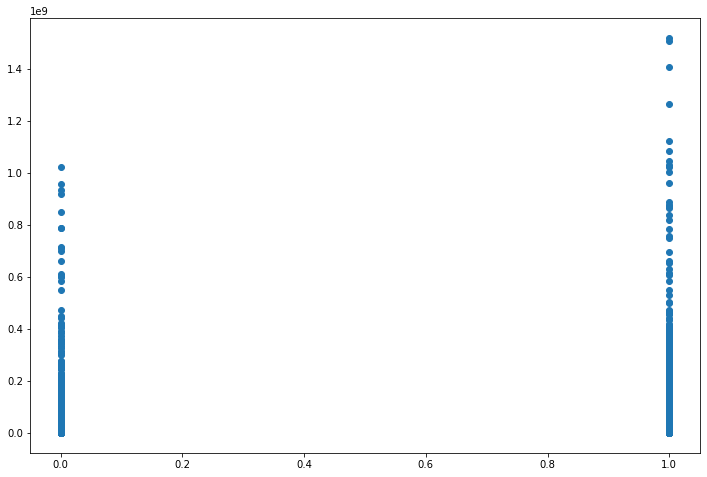

In [68]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['isInTop50Keywords'], y_train['revenue'])
plt.show()

In [69]:
x_train = x_train.drop(['isInTop50Keywords'], axis=1)

In [70]:
x_train['keywordsCount'] = x_train['list_of_keywords'].apply(lambda x: len(x))

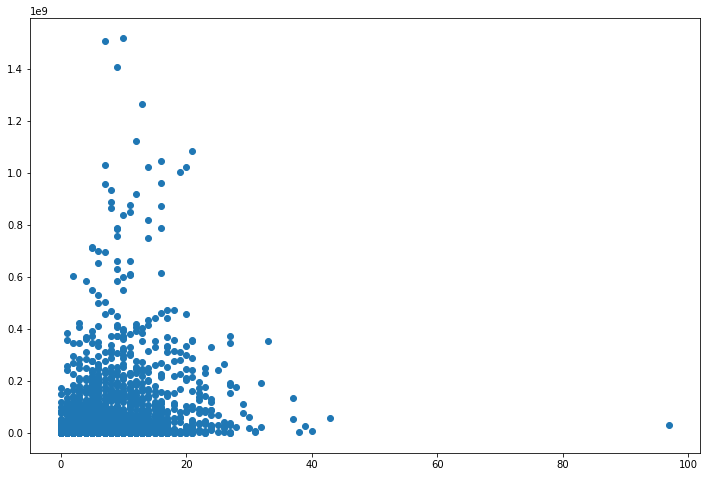

In [71]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['keywordsCount'], y_train['revenue'])
plt.show()

In [72]:
x_train = x_train.drop(['Keywords'], axis=1)
x_train = x_train.drop(['list_of_keywords'], axis=1)

In [73]:
dataset['list_of_keywords'] = dataset['Keywords'].apply(lambda x: [comp['name'] for comp in x])
dataset['keywordsCount'] = dataset['list_of_keywords'].apply(lambda x: len(x))
dataset = dataset.drop(['Keywords'], axis=1)
dataset = dataset.drop(['list_of_keywords'], axis=1)
#forse droppare keywordscount

CAST

In [74]:
for i, e in enumerate(x_train['cast']):
    for act in e:
        print(act['name'], act['gender'])

Eddie Murphy 2
Arsenio Hall 2
James Earl Jones 0
John Amos 2
Shari Headley 1
Frankie Faison 2
Louie Anderson 2
Calvin Lockhart 2
Samuel L. Jackson 2
Eriq La Salle 2
Ralph Bellamy 2
Ralph Bellamy 2
Don Ameche 2
Jim Abrahams 2
Rick Moranis 2
Ellen Greene 1
Vincent Gardenia 2
Steve Martin 2
Tisha Campbell-Martin 1
John Candy 2
Bill Murray 2
Tichina Arnold 1
Miriam Margolyes 1
Jim Belushi 2
Christopher Guest 2
Danny John-Jules 0
Mak Wilson 0
Barbara Rosenblat 0
Kevin Scott 0
Vincent Wong 2
Levi Stubbs 0
Nicolas Cage 2
Amber Heard 1
William Fichtner 2
Billy Burke 2
David Morse 2
Katy Mixon 1
Charlotte Ross 1
Christa Campbell 1
Todd Farmer 2
Jack McGee 2
Tom Atkins 2
Wanetah Walmsley 0
Edrick Browne 2
Robin McGee 0
Fabian C. Moreno 0
Marc Macaulay 2
Pruitt Taylor Vince 2
Julius Washington 0
Jamie Teer 0
Bryan Massey 0
Timothy Walter 0
Kent Jude Bernard 2
Brent Phillip Henry 0
Gerry May 0
Sherri Talley 0
Arianne Margot 0
Con Schell 2
Nick Gomez 2
Joe Chrest 2
Oakley Lehman 0
Thirl Haston 2
Ja

Shiri Appleby 1
Bob Clendenin 2
Rachel Winfree 1
Alison Lohman 1
Meghan Ivey 1
Ernie Lively 2
Toni Sawyer 1
Lee Weaver 2
Travis Tedford 2
Johnny Crawford 2
Jeff Blumenkrantz 2
Geoffrey Rivas 2
Brooks Almy 1
Darryl Henriques 2
Mary Ann Schmidt 1
Glendon Rich 2
Jet Li 2
Wong Chau-Yin  0
Yue Hoi 0
Yu Cheng-Hui 0
Ding Laam 0
Ji Chun-Hua 0
Woo Gin-Keung 0
Richard Armitage 2
Sarah Wayne Callies 1
Matt Walsh 2
Nathan Kress 2
Alycia Debnam-Carey 1
Jeremy Sumpter 2
Kyle Davis 2
Brandon Ruiter 0
Max Deacon 2
Arlen Escarpeta 2
Lee Whittaker 0
Jon Reep 0
Scott Lawrence 2
David Drumm 0
Jimmy Groce 0
Linda Gehringer 1
Keala Wayne Winterhalt 0
Maryanne Nagel 1
Frank Zieger 0
Kron Moore 0
London Elise Moore 1
Michael Ellison 0
Vincent McCurdy-Clark 0
Stephanie Koenig 1
Gary England 0
Don Lemon 0
Chuck Gaidica 0
Steve Garagiola 0
John W. Hardy 0
Mikayla Bouchard 1
Gino Borri 0
Amanda Ryskamp 1
Taras Los 0
Niki Cipriano 1
Kim Adams 1
Mike Ancrile 0
Apollo Bacala 0
Christine Bell 1
Chris Bellant 0
Chris 

Jessica Page 0
Alex Thomas 2
Eric Poppick 2
Downtown Julie Brown 1
Heavy D 2
Idalis DeLe√≥n 1
Howard Hewett 0
LL Cool J 2
Dennis Rodman 2
Jolane Lentz 0
Sam Sako 0
Barry Sobel 0
Leon Robinson 2
Edward Burns 2
Heather Graham 1
Rosario Dawson 1
Dennis Farina 2
Brittany Murphy 1
David Krumholtz 2
Stanley Tucci 2
Kathleen Doyle 1
Richard Keats 2
Mitchell Cox 2
Lisa Ann Russell 0
Marcus Aurelius 0
Adam Lawson 2
David Jean Thomas 2
Brian Richard Peck 0
Anna B. Choi 0
Kristin Norton 1
Jay Irwin 2
Robert Tossberg 2
Kathleen Randazzo 0
Kareem H. Captain 0
Merle Nicks 0
Natasha Roth 1
Richard Hench 0
Marklen Kennedy 2
Jude Law 2
Nicole Kidman 1
Ren√©e Zellweger 1
Eileen Atkins 1
Brendan Gleeson 2
Philip Seymour Hoffman 2
Natalie Portman 1
Emily Deschanel 1
Giovanni Ribisi 2
Donald Sutherland 2
Ray Winstone 2
Kathy Baker 1
Charlie Hunnam 2
Ethan Suplee 2
Jena Malone 1
Lucas Black 2
Taryn Manning 1
Tom Aldredge 2
James Rebhorn 2
Cillian Murphy 2
Jack White 0
William Boyer 0
Jamie Lee 0
Laurence Ol

Sharon Stone 1
Thomas F. Wilson 2
Robert Davi 2
Bill Duke 2
Jack Thibeau 2
Roger Aaron Brown 2
Stan Foster 2
Mary Ellen Trainor 0
Ed O'Ross 2
Bob Minor 2
David Glen Eisley 0
Dennis Hayden 2
Brian Libby 0
Matt Landers 2
Thomas Wagner 2
Al Leong 2
Robert Duvall 2
Donald Pleasence 2
Don Pedro Colley 2
Maggie McOmie 0
Ian Wolfe 2
Marshall Efron 2
Sid Haig 2
John Pearce 0
Irene Forrest 1
Gary Alan Marsh 0
John Seaton 0
Eugene I. Stillman 0
Jack Walsh 2
Mark Lawhead 0
Richard E. Grant 2
Samantha Mathis 1
Judi Dench 1
Eileen Atkins 1
Cherie Lunghi 1
Imogen Stubbs 1
David Swift 2
Kate Hardie 1
Laurent Gr√©vill 2
Ian McKellen 2
Niven Boyd 0
Lorraine Ashbourne 1
Deborah Findlay 1
Tracy Thorne 0
Tracy Thorne 0
John Grillo 2
Claire Toeman 0
Geff Francis 0
Richard Leaf 2
Andrew Read 0
George Clooney 2
Julia Roberts 1
Jack O'Connell 2
Caitriona Balfe 1
Dominic West 2
Lenny Venito 0
Giancarlo Esposito 2
Christopher Denham 0
Condola Rashad 0
Emily Meade 1
Chris Bauer 2
Dennis Boutsikaris 2
Olivia Lucc

Jennifer Edwards 1
Mar√≠a Conchita Alonso 1
Paul Sorvino 2
Rick Ducommun 0
Keye Luke 2
Billy Crudup 2
Donald Sutherland 2
Monica Potter 1
Jeremy Sisto 2
Matthew Lillard 2
Dean Norris 2
Billy Burke 2
Gabriel Olds 2
Judith Ivey 1
William Mapother 2
Amy Jo Johnson 1
Katharine Towne 0
Christopher Walken 2
Vincent Piazza 2
Freya Tingley 1
James Madio 2
Sean Whalen 2
Kathrine Narducci 1
Francesca Eastwood 1
Mike Doyle 2
Steve Schirripa 0
Barry Livingston 2
Alexis Krause 0
Jeremy Luke 0
Silvia Kal 0
John Lloyd Young 0
Erich Bergen 2
Michael Lomenda 0
Johnny Cannizzaro 0
Joseph Russo 0
Billy Gardell 2
John Griffin 2
Elizabeth Hunter 0
Lacey Hannan 0
Ren√©e Marino 0
Erica Piccininni 1
Steve Monroe 2
Rob Marnell 0
Troy Grant 0
Grant Roberts 0
Kara Pacitto 0
Michael Patrick McGill 2
Nancy La Scala 1
Clint Ward 0
Jackie Seiden 0
Matt Nolan 2
Meagan Holder 1
Joe Abraham 0
Phil Abrams 2
Joe Howard 2
Katelyn Pacitto 0
Ben Rauch 0
Bill Watterson 2
Annika Noelle 0
Derek Easley 0
Kim Gatewood 1
Alexandr

Louis Franck 0
Merab Ninidze 2
Viktoria Korotkova 0
Chulpan Khamatova 1
Viktor Bugakov 0
Karim Pakachakov 0
Konstantin Zeliger 0
Anastasiya Melnikova 0
Piotr GƒÖsowski 0
Blake Lively 1
Michiel Huisman 2
Harrison Ford 2
Ellen Burstyn 1
Kathy Baker 1
Amanda Crew 1
Lynda Boyd 1
Richard Harmon 2
Fulvio Cecere 2
Anjali Jay 1
Hiro Kanagawa 2
Peter J. Gray 2
Izabel Pearce 0
Cate Richardson 0
Jane Craven 0
Noel Johansen 0
Aaron Craven 2
Primo Allon 0
Darren Dolynski 2
Chris William Martin 0
Mark Ghanim√© 2
Shaker Paleja 0
Daniel Bacon 2
Barclay Hope 2
Robert Moloney 2
Lane Edwards 2
Hugh Ross 2
Toby Levins 2
Anthony Ingruber 2
Keith McCafferty 0
Serge Houde 2
Alison Wandzura 0
Demord Dann 0
Grace Chin 0
Dee Jay Jackson 0
Bruce Balden 0
Jacqueline Bassett 0
Symon Basterfield 0
Andrew Brackfield 0
Morgan Freeman 2
Greg Kinnear 2
Radha Mitchell 1
Billy Burke 2
Selma Blair 1
Alexa Davalos 1
Toby Hemingway 2
Stana Katic 1
Erika Marozs√°n 1
Jane Alexander 1
Fred Ward 2
Margo Martindale 1
Missi Pyle 

King Cotton 0
Don Cornelius 2
Bobcat Goldthwait 2
Lyle Alzado 2
Brian James 0
"Weird Al" Yankovic 0
Jello Biafra 2
Courtney Love 1
Walter Matthau 2
Mason Gamble 2
Joan Plowright 1
Christopher Lloyd 2
Lea Thompson 1
Robert Stanton 2
Paul Winfield 2
Stephen Rea 2
Jaye Davidson 2
Miranda Richardson 1
Forest Whitaker 2
Adrian Dunbar 2
Jim Broadbent 2
Ralph Brown 2
Tony Slattery 2
Birdy Sweeney 2
Breffni McKenna 0
Joe Savino 0
Josephine White 0
Shar Campbell 0
Bryan Coleman 2
Ray De-Haan 0
David Crionelly 0
Jack Carr 0
Andr√©e Bernard 1
Arnold Schwarzenegger 2
Sam Worthington 2
Mireille Enos 1
Joe Manganiello 2
Harold Perrineau 2
Josh Holloway 2
Terrence Howard 2
Olivia Williams 1
Max Martini 2
Kevin Vance 0
Mark Schlegel 0
Maurice Compte 2
Ned Yousef 2
Martin Donovan 2
Michael Monks 0
Nick Chacon 0
Tim Ware 2
Gary Grubbs 2
B.J. Winfrey 0
Kendrick Cross 0
Hakim Callender 0
Troy Garity 2
Morgan Alexandria 0
Jermaine Holt 0
Jaime FitzSimons 0
Everton Lawrence 2
Neko Parham 0
DeWayne Calhoun 0

Sergey Garmash 2
Aleksey Gorbunov 2
Ewan McGregor 2
Ren√©e Zellweger 1
Emily Watson 0
Barbara Flynn 1
Bill Paterson 2
Matyelok Gibbs 1
Lloyd Owen 2
Anton Lesser 2
David Bamber 2
Phyllida Law 1
Lucy Boynton 1
Oliver Jenkins 0
Justin McDonald 0
Judith Barker 0
Patricia Kerrigan 1
Lynn Farleigh 1
John Woodvine 2
Sarah Crowden 0
Christopher Middleton 0
Jane How 0
Barry McCormick 0
Dominic Kemp 0
Mike Burnside 0
Geoffrey Beevers 0
Clare Clifford 0
Joe Absolom 2
Lara Belmont 1
Melanie Gutteridge 1
Lukas Haas 2
James Hillier 2
Alec Newman 2
Mel Raido 2
Marsha Thomason 1
Tom Bell 2
Michael Feast 2
Cyril Nri 2
Tameka Empson 1
Peter Gevisser 2
Derek Lea 2
Joel Pitts 2
Pete Valente 0
Virginia Fanshawe 0
Anita Kelsey 0
Olivia Caffrey 0
Rodney Hart 0
Mark Barratt 0
Tony Lee 0
Nicolas Chagrin 2
Javier C√°rdenas 0
Carmen de Mairena 1
Manolo Reyes 'Poz√≠' 0
Joan Antoni Estad√©s 0
Nacho Sierra 0
Santiago Urrialde 2
Carlos Pumares 0
Saturnino Garc√≠a 0
Encarni Manfredi 0
Paco Porras 0
Juan Miguel Mart√≠

Vic Waghorn 0
Emma Lock 0
Nathan Stewart-Jarrett 2
Luca Franzoni 0
Kevin Kline 2
Paul Dano 2
Katie Holmes 1
John C. Reilly 2
Dan Hedaya 2
Lecy Goranson 1
Patti D'Arbanville 1
Celia Weston 1
John Pankow 2
Marisa Ryan 1
Marian Seldes 1
Lynn Cohen 1
Jason Butler Harner 2
Jackie Hoffman 1
Alex Burns 0
Justis Bolding 1
Bubba Smith 2
David Graf 2
Michael Winslow 2
Leslie Easterbrook 1
G. W. Bailey 2
Matt McCoy 2
Marion Ramsey 1
Lance Kinsey 0
Bruce Mahler 2
George Gaynes 2
Gerrit Graham 2
Samuel L. Jackson 2
Julianne Moore 1
Edie Falco 1
Aunjanue Ellis 1
William Forsythe 2
Anthony Mackie 2
Peter Friedman 2
Domenick Lombardozzi 2
Aasif Mandvi 2
Philip Bosco 2
Clarke Peters 0
LaTanya Richardson 1
Portia 0
Fly Williams III 0
Haneefah Wood 0
Donna Cutugno 0
Genevieve Hudson-Price 0
Joe Forbrich 2
Ron Eldard 2
Dorian Missick 2
Chance Kelly 2
Jack Huston 2
Toby Kebbell 2
Rodrigo Santoro 2
Nazanin Boniadi 1
Ayelet Zurer 1
Pilou Asb√¶k 2
Sofia Black-D'Elia 1
Morgan Freeman 2
Marwan Kenzari 0
Mois√©s

Mike McCarty 2
Richard Cetrone 2
Don Thai Theerathada 2
Thom Williams 2
Scott Wilder 0
Heidi Pascoe 1
Jennifer Caputo 1
Eddie Perez 2
Spencer Sano 0
Mike Gunther 0
John Koyama 0
Scott Michael Morgan 2
Sala Baker 2
Arron Shiver 2
Justin Tade 0
Mike Seal 0
Edward A. Duran 0
David Wald 0
Jermaine Washington 0
Clay Donahue Fontenot 0
Al Goto 0
Brad Martin 2
Tim Rigby 0
Luis Bordonada 0
Angelique Midthunder 0
Todd Schneider 0
Darrin Prescott 2
Laurence Chavez 2
Brian Neal Lucero 0
David Midthunder 2
Karin Silvestri 1
Patrick Stewart 2
Jonathan Frakes 2
Brent Spiner 2
LeVar Burton 2
Michael Dorn 2
Gates McFadden 1
Marina Sirtis 1
William Shatner 2
James Doohan 2
Walter Koenig 2
Malcolm McDowell 2
Alan Ruck 2
Whoopi Goldberg 1
Thomas Dekker 2
Cameron Oppenheimer 0
Jenette Goldstein 1
Tim Russ 2
Shun Oguri 2
Haruma Miura 0
Yu Aoi 1
Arata Furuta 2
Ayano Fukuda 0
Toshiyuki Morikawa 2
Maaya Sakamoto 1
Kiyoshi Kobayashi 0
Chikao Ohtsuka 2
Miyuki Sawashiro 1
Clint Eastwood 2
Michael Moriarty 2
Carr

Jesse van Driel 0
Dan van Husen 0
Ad van Kempen 2
Tygo Gernandt 2
Ben Ramakers 0
Tibo Vandenborre 0
Jens Roth 0
Peter Eberst 0
Stanislav Boklan 2
Jeff Burrell 0
Anton Sviatoslav Greene 0
Aleksandr Kobzar 2
Oleg Primogenov 0
–í–µ—Ä–æ–Ω—ñ–∫–∞ –®–æ—Å—Ç–∞–∫ 1
Michael J. Fox 2
Sally Field 1
Ralph Waite 2
Robert Hays 2
Kim Greist 1
Michael Bell 2
Tisha Campbell-Martin 1
Al Michaels 2
Tommy Lasorda 0
Bob Uecker 2
Tress MacNeille 1
Jon Polito 2
Adam Goldberg 2
Sinbad 2
Carla Gugino 1
Stephen Tobolowsky 2
Michael Rispoli 2
Will Sasso 2
Tom Wagner 2
Jet Li 2
DMX 2
Kelly Hu 1
Anthony Anderson 2
Tom Arnold 2
Mark Dacascos 2
Gabrielle Union 1
Johnny Tr√≠ Nguy·ªÖn 2
Sean Cory Cooper 2
Vincent Cassel 2
L√©a Seydoux 1
Andr√© Dussollier 2
Eduardo Noriega 2
Myriam Charleins 0
Audrey Lamy 1
Sara Giraudeau 1
Jonathan Demurger 0
Nicolas Gob 0
Louka Meliava 0
Yvonne Catterfeld 1
Dejan Bucin 0
Wolfgang Menardi 0
Mickey Hardt 2
Arthur Doppler 0
Elisabeth Bogdan 0
Marie Gruber 1
Gotthard Lange 2
Max Volkert Ma

Scott Mosier 2
Jason Lee 2
Jake Richardson 2
Ethan Suplee 2
Harley Quinn Smith 1
Kevin Weisman 2
Wanda Sykes 0
Zak Knutson 2
Kevin Michael Richardson 2
Rebecca Lin 1
Walt Flanagan 2
Earthquake 2
Grace Smith 0
Sophie Marceau 1
Sean Bean 2
Alfred Molina 2
Mia Kirshner 1
James Fox 2
Fiona Shaw 1
Danny Huston 2
Phyllida Law 1
David Schofield 0
Saskia Wickham 0
Jennifer Hall 1
Anna Calder-Marshall 0
Valerie Braddell 0
Petr Shelokhonov 0
Niall Buggy 2
Anthony Calf 0
Vernon Dobtcheff 2
Hamish Falconer 0
Stefan Gryff 0
Barbara Horne 0
Larissa Kouznetsova 0
Jeremy Sheffield 2
Justine Waddell 1
Mikhail Khmelyov 0
Yuliya Krasnova 0
Ludmila Kurepova 0
German Maksimov 0
Tatyana Zakharova 0
Sergei Shcherbin 0
Gelena Ivliyeva 0
Vadim Sadovnikov 0
Sergei Parshin 2
Valeriy Kukhareshin 0
Nora Gryakalova 0
Oleg Kosminsky 0
Victor Gurianov 0
Konstantin Lukashov 0
Aleksandra Lavrova 0
Igor Efimov 2
Eddie Murphy 2
Thandie Newton 1
Terry Crews 2
Clifton Powell 2
Lester Speight 2
Cuba Gooding Jr. 2
Katt Willi

Valerie Perrine 1
Ana Gasteyer 1
Loretta Devine 1
Andrea Baker 1
Joe Petcka 2
Brian Callaway 2
Coburn Goss 0
Perry Cavitt 2
Crystal McKinney 1
Jeanne Marie Rice 1
Kathrin Middleton 1
Kelly Cooper 1
Palmer Davis 1
Katie Miller 1
Dana Waters 1
Gregory Cupoli 0
Alexondra Lee 1
Aviva Gale 1
Shirley Prestia 1
T. J. Thyne 2
Audrey Wasilewski 1
Angela Oh 1
Robert Briscoe Evans 0
Chris Rolfes 1
Katie Kneeland 1
Jeanine O'Connell 1
Kelley Hazen 1
Brooke Elliott 1
Kristina Martin 1
Harmony Rousseau 1
Lisa Long 1
Heidi Helmer 1
Marla Martensen 1
Sally Meyers Kovler 1
Ashley Quirico 1
Regan Rohde 1
Liz Tannebaum 1
LeShay N. Tomlinson 1
Cristine Rose 1
Arden Myrin 1
Rachel Duncan 1
Alex McKenna 1
Regiane Gorski 1
Juliandra Gillen 1
Lisa Anne Hillman 1
Tracy Pacheco 1
Jamie Gutterman 1
Maggie Egan 1
Juanita Jennings 1
Hallie Meyers-Shyer 1
Kate Asner 1
Caryn Greenhut 1
Jennifer Greenhut 1
Marnie Mosiman 1
Nnenna Freelon 1
Gil Hacohen 0
Nancy Monsarat 1
Jacqueline Thomas 1
Rory Byrne 1
Victoria Garci

Robert Ridgely 2
'Sister' Carol East 0
Kristin Olsen 0
John Sayles 2
The Texas Kid 0
Su Tissue 0
John Waters 2
John Montgomery 0
Anna Levine 1
Anna Karina 1
Claude Brasseur 2
Sami Frey 2
Dani√®le Girard 0
Louisa Colpeyn 0
Chantal Darget 0
Georges Staquet 0
Ernest Menzer 2
Jean-Claude R√©moleux 0
George Clooney 2
Mark Wahlberg 2
Diane Lane 1
John C. Reilly 2
William Fichtner 2
Bob Gunton 2
Karen Allen 1
Allen Payne 2
Mary Elizabeth Mastrantonio 1
John Hawkes 2
Cherry Jones 1
Christopher McDonald 2
Michael Ironside 2
Rusty Schwimmer 1
Janet Wright 1
Dash Mihok 2
Josh Hopkins 2
Todd Kimsey 2
Chris Palermo 2
Wiley M. Pickett 2
Hayden Tank 2
Merle Kennedy 1
Jennifer Sommerfeld 1
Joseph D. Reitman 2
Sandy Ward 2
Melissa Samuels 1
Steven Barr 2
Billy Mayo 2
Philip Ettington 2
Fred Astaire 2
Ginger Rogers 1
Victor Moore 2
Helen Broderick 1
Eric Blore 0
Betty Furness 1
Georges Metaxa 0
Dennis O'Keefe 2
Landers Stevens 2
Arnold Schwarzenegger 2
Francesca Neri 1
Elias Koteas 2
Cliff Curtis 2
John

Zhang Shan 0
Guoyi Chen 0
Tie Nan 0
Yan Jie 0
Wang Ya-Chao 0
Ma Jingjing 0
Chao Hsu Lin 0
Hao Zhang 0
Limin Deng 0
Guoyin Jiang 0
Yulin Gao 0
Jiatong Lai 0
Jaihui Yan 0
Hangyu Tian 0
Nuo A. 0
Tuli Guer 0
Qingjian Wu 0
Peng Zhou 0
Yuanfeng Gao 0
Fucheng Zhang 0
Meihui Chen 0
Wenxue Sun 0
Junzhu Zhang 0
Hui Guo 0
Xiaoluo Mo 0
Gangqiang Yang 0
Guoqiang Wu 0
Chao Xu 0
Junjie Guan 0
Mingzhe Song 0
Tanwei Pang 0
Qiankun Ma 0
Teng Zhou 0
Yuzhan Gao 0
Chen Song 0
Fanjie Meng 0
Jianfeng Chen 0
You Zhang 0
Rongjian Yang 0
Guangchao Liu 0
Maoping Zhan 0
Yongyong Yang 0
Guangwen Bao 0
Xiao Xiao 0
Hanyi Zhang 0
Weiping Liang 0
Lili Wang 0
Xiaoqin Xu 0
Meg Tilly 1
Craig Sheffer 2
Eric Stoltz 2
Parker Posey 1
Adrienne Shelly 1
Quentin Tarantino 2
Lea Thompson 1
Jeffrey Jones 2
Tim Robbins 2
Ed Gale 2
Holly Robinson Peete 1
David Paymer 2
Paul Guilfoyle 2
Richard Edson 2
Dominique Davalos 1
Liz Sagal 1
Natasha Henstridge 1
Ice Cube 2
Jason Statham 2
Clea DuVall 1
Pam Grier 1
Joanna Cassidy 1
Richard C

G√©rard Darrieu 0
Micheline Bona 0
Charles Denner 2
F√©lix Marten 2
Hubert Deschamps 2
Jacques Hilling 2
Marcel Journet 2
Fran√ßois Joux 0
Jean-Claude Brialy 2
Gis√®le Grandpr√© 0
Jacqueline Staup 0
Marcel Cuvelier 0
Nicolas Bataille 0
Pierre Frag 0
Christian Brocard 0
Marcel Bernier 0
Guy Henry 0
Roger Jacquet 0
Alice Reichen 1
Chris O'Donnell 2
Gene Hackman 2
Faye Dunaway 1
Robert Prosky 2
Lela Rochon 1
Bo Jackson 2
Millie Perkins 1
David Marshall Grant 2
Raymond J. Barry 2
Nicholas Pryor 2
Richard Bradford 2
Harve Presnell 2
Josef Sommer 2
Jane Kaczmarek 1
Seth Isler 2
Greg Elam 0
Albert Finney 0
Susannah York 1
Hugh Griffith 2
Edith Evans 0
Joan Greenwood 1
Diane Cilento 1
George Devine 2
David Tomlinson 2
Freda Jackson 1
Jack MacGowran 2
Lynn Redgrave 1
Joyce Redman 1
David Warner 2
Miche√°l MacLiamm√≥ir 0
Rachel Kempson 1
Peter Bull 2
Avis Bunnage 1
Angela Baddeley 0
John Candy 2
Karen Austin 1
Kerri Green 0
Joey Lawrence 2
Aubrey Jene 0
Richard Crenna 2
Rip Torn 2
John Larroquet

Callie Thorne 1
John Elsen 2
Bill Cross 0
Tannis Benedict 1
Scott Gurney 2
Cooper Huckabee 2
Kevin O'Rourke 2
Scott Lawrence 2
Lara Bierner 1
Paxton Culpepper 2
Charles Gemmill 2
Paxton Culpepper 2
Billy Malone 0
L.A. Rothman 1
Silambarasan 2
Trisha Krishnan 1
VTV Ganesh 0
K. S. Ravikumar 2
Pradeep Kottayam 2
Janani Iyer 1
Babu Antony 2
Babu Antony 2
Uma Padmanabhan 0
Lakshmi Ramakrishnan 0
Samantha Akkineni 1
Naga Chaitanya Akkineni 0
Danny Nucci 2
Stephen Baldwin 2
George Newbern 2
Neill Barry 2
Robert Downey Jr. 2
Ivo Lopez 0
David Rasche 2
Josi K. Waksman 0
Erin Fisher 0
Cris Lankenau 2
Sarah Hellman 0
Joe Swanberg 0
Tucker Stone 0
Keegan DeWitt 0
Karrie Crouse 0
Liz Bender 0
Daryl Nuhn 0
Michael Tully 2
C. Mason Wells 0
Peter Weller 2
Richard Crenna 2
Amanda Pays 1
Ernie Hudson 2
Daniel Stern 2
H√©ctor Elizondo 2
Lisa Eilbacher 1
Michael Carmine 2
Meg Foster 1
Eugene Lipinski 2
Larry Dolgin 2
Pascal Druant 0
Steve Pelot 2
Sylvester Stallone 2
Julie Benz 1
Matthew Marsden 2
Reynald

Elian Planes 0
Mathilde Dromard 0
Camilo Acosta Mendoza 0
Folco Jullien 0
Maxime Flourac 0
Rabea Egg 0
Fr√©d√©ric B√©lier-Garcia 0
Pierre Brichese 2
Pierre Alloggia 2
Arthur Igual 0
J√©r√¥me Chappatte 2
Michelle Goddet 1
Anne Crestey 0
Noomi Rapace 1
Michael Fassbender 2
Guy Pearce 2
Idris Elba 2
Logan Marshall-Green 2
Charlize Theron 1
Lucy Hutchinson 1
Sean Harris 2
Rafe Spall 2
Kate Dickie 1
Emun Elliott 2
Benedict Wong 2
Patrick Wilson 2
Ian Whyte 2
Branwell Donaghey 2
Vladimir Furdik 2
C.C. Smiff 2
Shane Steyn 2
John Lebar 2
Anil Biltoo 2
Giannina Facio 1
James Embree 2
Robin Atkin Downes 2
Louisa Staples 0
Annie Penn 0
Daniel James 0
James Woods 2
Kathleen Turner 1
Kirsten Dunst 1
Josh Hartnett 2
Michael Par√© 2
Scott Glenn 2
Danny DeVito 2
A.J. Cook 1
Hanna Hall 1
Leslie Hayman 0
Chelse Swain 1
Jonathan Tucker 2
Noah "40" Shebib 0
Anthony DeSimone 2
Lee Kagan 0
Robert Schwartzman 2
Hayden Christensen 2
Kristin Fairlie 1
Giovanni Ribisi 2
Joe Dinicol 2
David Morse 2
Viggo Mortens

Joe Rickson 0
Buddy Roosevelt 0
Mickey Simpson 0
Chuck Stubbs 0
Leonard Trainor 0
Mary Kathleen Walker 0
Bryant Washburn 2
Terence Stamp 2
Lesley Ann Warren 1
Luis Guzm√°n 2
Barry Newman 2
Joe Dallesandro 2
Nicky Katt 2
Peter Fonda 2
Amelia Heinle 1
Melissa George 1
William Lucking 2
Matthew Kimbrough 2
John Robotham 0
Steve Heinze 0
Nancy Lenehan 1
Ethel Waters 1
Eddie 'Rochester' Anderson 0
Lena Horne 1
Louis Armstrong 2
Rex Ingram 2
Kenneth Spencer 0
John William Sublett 0
Oscar Polk 0
Mantan Moreland 2
Willie Best 2
Fletcher Rivers 0
Leon James Poke 0
Bill Bailey 2
Ford Washington Lee 0
Butterfly McQueen 1
Dudley Moore 2
Eddie Murphy 2
Kate Capshaw 1
George Dzundza 2
Helen Shaver 1
Halle Berry 1
Robert Downey Jr. 2
Charles S. Dutton 2
Pen√©lope Cruz 1
John Carroll Lynch 2
Bernard Hill 2
Dorian Harewood 2
Kathleen Mackey 0
Matthew G. Taylor 2
Andrea Sheldon 0
Bronwen Mantel 1
Kim Cattrall 1
Dustin Ingram 0
Brian Dennehy 2
Keith David 2
Elizabeth Wright Shapiro 1
Brenda Blethyn 1
Cra

Nash Edgerton 0
David Denman 2
Katie Aselton 1
David Joseph Craig 0
Susan May Pratt 1
P. J. Byrne 2
Felicity Price 1
Melinda Allen 1
Beth Crudele 0
Deepika Padukone 1
Saif Ali Khan 2
Randeep Hooda 2
Diana Penty 1
Boman Irani 2
Dimple Kapadia 1
Ray Burnet 2
Clint Eastwood 2
Jeff Daniels 2
Anjelica Huston 1
Wanda De Jesus 1
Tina Lifford 1
Paul Rodr√≠guez 2
Dylan Walsh 2
Mason Lucero 0
Gerry Becker 2
Rick Hoffman 2
Alix Koromzay 1
Igor Jijikine 2
Dina Eastwood 1
Beverly Leech 1
June Kyoto Lu 0
Chao Li Chi 2
Glenn Morshower 2
Robert Harvey 2
Jolene Van Vugt 1
Tommy Passemante 2
Jeremy Rawle 0
Gregg Godfrey 0
Greg Powell 0
Erik Roner 2
Jim DeChamp 0
Travis Pastrana 2
Ajith Kumar 2
Devayani 1
Heera Rajgopal 1
Raja 0
Karan 0
Manivannan 2
Thalaivasal Vijay 0
Rajeev 0
Paandu 0
Indhu 0
Ramji 0
Kamal Haasan 2
Pooja Kumar 1
Andrea Jeremiah 2
Rahul Bose 2
Jaideep Ahlawat 2
Nassar 2
Shekhar Kapur 2
Zarina Wahab 0
Miles Anderson 2
Naren Weiss 0
Owen Wilson 2
Emma Stone 1
George Lopez 2
Christopher Mi

Laura Boddington 0
Colton Shock 0
Spencer Doduk 0
Anysha Berthot 0
Hugh Jackman 2
Christian Bale 2
Michael Caine 2
Scarlett Johansson 1
Andy Serkis 2
Samantha Mahurin 1
David Bowie 2
Piper Perabo 1
Rebecca Hall 1
Daniel Davis 2
Roger Rees 2
Ricky Jay 2
Jim Piddock 2
Christopher Neame 2
Mark Ryan 2
Jamie Harris 2
Monty Stuart 0
Ron Perkins 2
Anthony De Marco 0
Chao Li Chi 2
John B. Crye 0
William Morgan Sheppard 0
Ezra Buzzington 2
James Lancaster 0
Johnny Liska 0
Russ Fega 2
Kevin Will 0
Edward Hibbert 2
James Otis 2
Sam Menning 2
Brian Tahash 0
Jodi Bianca Wise 0
Enn Reitel 2
Robert W. Arbogast 2
Chris Cleveland 0
Rock Anthony 0
Basilina Butler 0
Erin Cipolletti 1
Tim Pilleri 0
Gary Sievers 2
Inna Swann 0
Frankie Muniz 2
Paul Giamatti 2
Amanda Bynes 1
Amanda Detmer 1
Donald Faison 2
Lee Majors 2
Russell Hornsby 2
Michael Bryan French 0
Christine Tucci 1
Alexandra Breckenridge 1
Jaleel White 2
Taran Killam 0
Sandra Oh 1
Rebecca Corry 0
John Cho 2
Tracey Cherelle Jones 1
Amy Hill 1
Bria

Sam Moses 0
Aniela Kurylo 0
Teresa Pavlinek 0
Kathryn Greenwood 1
Tannis Burnett 0
Hershel Blatt 0
Harper Gunn 0
Peter Tharos 0
Sergey Chirkov 0
Pavel Priluchnyy 0
Agniya Ditkovskite 0
Viktor Verzhbitskiy 2
Igor Sklyar 2
Mikhail Gorevoy 2
Marina Petrenko 0
Evgeniy Kharlanov 0
Tikhon Zhiznevskiy 0
Nodar Siradze 0
Aleksey Bardukov 2
Boris Tenin 0
Mikhail Trukhin 0
Burt Reynolds 2
Rachel Ward 1
Henry Silva 2
Brian Keith 2
Vittorio Gassman 0
Charles Durning 2
Earl Holliman 2
Bernie Casey 2
Richard Libertini 2
Darryl Hickman 0
Joseph Mascolo 2
Tony King 2
John Fiedler 2
Carol Locatell 0
Suzee Pai 1
Zach Galifianakis 2
Isla Fisher 1
Jon Hamm 2
Gal Gadot 1
Patton Oswalt 2
Matt Walsh 2
Maribeth Monroe 1
Kevin Dunn 0
Jona Xiao 1
Michael Liu 0
Ming Zhao 0
Richard Regan Paul 0
Henry Boston 0
Jack McQuaid 0
Ari Shaffir 2
Marc Grapey 2
Ying He 0
Yi Dong Hian 0
Lauren Revard 1
Rishik Patel 0
Dayo Abanikanda 2
Bobby Lee 2
Karina Bonnefil 0
Darin Cooper 2
Angela Ray Clark 1
Amy Block 1
Cullen Moss 2
M

Hugh Grant 2
Nicholas Hoult 2
Toni Collette 1
Rachel Weisz 1
Sharon Small 1
Madison Cook 1
Jordan Cook 1
Nicholas Hutchison 2
Ryan Speechley 0
Joseph Speechley 0
Denise Stephenson 1
Natalia Tena 1
Christopher Webster 2
Isabel Brook 1
Orlando Thor Newman 0
Augustus Prew 2
Victoria Smurfit 1
Paulette P. Williams 1
Susannah Doyle 1
Fritha Goodey 1
Delma Walsh 1
Peter Roy 2
Rosalind Knight 1
Sian Martin 1
Joanne Petitt 1
Cathy Murphy 1
Mark Heap 0
Claire Harman 1
Jason Salkey 2
Annabelle Apsion 1
Russell Barr 0
Jenny Galloway 0
Alex Kew 2
Leighton Meester 1
Debra Messing 1
Billie Joe Armstrong 2
Julian Shatkin 0
Georgia X. Lifsher 0
Olga Merediz 1
J. Smith-Cameron 1
Tamara Torres 0
Olivia Luccardi 1
Darcy Fowler 0
Conor Carroll 0
Alfredo Narciso 2
Sabrina Machado 0
Jeremy Irvine 2
Jonny Beauchamp 0
Jonathan Rhys Meyers 2
Ron Perlman 2
Caleb Landry Jones 2
Karl Glusman 2
Vladimir Alexis 0
Alexandre Nachi 0
Joey King 1
Matt Craven 2
Atticus Mitchell 2
David Cubitt 2
Mark Camacho 2
Andrea Fra

Elizabeth Banks 1
Julianne Moore 1
Philip Seymour Hoffman 2
Jeffrey Wright 2
Stanley Tucci 2
Donald Sutherland 2
Willow Shields 1
Sam Claflin 2
Jena Malone 1
Mahershala Ali 2
Wes Chatham 2
Natalie Dormer 1
Elden Henson 2
Evan Ross 2
Patina Miller 1
Paula Malcomson 1
Stef Dawson 1
Meta Golding 1
Gwendoline Christie 1
Robert Knepper 2
Omid Abtahi 2
Eugenie Bondurant 1
Sarita Choudhury 1
Brandon Cyrus 2
Michelle Forbes 1
Thomas Blake Jr. 2
Linds Edwards 0
Toby Jones 2
Joe Chrest 2
Mark Jeffrey Miller 2
Desmond Phillips 0
April Grace 1
Phillip Troy Linger 0
Misty Ormiston 1
Kim Ormiston 1
Elle Graham 0
Lacy Dmitriew 0
Kate Rachesky 0
David Hallyday 0
Bear Lawrence 0
Theodore Lawrence 0
Gary Sievers 2
Emma Elle Roberts 1
Alexander Yassin 0
Lauren Henneberg 1
Jasmine Ahnie 1
Sue-Lynn Ansari 1
William Prince 2
Jim Backus 2
Christine White 1
Jacqueline Scott 1
Susan Morrow 1
Philip Tonge 0
Jonathan Kidd 2
Ellen Corby 1
Dorothy Morris 1
Howard Hoffman 0
Linda Guderman 0
Voltaire Perkins 0
Matth

Mark Boone Junior 2
Kevin Cannon 0
Julie E. Davis 0
Seana Kofoed 0
Clea Lewis 1
Charlie Tahan 2
Kevin Corrigan 2
Leonard Robinson 0
Kevin Porter Young 0
Alex Ladove 0
Jenna Nye 0
Jill Abramovitz 0
Florencia Lozano 1
Charles Sauveur Bonan 2
Kofi Boakye 0
Chyna Layne 1
R. Marcos Taylor 0
Nathan Purdee 0
Margaret Rossini 0
Jennifer Prediger 1
Dennis Michael Hall 0
Ryan Gosling 2
George Clooney 2
Philip Seymour Hoffman 2
Paul Giamatti 2
Evan Rachel Wood 1
Marisa Tomei 1
Jeffrey Wright 2
Max Minghella 2
Jennifer Ehle 1
Gregory Itzin 2
Michael Mantell 2
Yuriy Sardarov 2
Bella Ivory 1
Maya Sayre 2
Danny Mooney  2
John Manfredi 0
Robert Mervak 0
Fabio Polanco 0
Frank Jones Jr. 0
Peter Harpen 0
Rohn Thomas 0
David McConnell 0
Mark Stacey White 0
Lauren Wainwright 0
Kris Reilly 0
Michael Ellison 0
Hayley Meyers 0
Leslie McCurdy 0
Robert Braun 0
Rachel Maddow 1
Chris Matthews 2
Charlie Rose 2
Deb Dixon 0
Neal Anthony Rubin 0
Loretta Higgins 1
Joe Dinda 0
John Repulski 0
Cherie Bowman 0
Chyla Ande

Frank Mosley 2
Annalee Jefferies 1
Gwen Waymon 1
Richard Jackson 2
Heather Kafka 1
Heather Kafka 1
Louis Jourdan 2
Heather Locklear 1
Sarah Douglas 1
Dick Durock 2
Joey Sagal 0
Ace Mask 0
Monique Gabrielle 1
RonReaco Lee 2
Daniel Emery Taylor 0
Ralph Pace 0
Alex Van 0
Christopher Doyle 2
Rex Pierson 2
Tony Sears 0
Bill Eudaly 0
Anthony Cecere 0
David Strathairn 2
Jeff Daniels 2
Alex Borstein 1
Rose Abdoo 1
Dianne Reeves 0
Tate Donovan 2
Reed Diamond 2
Matt Ross 2
Patricia Clarkson 1
Robert Downey Jr. 2
George Clooney 2
Tom McCarthy 0
Glenn Morshower 2
Don Creech 2
Grant Heslov 2
Robert John Burke 2
Ray Wise 2
Robert Knepper 2
Helen Slayton-Hughes 1
Frank Langella 2
Peter Jacobson 2
Jack Lemmon 2
Walter Matthau 2
John Fiedler 2
Herb Edelman 0
David Sheiner 0
Larry Haines 0
Monica Evans 1
Carole Shelley 1
Iris Adrian 1
Tom Cruise 2
Jeremy Renner 2
Simon Pegg 2
Paula Patton 1
Anil Kapoor 2
Josh Holloway 2
Ving Rhames 2
Miraj Grbic 0
Ivan Shvedoff 0
Samuli Edelmann 2
Michael Nyqvist 2
L√©a

Cayetano Ruiz 0
Patrik Rydmark 0
Johan S√∂mnes 0
Mikael Erhardsson 0
Edward Furlong 2
Anthony Edwards 2
Clancy Brown 2
Jared Rushton 2
Sarah Trigger 1
Lisa Waltz 0
Darlanne Fluegel 1
Robert Iannucci 0
Alicia Moro 0
Luciano Pigozzi 2
Eduardo Fajardo 0
Fernando Bilbao 2
Beryl Cunningham 0
Luca Venantini 0
Anna Orso 0
Venantino Venantini 2
Sergio Mioni 0
Rom√°n Ariznavarreta 0
Jos√© Luis Chinchilla 2
Garcia Monserrat 0
Riccardo Mioni 0
Franco Maria Salamon 0
Alfonso Giganti 2
Goffredo Unger 2
Virgilio Daddi 0
Philip Seymour Hoffman 2
Allie Mickelson 0
Craig Archibald 0
Bronwen Coleman 0
Kate Shindle 1
David Wilson Barnes 2
Michael J. Burg 2
Catherine Keener 1
Kwesi Ameyaw 2
Andrew Farago 0
Kelci Stephenson 0
Chris Cooper 2
Clifton Collins Jr 2
Mark Pellegrino 2
Amy Ryan 1
Bruce Greenwood 2
C. Ernst Harth 2
Anne Hathaway 1
Jim Sturgess 2
Patricia Clarkson 1
Ken Stott 2
Romola Garai 0
Rafe Spall 2
Jodie Whittaker 1
Tom Mison 2
Toby Regbo 2
Matthew Beard 2
Georgia King 1
Heida Reed 1
Matt Be

Elizabeth Banks 1
Jamie Bell 2
Ed Harris 2
Edward Burns 2
Kyra Sedgwick 1
Anthony Mackie 2
William Sadler 2
G√©nesis Rodr√≠guez 1
Afton Williamson 0
J. Smith-Cameron 1
Jonathan Walker 0
Daniel Sauli 2
Mandy Gonzalez 1
Barbara Marineau 1
Patrick Collins 2
Robert Clohessy 2
Joe Lisi 2
Candice McKoy 0
Johnny Solo 0
Titus Welliver 2
James Yaegashi 0
Frank Pando 0
Jason Kolotouros 0
Michael Laurence 0
Don Castro 0
Pooja Kumar 1
John Dossett 2
Sylvia Kauders 1
Felix Solis 0
Jabari Gray 2
James Andrew O'Connor 0
Ann Arvia 1
Liz Holtan 1
Jason Furlani 0
Terry Serpico 2
Erin Quill 1
Arthur J. Nascarella 2
Jimmy Palumbo 2
J. Bernard Calloway 0
Gerry Vichi 0
Geoffrey Cantor 2
Brett G. Smith 2
John Comer 2
Frank Anello 2
James Thomas Bligh 2
Justin Chauncey 0
Marmee Cosico 1
Jeff Grossman 0
Cal Koury 0
Derrick T. Lewis 0
Jeremy McLain 0
Mario Moise Fontaine 0
Rick Pantera 0
Brian James Pepe 0
Bill Walters 0
Patrick Wilson 2
Ellen Page 1
Sandra Oh 1
Odessa Rae 1
G.J. Echternkamp 0
Will Ferrell 2
Jo

Ally Sheedy 1
Kevin Dunn 0
Milo O'Shea 2
Bert Remsen 2
Anthony Quinn 2
Jim Belushi 2
Joe Greco 2
Marvin J. McIntyre 2
Macaulay Culkin 2
Kieran Culkin 0
Kieran Culkin 0
Allen Hamilton 2
Bernie Landis 0
Joshua Safran 2
Dee Kelly Barrett 0
Bobby Buechler 0
T'Onna Champagne 0
Tiffany Champagne 0
Deborah Peagler 0
Yoav Potash 0
Donald Pleasence 2
Ellie Cornell 1
Danielle Harris 1
George P. Wilbur 2
Michael Pataki 0
Beau Starr 2
Kathleen Kinmont 1
Sasha Jenson 2
Gene Ross 2
Carmen Filpi 2
Raymond O'Connor 2
Jeff Olson 0
Karen Alston 1
Nancy Borgenicht 1
David Jensen 2
Harlow Marks 0
M.J. McDonnell 0
Richard Stay 0
Michael Flynn 2
George Sullivan 0
Michael Ruud 0
Donr√© Sampson 2
Kelly Lookinland 0
Erik Preston 0
Michelle Rodriguez 1
Taryn Manning 1
Eric Lively 2
Oliver Hudson 2
Hill Harper 2
Nick Boraine 2
Lisa-Marie Schneider 0
Justin Gross 0
Grey Griffin 1
Michael Massee 2
Marc Worden 2
Olivia d'Abo 1
Nan McNamara 0
Nolan North 2
Andre Ware 2
David Boat 0
Fred Tatasciore 2
Mickey Rourke 2


Cristiana Capotondi 1
Antonio Catania 2
Anna Bonaiuto 0
Andrea Mingardi 0
Rachele Amenta 0
Dino Abbrescia 2
Malcolm McDowell 2
Patrick Magee 2
Adrienne Corri 1
Michael Bates 2
Warren Clarke 2
James Marcus 0
Michael Tarn 2
Carl Duering 0
Paul Farrell 0
Miriam Karlin 0
Sheila Raynor 1
Aubrey Morris 0
Godfrey Quigley 0
Clive Francis 0
Richard Connaught 0
Pauline Taylor 0
Philip Stone 2
David Prowse 2
Michael Gover 0
Catherine Hicks 1
Chris Sarandon 2
Alex Vincent 2
Brad Dourif 2
Dinah Manoff 1
Ed Gale 2
Paul Kaye 2
Kate Magowan 1
Neil Maskell 2
Beatriz Batarda 1
Pete Tong 2
Mike Wilmot 2
Tim Plester 0
Paul Spence 2
Steve Oram 0
Carl Cox 0
Ti√´sto 2
Jos√© Coronado 0
Marta Etura  0
Eduard Fern√°ndez 2
Itziar Atienza 1
Christian Stamm 2
Craig Stevenson 0
Carlos Santos 0
Luis Callejo 0
Emilio Guti√©rrez Caba 2
Pedro Casablanc 0
Philippe Rebbot 2
Jimmy Shaw 2
Tom√°s del Estal 0
Alba Galocha 1
Jos√© Manuel Poga 0
Ver√≥nica Goya 0
Maggie Gyllenhaal 1
Hugh Dancy 2
Jonathan Pryce 2
Felicity Jones 

Garik Kharlamov 0
Kristina Asmus 1
Yekaterina Vasilyeva 1
Yuriy Kuznetsov 0
Aleksandr Revva 0
Vladimir Yaglych 2
Bruce Campbell 2
Sarah Berry 0
Dan Hicks 0
Kassie DePaiva 0
Denise Bixler 0
Richard Domeier 2
John Peakes 0
Lou Hancock 1
Ted Raimi 2
Adam Sandler 2
Ben Stiller 2
Christopher McDonald 2
Julie Bowen 1
Frances Bay 0
Carl Weathers 0
Richard Kiel 0
Bob Barker 2
Allen Covert 2
Joe Flaherty 2
Lee Trevino 0
Robert Smigel 2
Dennis Dugan 2
Kevin Nealon 2
Verne Lundquist 2
Jared Van Snellenberg 0
Ken Camroux 0
Gene Wilder 2
Jill Clayburgh 1
Richard Pryor 2
Patrick McGoohan 2
Ned Beatty 2
Clifton James 2
Ray Walston 2
Stefan Gierasch 2
Len Birman 0
Valerie Curtin 1
Lucille Benson 1
Scatman Crothers 2
Richard Kiel 0
Fred Willard 2
Delos V. Smith Jr. 0
Mathilda Calnan 0
Nick Stewart 0
Margarita Garc√≠a 0
Henry Beckman 2
Steve Weston 0
Harvey Atkin 2
Lloyd White 0
Ed McNamara 0
Raymond Guth 0
John Daheim 2
Jack O'Leary 2
Lee McLaughlin 2
Bill Henderson 2
Tom Erhart 0
Gordon Hurst 0
J.A. P

Burghart Klau√üner 2
Johann von B√ºlow 0
Felix Eitner 2
David Zimmerschied 0
R√ºdiger Klink 2
Oliver Bigalke 2
Cornelia K√∂ndgen 1
Martin Maria Abram 0
Gerti Drassl 0
Lissy Pernthaler 1
Anna Unterberger 0
Manfred-Anton Algrang 2
Michael Ehnert 2
Udo Schenk 2
Thomas Gr√§√üle 0
Annika Strauss 1
Michael Kranz 2
Simon Licht 2
Akshay Kumar 2
Mithun Chakraborty 2
Deepika Padukone 1
Gordon Liu Chia-Hui 0
Ranvir Shorey 0
Roger Yuan 2
Kiran Juneja 1
Tiffany Lau Yuk-Ting 0
Conan Stevens 0
Keanu Reeves 2
Winona Ryder 1
Woody Harrelson 2
Robert Downey Jr. 2
Mitch Baker 2
Steven Chester Prince 2
Natasha Valdez 0
Angela Rawna 0
Chamblee Ferguson 2
Melody Chase 0
Rory Cochrane 2
Turk Pipkin 0
Dameon Clarke 0
Jason Douglas 0
Marco Perella 2
Alex Jones 2
Steven Seagal 2
Kelly LeBrock 1
William Sadler 2
Frederick Coffin 2
Bonnie Burroughs 1
Andrew Bloch 2
Branscombe Richmond 2
Charles Boswell 2
Zachary Rosencrantz 2
Lou Beatty Jr. 2
Nick DeMauro 0
Nick Corello 0
Justin De Rosa 0
Stanley Brock 2
Evan Jam

Carl Ballantine 0
Eric Lloyd 2
Lorna Luft 1
Lindsay Crystal 0
Peter Schindler 2
Dale Wyatt 1
Ajay Naidu 2
Estelle Harris 1
Philip Sterling 2
Max Goldblatt 2
Michael Papajohn 2
Steven Seagal 2
Rick Overton 2
Richard Portnow 2
Nicki Micheaux 1
Lawrence Pressman 2
Gheorghe Mure»ôan 0
Joss Ackland 2
Denzel Washington 2
Whitney Houston 1
Courtney B. Vance 2
Gregory Hines 2
Jenifer Lewis 1
Loretta Devine 1
Shari Headley 1
Lionel Richie 2
Evgeny Mironov 0
Irina Pegova 0
Yevgeni Tsyganov 0
Elena Lyadova 0
Sergei Kachanov 0
Mariya Kuznetsova 0
Yelena Galibina 0
Igor Shibanov 0
Choi Min-sik 2
Jeong Man-sik 0
Kim Sang-ho 0
Sung Yu-bin 2
Jung Suk-won 0
Lee Eun-woo 1
Ben Affleck 2
Olga Kurylenko 1
Javier Bardem 2
Rachel McAdams 1
Tatiana Chiline 1
Romina Mondello 1
Tony O'Gans 0
Charles Baker 2
Olivia DeJonge 0
Ed Oxenbould 2
Kathryn Hahn 1
Benjamin Kanes 2
Deanna Dunagan 1
Peter McRobbie 2
Dave Jia 0
Sajida De Leon 0
Celia Keenan-Bolger 0
Samuel Stricklen 2
Patch Darragh 0
Jorge Cordova 0
Steve An

Keram Malicki-S√°nchez 2
Michelle Christine White 0
Jonathan Fowler Jr. 0
Christopher Masterson 2
Jordan Marder 2
Nicholas R. Oleson 0
Paul Le Mat 2
Thomas L. Bellissimo 2
Cherish Lee 0
Sam Vlahos 2
Tara Blanchard 1
Anne Lambton 1
Steve Wolford 2
Richard Noyce 2
Danso Gordon 2
David Basulto 2
Alexis Rose Coen 0
Kiante Elam 2
Paul Hopkins 2
Keith Odett 2
Jim Norton 2
Paul E. Short 2
Nigel Miguel 2
Darrell Britt 0
Robert 'Duckie' Carpenter 0
Sydney 'Big Dawg' Colston 2
Hans Cozzens 0
John Embry 0
Maximillian Kesmodel 0
Barbie Marie 0
Allie Moss 1
Louis E. Rosas 0
Sam Sarpong 2
Jeremy Sweet 0
Selwyn Ward 2
Denney Pierce 2
Glendon Rich 2
Sam Rockwell 2
Vera Farmiga 1
Jacob Kogan 2
Celia Weston 1
Dallas Roberts 0
Michael McKean 2
Randy Ryan  2
Emilio Estevez 2
Rob Lowe 2
Andrew McCarthy 2
Demi Moore 1
Judd Nelson 2
Ally Sheedy 1
Mare Winningham 1
Martin Balsam 2
Andie MacDowell 1
Joyce Van Patten 1
Jenny Wright 1
Blake Clark 2
Jon Cutler 0
Matthew Laurance 2
Gina Hecht 1
Anna Maria Horsford

Timothy Anderson 0
Kimberly Wyatt 1
Kristyn Abbadini 1
Kevin Alexander Stea 0
Adrian Armas 2
Gabriel Paige 0
Tara Wilson 1
Brittany Perry-Russell 1
Tanee McCall 1
Nadine Ellis 1
Chad Azadan 0
Jason Beitel 0
Brandon Henschel 0
Mark Meismer 0
Matt Sergott 0
Lisa Joann Thompson 1
Christian Vincent 0
Natalie Willes 1
Stacey Harper 1
Gelsey Weiss 1
Tasha Tae 0
Becca Sweitzer 1
Jennifer Hamilton 1
Vanessa Tarazona 1
Janina Garraway 0
Kadee Sweeney 1
Melanie Lewis 1
Megan Stephens 1
Michon Suyama 0
Tomasina Parrott 0
Kathleen LaGue 1
Shahid Kapoor 2
Kareena Kapoor 1
Saumya Tandon 1
Tarun Arora 2
Dara Singh 2
Pavan Malhotra 0
Kiran Juneja 1
Divya Shah 0
Wamiqa Gabbi 1
Chris Pratt 2
Zoe Saldana 1
Dave Bautista 2
Vin Diesel 2
Bradley Cooper 2
Michael Rooker 2
Karen Gillan 1
Pom Klementieff 1
Elizabeth Debicki 1
Chris Sullivan 2
Sean Gunn 2
Sylvester Stallone 2
Kurt Russell 2
Wyatt Oleff 2
Aaron Schwartz 0
Laura Haddock 0
Gregg Henry 2
Seth Green 2
Molly C. Quinn 1
Evan Jones 2
Jimmy Urine 0
Step

Brianne Berkson 1
Peter Conboy 2
Andrea Lynn Green 1
Toni Collette 1
Philip Seymour Hoffman 2
Eric Bana 2
Barry Humphries 2
Bethany Whitmore 1
Ren√©e Geyer 0
Ian 'Molly' Meldrum 0
Julie Forsyth 0
John Flaus 2
Christopher Massey 2
Carolyn Shakespeare-Allen 0
Michael Ienna 2
Nicole Kidman 1
Daniel Craig 2
Jeremy Northam 2
Jeffrey Wright 2
Jackson Bond 2
Veronica Cartwright 1
Josef Sommer 2
Celia Weston 1
Roger Rees 2
Eric Benjamin 2
Susan Floyd 1
Stephanie Berry 1
Alexis Raben 1
Adam LeFevre 2
Joanna Merlin 1
Malin √Ökerman 1
Michael Stone Forrest 2
Humphrey Bogart 2
Ingrid Bergman 1
Paul Henreid 2
Claude Rains 2
Conrad Veidt 2
Sydney Greenstreet 2
Peter Lorre 2
S.Z. Sakall 2
Madeleine Lebeau 1
Dooley Wilson 2
Joy Page 1
John Qualen 2
Leonid Kinskey 2
Curt Bois 2
Enrique Acosta 0
Ed Agresti 0
Louis V. Arco 0
Frank Arnold 0
Leon Belasco 2
Nino Bellini 0
Oliver Blake 0
Monte Blue 2
Eugene Borden 2
Dick Botiller 0
Maurice Brierre 2
Sebastian Cabot 2
Anita Camargo 0
George M. Carleton 0
Spen

Jan Ku≈æelka 0
Ji≈ô√≠ L√≠r 2
Jitka Molavcov√° 0
Pavel Nov√Ω 2
Jan Pohan 0
Therese Herz 1
Ivan Pokorn√Ω 0
Milan Riehs 0
Dana V√°vrov√° 1
June Anderson 1
Isobel Buchanan 0
Anne Howells 0
Robin Leggate 0
Felicity Lott 0
Alexander Oliver 0
Samuel Ramey 2
Richard Stilwell 0
John Tomlinson 0
Willard White 0
Michele Esposito 0
Zdenƒõk Mahler 0
Vladim√≠r Svit√°ƒçek 0
Dustin Hoffman 2
Meryl Streep 1
Jane Alexander 1
Justin Henry 2
Howard Duff 2
George Coe 2
JoBeth Williams 1
Bill Moor 0
Howland Chamberlain 0
Jack Ramage 0
Jess Osuna 2
Nicholas Hormann 2
Ellen Parker 1
Shelby Brammer 0
Carol Nadell 0
Donald Gantry 0
Joe Seneca 2
David Golden 0
Sean Albertson 2
Alexis Bledel 1
Amber Tamblyn 1
America Ferrera 1
Blake Lively 1
Rachel Nichols 1
Tom Wisdom 2
Michael Rady 2
Leonardo Nam 2
Rachel Ticotin 1
Shohreh Aghdashloo 1
Blythe Danner 1
Jesse Williams 2
Lucy Hale 1
Ernie Lively 2
Kyle MacLachlan 2
Carly Rose Sonenclar 0
Cory Nichols 0
Maria Konstadarou 1
Stevie Ray Dallimore 2
Zacharoula Klimatsa

Richard Chamberlain 2
Olivia Hamnett 1
David Gulpilil 0
Frederick Parslow 0
Vivean Gray 1
Nandjiwarra Amagula 0
Walter Amagula 0
Athol Compton 0
Michael Duffield 0
Beverly D'Angelo 1
Beau Bridges 2
Tess Harper 1
Judge Reinhold 2
Amy Wright 1
Bert Remsen 2
Keith Carradine 2
Patrika Darbo 1
Molly McClure 1
Ritesh Deshmukh 2
Paresh Rawal 2
Om Puri 2
Shakti Kapoor 2
Reema Sen 1
Rajpal Yadav 2
Sudha Chandran 0
Asrani 2
Rasika Joshi 1
Tiku Talsania 2
Arbaaz Khan 2
Rakhi Sawant 1
Innocent 2
Steve Martin 2
Diane Keaton 1
Martin Short 2
Kimberly Williams-Paisley 1
George Newbern 2
Kieran Culkin 0
BD Wong 2
Peter Michael Goetz 2
Kate McGregor-Stewart 1
Jane Adams 1
Eugene Levy 2
Lori Alan 1
Daniel Auteuil 2
Juliette Binoche 1
Annie Girardot 1
Bernard Le Coq 2
Daniel Duval 2
Maurice B√©nichou 2
Walid Afkir 2
Lester Makedonsky 0
Nathalie Richard 1
Denis Podalyd√®s 2
Caroline Baehr 0
Christian Benedetti 2
Lo√Øc Brabant 0
A√Øssa Ma√Øga 1
Rachel McAdams 1
Channing Tatum 2
Sam Neill 2
Scott Speedman 2

Bodil J√∏rgensen 1
Stina Ekblad 0
Marco D'Amore 0
Christiane Schaumburg-M√ºller 0
Birthe Neumann 0
Micky Skeel Hansen 0
Christiane Rohde 0
Anne Oppenhagen Pagh 0
Frederikke Thomassen 0
Rikke Louise Andersson 1
Thomas Voss 0
William Salicath 0
Sebastian Lund 0
Maria Guggenheim 0
Simone Nielsen 0
Philip Zand√©n 2
Maria Stenz 0
Nicole Kidman 1
Matt Dillon 2
Joaquin Phoenix 2
Casey Affleck 2
Illeana Douglas 1
Alison Folland 1
Dan Hedaya 2
Wayne Knight 2
David Cronenberg 2
Kurtwood Smith 2
Holland Taylor 1
Susan Traylor 1
Maria Tucci 0
Tim Hopper 0
Alicia Witt 1
Jared Leto 2
Rebecca Gayheart 1
Michael Rosenbaum 2
Loretta Devine 1
Tara Reid 1
John Neville 2
Joshua Jackson 2
Julian Richings 2
Robert Englund 2
Danielle Harris 1
Natasha Gregson Wagner 1
Gord Martineau 0
Vince Corazza 2
Stephanie Mills 0
Danny Comden 2
Nancy McAlear 0
Kay Hawtrey 1
Angela Vint 0
J.C. Kenny 0
Bal√°zs Ko√≥s 0
Shawn Mathieson 2
Cl√© Bennett 2
Danielle Brett 0
Roberta Angelica 1
Matt Birman 2
Gemma Arterton 1
Sam Cl

Anne Kreis 0
Charles Denner 2
Claude Brasseur 2
Guy Marchand 2
Philippe L√©otard 2
Gilberte G√©niat 0
Dani√®le Girard 0
Michel Delahaye 0
J√©r√¥me Zucca 0
Martine Ferri√®re 0
Jacob Weizbluth 0
Marcel Berbert 2
Christina Hendricks 1
Saoirse Ronan 1
Eva Mendes 1
Matt Smith 2
Iain De Caestecker 0
Ben Mendelsohn 2
Reda Kateb 2
Barbara Steele 1
Landyn Stewart 0
Rob Zabrecky 0
Shannon Plumb 1
Torrey Wigfield 0
Misty Robinette 1
Holly Schlegel 1
Thomas McDonald 0
Larry Mongo 0
Robert Skrok 0
Aris Costner 0
K.T. Almujahid 0
Joseph Norman 0
Angela Hearts-Glass 0
Dorothy Bennich 0
Darnell James 0
Alexis Mabry-Hart 0
Wayne Brinston 0
Alexander Burke 0
Ron Causey  0
Elijah Daniel 0
Erin Emanii 0
Nesti Gee 0
Nate Hatton 0
Jeff Hill 0
Demi Kazanis 1
Linda Linsley 1
Melissa Marra 1
Cody Stauber 0
Garrett Thierry 0
Carey Torrice 1
Ja Rule 2
Tim Meadows 2
Jenifer Lewis 1
Jonathan Silverman 2
Eve 0
Kevin Phillips 2
Otto Jespersen 2
Hans Morten Hansen 0
Tomas Alf Larsen 2
Johanna M√∏rck 0
Knut N√¶rum 0
R

William Shatner 2
Ernie Hudson 2
John DiResta 2
Heather Burns 1
Melissa De Sousa 1
Steve Monroe 2
Deirdre Quinn 0
Wendy Raquel Robinson 1
Asia De Marcos 1
Ken Thomas 2
Gabriel Folse 2
Leeanne Locken 1
John Cann 2
Gary Oldman 2
Chloe Webb 1
David Hayman 2
Debby Bishop 1
Andrew Schofield 2
Xander Berkeley 2
Perry Benson 2
Tony London 2
Biff Yeager 2
Courtney Love 1
Sy Richardson 2
Sandy Baron 2
Edward Tudor-Pole 2
Rusty Blitz 0
John Spaceley 0
Iggy Pop 0
Michele Winstanley 0
Barbara Coles 1
Danny Trejo 2
Michelle Rodriguez 1
Jessica Alba 1
Robert De Niro 2
Lindsay Lohan 1
Cheech Marin 2
Steven Seagal 2
Daryl Sabara 2
Don Johnson 0
Jeff Fahey 2
Tom Savini 2
Tina Rodriguez 0
Tito Larriva 2
Gilbert Trejo 0
Stacy Keach 2
James Parks 0
Billy Blair 2
Shea Whigham 2
Ara Celi 1
Felix Sabates 0
Electra Avellan 1
Elise Avellan 0
Marci Madison 0
Mayra Leal 1
Alejandro Antonio 0
Juan Gabriel Pareja 2
Alicia Rachel Marek 0
Roland Ruiz 0
Nina Leon 0
Peter Dinklage 2
Patricia Clarkson 1
Bobby Cannavale

Dan Baily 0
Megan Baily 0
Dennis Haysbert 2
Michael Harris 2
Mel Harris 1
Dina Merrill 1
Sab Shimono 0
David Graf 2
Fran Ryan 1
John Ingle 2
Devon Sawa 2
Bridgette Wilson 0
Rufus Sewell 2
Rupert Graves 2
Heino Ferch 2
Joe Absolom 2
Jana Pallaske 1
Jean-Pierre Castaldi 0
Liliana Komorowska 1
Klaus L√∂witsch 2
Philippe Noiret 2
Jacques Perrin 2
Marco Leonardi 2
Salvatore Cascio 0
Agnese Nano 1
Antonella Attili 0
Enzo Cannavale 0
Isa Danieli 0
Leo Gullotta 2
Pupella Maggio 1
Leopoldo Trieste 2
Tano Cimarosa 0
Nicola Di Pinto 2
Roberta Lena 0
Nino Terzo 0
Brigitte Fossey 1
Mariella Lo Giudice 0
Beatrice Palme 0
Franco Catalano 2
Giuseppe Tornatore 0
Giorgio Libassi 0
Naomi Watts 1
Laura Harring 1
Ann Miller 1
Dan Hedaya 2
Justin Theroux 2
Brent Briscoe 2
Robert Forster 2
Katharine Towne 0
Lee Grant 1
Scott Coffey 2
Billy Ray Cyrus 2
Chad Everett 2
Rita Taggart 0
James Karen 2
Lori Heuring 1
Angelo Badalamenti 2
Michael Des Barres 2
Marcus Graham 2
Missy Crider 0
Robert Katims 0
Jeanne Bate

Keith Pearson 0
John Sibi-Okumu 2
Archie Panjabi 1
Gerard McSorley 0
Juliet Aubrey 1
Jacqueline Maribe 0
Donald Apiyo 0
Anneke Kim Sarnau 0
Rupert Simonian 2
Robin Williams 2
Jonathan Hyde 2
Kirsten Dunst 1
Bradley Pierce 0
Bonnie Hunt 1
Bebe Neuwirth 1
David Alan Grier 2
Patricia Clarkson 1
Adam Hann-Byrd 0
Laura Bell Bundy 1
James Handy 2
Gillian Barber 1
Brandon Obray 2
Cyrus Thiedeke 0
Gary Joseph Thorup 0
Leonard Zola 0
Lloyd Berry 2
Malcolm Stewart 2
Annabel Kershaw 0
Darryl Henriques 2
Robyn Driscoll 0
Peter Bryant 2
Sarah Gilson 0
Florica Vlad 0
June Lion 0
Brenda Lockmuller 0
Helen Mirren 1
Aaron Paul 2
Alan Rickman 2
Iain Glen 2
Barkhad Abdi 0
Phoebe Fox 0
Kim Engelbrecht 1
Jeremy Northam 2
Carl Beukes 2
Monica Dolan 1
James Alexander 2
Babou Ceesay 0
Gavin Hood 2
Michael O'Keefe 2
Richard McCabe 2
Jessica Jones 0
Daniel Fox 0
Meganne Young 0
Armand Aucamp 0
Francis Chouler 0
Kenneth Fok 0
Olga Gainullina 0
John Heffernan 2
Graham Hopkins 0
Tyrone Keogh 0
Lex King 0
Kate Liqu

Jesse Tyler Ferguson 2
Brynn Baron 0
John Breen 2
Dan Callahan 0
Tyrone Giordano 2
Erin Carufel 1
Ryan Deal 0
Betty Moyer 1
Katie O‚ÄôGrady 0
Christian Bale 2
Michael Caine 2
Heath Ledger 2
Aaron Eckhart 2
Gary Oldman 2
Maggie Gyllenhaal 1
Morgan Freeman 2
Monique Gabriela Curnen 1
Ron Dean 2
Chin Han 2
Nestor Carbonell 2
Eric Roberts 2
Cillian Murphy 2
Ritchie Coster 2
Anthony Michael Hall 2
Keith Szarabajka 2
Colin McFarlane 2
Joshua Harto 2
Melinda McGraw 0
Nathan Gamble 2
William Fichtner 2
Michael Vieau 2
Michael Stoyanov 0
William Smillie 0
Michael Jai White 2
Danny Goldring 2
Matthew O'Neill 0
Olumiji Olawumi 0
Greg Beam 0
Erik Hellman 0
Beatrice Rosen 1
Vincenzo Nicoli 2
Edison Chen 0
Nydia Rodriguez Terracina 0
Andy Luther 0
James Farruggio 0
Tom McElroy 0
Will Zahrn 0
James Fierro 0
Patrick Leahy 2
Sam Derence 0
Jennifer Knox 1
Patrick Clear 0
Sarah Jayne Dunn 1
Charles Venn 0
Winston G. Ellis 0
David Dastmalchian 2
Sophia Hinshelwood 0
Keith Kupferer 0
Joseph Luis Caballero 

Renato Scarpa 2
Giancarlo Previati 0
Giovanni Esposito 2
Marino Narduzzi 0
Tino Giada 0
Bruno Bilotta 2
Ralf Moeller 2
Marc Ruchmann 2
Massimiliano Belsito 0
Francesca Nerozzi 0
Romina Carancini 0
Jennifer Iacono 0
Claudia Mancinelli 0
Anoushka Ravanshad 0
Dave Johns 2
Hayley Squires 1
Dylan McKiernan 0
Briana Shann 0
Kate Rutter 0
Sharon Percy 1
Kema Sikazwe 0
Natalie Ann Jamieson 1
Micky McGregor 2
Colin Coombs 2
Harriet Ghost 1
Stephen Clegg 0
David Murray 2
Bryn Jones 0
Andy Kidd 0
Julie Nicholson 0
Viktoria Kay 0
Mick Laffey 0
John Sumner 0
Mickey Hutton 0
Jane Birch 0
Dan Li 0
Stephen Halliday 0
Malcolm Shields 0
Shaun Prendergast 0
James Hepworth 2
Rob Kirtley 0
Mekhi Phifer 2
Mari Morrow 1
Malinda Williams 1
Mel Jackson 0
Wanya Morris 2
William-Christopher Stephens 2
Kim Fields 1
Tim Allen 2
John Travolta 2
Martin Lawrence 2
William H. Macy 2
Ray Liotta 2
Marisa Tomei 1
John C. McGinley 2
M.C. Gainey 2
Jill Hennessy 1
Dominic Janes 2
Tichina Arnold 1
Stephen Tobolowsky 2
Jason 

Bobby Driscoll 2
Kathryn Beaumont 1
Hans Conried 2
Bill Thompson 2
Heather Angel 0
Paul Collins 2
Tommy Luske 2
Candy Candido 2
Tom Conway 2
Zhao Benshan 0
Dong Jie 0
Dong Li-Fan 0
Fu Biao 0
Li Xuejian 0
Qibin Leng 0
Gong Jinghua 0
Jim Broadbent 2
Lindsay Duncan 1
Jeff Goldblum 2
Olly Alexander 2
Brice Beaugier 0
Xavier de Guillebon 2
Marie-France Alvarez 0
Charlotte Leo 0
Denis Sebbah 2
Sophie-Charlotte Husson 0
Judith Davis 0
Lee Michelsen 0
S√©bastien Siroux 0
Keanu Reeves 2
Vera Farmiga 1
James Caan 2
Judy Greer 1
Fisher Stevens 2
Danny Hoch 2
Bill Duke 2
Peter Stormare 2
Currie Graham 2
David Costabile 0
Jordan Gelber 2
Audrey Lynn Weston 0
Julie Ordon 1
Guy Boyd 2
Peter Appel 2
David Bishins 0
Alex D. Linz 2
Zena Grey 1
Nora Dunn 1
Larry Miller 2
Josh Peck 2
Orlando Brown 2
Justin Berfield 2
Jonathan Osser 2
Cory Hodges 0
Kyle Sullivan 2
Shawn Pyfrom 2
Martin Spanjers 2
Bryan Matsuura 2
Andy Morrow 2
Adam Lamberg 2
Nick Albert 0
Zachary Spound 0
Romeo Miller 0
Maximilian Kesmodel

Shigeru Ushiyama 0
Minori Omi 0
Tsuyoshi Koyama 0
Masumi Tsuda 0
Megumi Han 1
Hisako Kyouda 1
Nanase Iwai 0
Tom Cruise 2
Rosamund Pike 1
Richard Jenkins 2
David Oyelowo 2
Werner Herzog 2
Jai Courtney 2
Vladimir Sizov 0
Joseph Sikora 2
Michael Raymond-James 2
Alexia Fast 1
Josh Helman 2
Robert Duvall 2
James Martin Kelly 2
Dylan Kussman 2
Denver Milord 0
Julia Yorks 1
Nicole Forester 1
Delilah Picart 0
Joe Coyle 0
Alicia Murton 0
Peter Gannon 2
David Whalen 0
Sophie Guest 0
Michael Minor 2
Scott A. Martin 0
CJ Ramirez 0
Teri Clark 0
Jarid Faubel 0
Sara Lindsey 0
Jace Jeanes 0
Andrei Runtso 0
Efka Kvaraciejus 0
Lee Child 0
Tommy Lafitte 0
Kristen Dalton 1
Jordan Trovillion 0
Annie Kitral 0
Lissy Gulick 0
Catherine Albers 0
Larissa Emanuele 0
Jason McCune 2
Shane Callahan 0
Joshua Elijah Reese 0
Nathan Hollabaugh 2
Christopher Stadulis 0
Susan Angelo 1
Tristan Elma 0
Jesse Eisenberg 2
Mark Ruffalo 2
Woody Harrelson 2
M√©lanie Laurent 1
Isla Fisher 1
Dave Franco 2
Michael Caine 2
Morgan Fr

Waris Ahluwalia 2
Mami Koyama 1
Masamichi Sato 0
Masaya Onosaka 0
Shoko Tsuda 0
Hirotaka Suzuoki 2
Masane Tsukayama 0
Tomie Kataoka 0
Kan Tokumaru 0
Kazuyo Aoki 0
Hisako Kyouda 1
Kouichi Yamadera 2
Madonna 1
Rupert Everett 2
Benjamin Bratt 2
Malcolm Stumpf 0
Josef Sommer 2
Suzanne Krull 1
Linda Larkin 1
Illeana Douglas 1
Michael Vartan 2
Lynn Redgrave 1
Neil Patrick Harris 2
Claudio Bisio 2
Kasia Smutniak 1
Beppe Fiorello 0
Remo Girone 2
Massimo Popolizio 2
Cesare Bocci 2
Omero Antonutti 2
Michele Alhaique 0
Franco Ravera 0
Patrizio Rispo 0
Helga Cossu 0
Roberto Tallei 0
Lina Wertm√ºller 0
Pupi Avati 2
Gianni Rondolino 0
Jim Carrey 2
Lauren Hutton 1
Karen Kopins 1
Cleavon Little 2
Stuart Charno 2
Dominick Brascia 2
Annabelle Wallis 1
Ward Horton 2
Tony Amendola 2
Alfre Woodard 1
Eric Ladin 2
Kerry O'Malley 0
Brian Howe 0
Ivar Brogger 2
Gabriel Bateman 2
Shiloh Nelson 0
Morganna Bridgers 1
Michelle Romano 1
Paige Diaz 1
Tree O'Toole 1
Trampas Thompson 2
Camden Singer 0
Keira Daniels 0
R

Jay Karnes 2
Jordan Trovillion 0
Ambyr Childers 1
Omar J. Dorsey 2
Theo Kypri 2
Richard Goteri 0
Jenna Dewan 1
Rory Markham 0
Brett Granstaff 0
Ralph Lister 2
Alex Safi 0
Rich Komenich 2
Chris O'Neil 2
Rhiannon Leigh Wryn 1
Joely Richardson 1
Timothy Hutton 2
Rainn Wilson 2
Kathryn Hahn 1
Michael Clarke Duncan 2
Kirsten Alter 1
Irene Snow 0
Marc Musso 2
Nicole Mu√±oz 1
Scott E. Miller 0
Megan McKinnon 1
Randi Lynne 0
Tom Heaton 2
Fred Keating 2
Liam Neeson 2
Laura San Giacomo 1
Kenneth Cranham 2
Maggie O'Neill 1
Alan Talbot 0
Malcolm Storry 2
Martin Grace 2
Kevin Moore 2
Alan Stocks 2
Jim Carrey 2
Zooey Deschanel 1
Rhys Darby 2
Sasha Alexander 1
Fionnula Flanagan 1
Luis Guzm√°n 2
Danny Masterson 2
Molly Sims 1
Bradley Cooper 2
John Michael Higgins 2
Stephanie Hodge 0
Jackie Harris 1
Terence Stamp 2
Jamie Denbo 0
Rebecca Corry 0
Anna Khaja 1
Roni Meron 1
Heidi Herschbach 1
Vivian Bang 0
Cecelia Antoinette 1
Brian O'Halloran 2
Jeff Anderson 2
Jason Mewes 2
Kevin Smith 2
Lisa Spoonhauer 0

Irving Fryar 0
Joe Schmidt 2
Tyler Cravens 0
Eva Tamargo 0
Tucker Brown 0
Jesse Plemons 2
Molly Shannon 1
Bradley Whitford 2
Madisen Beaty 1
Maude Apatow 1
John Early 0
Zach Woods 2
June Squibb 1
Paul Dooley 2
Retta 0
Kerri Kenney-Silver 1
J.J. Totah 2
Toni French 1
Karli Karissa 1
Devon Libran 2
Kanoa Goo 0
Waymond Lee 0
D'Arcy Carden 1
Kevin Dorff 0
Hilary Ward 0
Stephanie Langnas 0
Brandon Higa 2
Nik Dodani 0
Yumi Iwama 0
Aaron David 0
Brandon Scott Jones 2
Evan Pinsonnault 0
Adrian Lorenzo Puente 0
Ren Wilson 2
Heidi Appe 0
Carolyn Wilson 0
Suzanne Mayes 0
Mary Sohn 0
Isaac Alisma 0
Carmen Lezeth Suarez 0
Chinedu Oji 0
Reggie Ridgway 0
Kye Haymon 0
Matt Walsh 2
Paula Pell 0
Lennie Loftin 2
Danny DeVito 2
Ben Garant 2
Carlos Alazraqui 2
Mary Birdsong 1
Niecy Nash 0
Wendi McLendon-Covey 1
Cedric Yarbrough 2
David Koechner 2
Brandon Molale 2
Alejandra Gutierrez 0
Patton Oswalt 2
Toby Huss 2
Ian Roberts 2
Dave Holmes 2
Kerri Kenney-Silver 1
Thomas Lennon 2
Joe Lo Truglio 2
Irina Voroni

Clive Owen 2
Rosario Dawson 1
Mickey Rourke 2
Bruce Willis 2
Benicio del Toro 2
Michael Clarke Duncan 2
Alexis Bledel 1
Carla Gugino 1
Josh Hartnett 2
Powers Boothe 2
Rutger Hauer 2
Jaime King 1
Michael Madsen 2
Brittany Murphy 1
Nick Stahl 2
Elijah Wood 2
Jude Ciccolella 2
Jeffrey J. Dashnaw 2
Jesse De Luna 2
Jason Douglas 0
Tommy Flanagan 2
Rick Gomez 2
David H. Hickey 2
Greg Ingram 2
Nicky Katt 2
Helen Kirk 0
John McLeod 0
Lisa Marie Newmyer 1
Tommy Nix 0
Nick Offerman 2
Marco Perella 2
Randal Reeder 2
Jeff Schwan 2
Marley Shelton 1
Frank Miller 2
Korey Simeone 2
Paul T. Taylor 0
Rico Torres 2
Makenzie Vega Norfolk 1
Arie Verveen 2
Patricia Vonne 1
Ethan Maniquis 0
Ken Thomas 2
Chris Warner 2
Ethan Rains 2
Cara D. Briggs 1
Christina Frankenfield 0
Evelyn Hurley 0
Jason McDonald 0
Clark Middleton 2
Jon Roberts 0
Jorge Ayala 0
Mickey Munday 0
Toni Mooney 0
Nelson Andreu 0
Al Sunshine 0
Russell Crowe 2
Ren√©e Zellweger 1
Paul Giamatti 2
Craig Bierko 2
Paddy Considine 2
Bruce McGill 2
D

Clive Halliday 0
James McAvoy 2
Michael Caine 2
Maggie Smith 1
Julie Walters 1
Patrick Stewart 2
Jim Cummings 2
Jason Statham 2
Ashley Jensen 1
Dolly Parton 1
Matt Lucas 2
Hulk Hogan 2
Stephen Merchant 2
Ozzy Osbourne 2
Emily Blunt 1
Josh Radnor 2
Malin √Ökerman 1
Kate Mara 1
Zoe Kazan 1
Pablo Schreiber 2
Tony Hale 2
Michael Algieri 2
Jakob Appelman 0
Dana Barron 1
Richard Jenkins 2
Bram Barouh 0
Sunah Bilsted 1
Jimmy Gary Jr. 0
Marna Kohn 0
Maria Elena Ramirez 0
Peter Scanavino 0
Maryann Urbano 0
Fay Wolf 1
Burt Lancaster 2
Kirk Douglas 2
Rhonda Fleming 1
Jo Van Fleet 1
John Ireland 2
Lyle Bettger 2
Frank Faylen 2
Earl Holliman 2
Ted de Corsia 2
Dennis Hopper 2
Whit Bissell 2
George Mathews 0
John Hudson 2
DeForest Kelley 0
Martin Milner 2
Kenneth Tobey 2
Lee Van Cleef 2
Joan Camden 1
Olive Carey 1
Brian G. Hutton 2
Nelson Leigh 0
Jack Elam 2
Don Castle 0
Jesuthasan Antonythasan 0
Kalieaswari Srinivasan 0
Claudine Vinasithamby 0
Vincent Rottiers 2
Faouzi Bensa√Ødi 0
Marc Zinga 0
Bass 

Margaret Avery 1
Tony Giorgio 2
Christine White 1
Adele Yoshioka 0
Albert Popwell 2
Maurice Argent 0
Jack Kosslyn 0
John Mitchum 2
Suzanne Somers 1
Carl Weathers 0
Philip Ettington 2
Garrett Hedlund 2
Jeff Bridges 2
Olivia Wilde 1
Bruce Boxleitner 2
Yaya DaCosta 1
Serinda Swan 1
Beau Garrett 1
Elizabeth Mathis 1
James Frain 2
Amy Esterle 0
Brandon Jay McLaren 2
Michael Sheen 2
Owen Best 0
Michael Teigen 2
Daft Punk 0
Ron Selmour 2
Conrad Coates 2
Kis Yurij 2
Cillian Murphy 2
Aaron Toney 2
Darren Dolynski 2
Catherine Lough Haggquist 1
Shaw Madson 2
John Turturro 2
Tony Shalhoub 2
Henry Fonda 2
Luke Treadaway 2
Ruta Gedmintas 1
Joanne Froggatt 1
Anthony Stewart Head 2
Caroline Goodall 1
Bob the Cat 0
Beth Goddard 1
Darren Evans 0
Ruth Sheen 1
Nina Wadia 0
John Henshaw 2
Nadine Marshall 0
Lorraine Ashbourne 1
Akbar Kurtha 2
Llewella Gideon 1
Ivana Ba≈°iƒá 0
Rob Jarvis 0
Sasha Dickens 0
Cleopatra Dickens 0
Rosie Ede 0
Tony Jayawardena 0
Adam Riches 0
Frances Ashman 1
Jill Winternitz 0
Ben 

Jay Leno 2
Conan O'Brien 2
Gary Coleman 2
Michael Winslow 2
Jack Carter 2
Martha Stewart 1
Regis Philbin 2
George Takei 0
Mary Hart 0
Tom Arnold 2
Don Most 2
Matthew Gray Gubler 2
Mark Wahlberg 2
John Goodman 2
J.K. Simmons 2
Kevin Bacon 2
Michelle Monaghan 1
Melissa Benoist 1
Michael Beach 2
Khandi Alexander 1
Alex Wolff 0
Rachel Brosnahan 1
Jake Picking 0
Lana Condor 1
Erica McDermott 0
Kathy Harum 0
Martine Assaf 0
Jimmy O. Yang 0
Cara Leroy O'Connell	 0
Kanu Bannerjee 0
Karuna Bannerjee 1
Chunibala Devi 0
Uma Das Gupta 1
Subir Banerjee 0
Runki Banerjee 0
Reba Devi 0
Aparna Devi 0
Tulsi Chakraborty 0
Haren Banerjee 0
Rampada Das 0
Nibhanani Devi 0
Rama Gangopadhaya 0
Roma Ganguli 0
Binoy Mukherjee 0
Haridhan Nag 0
Harimohan Nag 0
Kshirod Roy 0
Suren Roy 0
Michael Douglas 2
Shia LaBeouf 2
Josh Brolin 2
Carey Mulligan 1
Frank Langella 2
Susan Sarandon 1
Eli Wallach 2
Vanessa Ferlito 1
Jason Clarke 2
Alexander Wraith 2
John Bedford Lloyd 2
Anna Kuchma 1
Julianne Michelle 0
Keith Middle

Christina Tam 0
Rob Witcomb 0
Marcus Fraser 0
Ben Webb 0
Jacob Zachar 2
Maggie Steed 1
Sara Stewart 1
Phoebe Nicholls 1
Rebecca Front 1
Samuel Parker 0
Daniel Iturriaga 0
Mark Dexter 2
Rob Jarvis 0
Tim Downie 2
Emily Tierney 1
Wolfgang Young 0
Nicholas Khan 0
Leighton Sharpe 0
Aiyaz Ahmed 0
Pauline McLynn 1
Matthew Castle 0
Mia Maria 0
Poppy Carter 0
Seeta Indrani 1
Simon Harrison 0
Wendy Albiston 2
John Burke 2
Granville Ames 0
Jim Wisniewski 2
Remi Adeleke 0
Perry Yee 0
Brian William Price 0
Vincent Jerome 0
Alan Pietruszewski 2
Christoper Vasquez 0
Drew B. Waters 0
Krista Schaeffer 0
Tom Wright 2
Charlie Bouguenon 0
Jandre le Roux 0
Helen Iesha Goldthorpe 0
Sofia Abbasi 0
Robert Carradine 2
Curtis Armstrong 2
Larry B. Scott 2
Timothy Busfield 2
Courtney Thorne-Smith 1
Andrew Cassese 2
Donald Gibb 2
Bradley Whitford 2
Ed Lauter 2
Barry Sobel 0
Anthony Edwards 2
James Hong 2
Ruben Rabasa 2
James Cromwell 2
Kevin Kline 2
Angela Lansbury 1
Linda Ronstadt 1
George Rose 2
Rex Smith 2
Tony

Takumi Saito 2
KREVA 2
Ken Mitsuishi 2
Kyusaku Shimada 0
Taro Suwa 2
Y√ª Kamio 0
Arata Furuta 2
Moro Morooka 0
K√¥sei Kat√¥ 2
Shohei Abe 2
Keisuke Koide 0
Hairi Katagiri 0
Suzuki Matsuo 2
Takahiro Miura 0
Y√¥ta Kawase 2
Ren Mori 2
Atsuko Maeda 1
Kazuo Hara 2
Isshin Inud√¥ 2
Akira Ogata 2
Hideaki Anno 2
Kihachi Okamoto 2
Mansai Nomura 0
Mayumi Ogawa 1
Katsuhiko Yokomitsu 0
Michael C. Williams 2
Heather Donahue 1
Joshua Leonard 2
Bob Griffith 2
Jim King 2
Sandra S√°nchez 0
Ed Swanson 2
Patricia DeCou 0
Mark Mason 0
Jackie Hallex 0
Jennifer Lopez 1
Ryan Guzman 2
Ian Nelson 2
John Corbett 2
Kristin Chenoweth 1
Hill Harper 2
Lexi Atkins 1
Fran√ßois Chau 2
Bailey Chase 2
Raquel Gardner 1
Jack Wallace 2
Adam Hicks 2
Kent Avenido 2
Travis Schuldt 2
Brian Mahoney 2
Kari Perdue 1
Chad Bullard 2
Brandon Rush 2
Forrest Hoffman 2
George Clooney 2
Jennifer Lopez 1
Ving Rhames 2
Don Cheadle 2
Albert Brooks 2
Steve Zahn 2
Isaiah Washington 2
Dennis Farina 2
Luis Guzm√°n 2
Keith Loneker 2
Catherine Kee

Al Leong 2
Michel Bouquet 2
Christa Th√©ret 1
Vincent Rottiers 2
Thomas Doret 2
Romane Bohringer 1
Carlo Brandt 2
Sol√®ne Rigot 1
Anne-Lise Heimburger 0
H√©l√®ne Babu 0
Stuart Seide 0
Sylviane Goudal 0
Mich√®le Gleizer 1
Cecile Rittweger 0
Laurent Poitrenaux 2
Paul Spera 0
Thierry Hancisse 2
Emmanuelle Lepoutre 1
Alice Barnole 0
Jean Adrien Espiasse 0
Jean-Marc Bellu 0
Marion Lecrivain 0
Herv√© Briaux 0
Marie Gili-Pierre 0
Barbra Streisand 0
Kris Kristofferson 2
Gary Busey 2
Oliver Clark 0
Venetta Fields 0
Clydie King 0
Marta Heflin 1
Bill Graham 2
Rita Coolidge 0
Tony Orlando 2
Jackie Chan 2
Richard Norton 2
Miki Lee 0
Gabrielle Fitzpatrick 1
Karen McLymont 0
Vince Poletto 0
Barry Otto 2
Peter Houghton 0
Peter Lindsay 2
David No 0
Rachel Blakely 1
Sammo Hung 2
Emil Chow 0
Joyce Godenzi 1
Richard Huggett 2
Winona Ryder 1
Ben Stiller 2
Janeane Garofalo 1
Steve Zahn 2
Ethan Hawke 2
Swoosie Kurtz 1
Joe Don Baker 2
John Mahoney 2
Anne Meara 1
Harry O'Reilly 2
Barry Del Sherman 2
Keith Davi

Tina Fey 1
Lacey Chabert 1
Lizzy Caplan 1
Amanda Seyfried 1
Jonathan Bennett 2
Daniel Franzese 2
Neil Flynn 2
Daniel DeSanto 0
Rajiv Surendra 0
Diego Klattenhoff 2
Dwayne Hill 0
Alexandra Stapley 0
Nicole Crimi 0
Miranda Edwards 1
Julia Chantrey 0
Stefanie Drummond 1
Jo Chim 1
Jill Morrison 1
Clare Preuss 0
Krysta Carter 1
Dan Willmott 0
Sharron Matthews 1
Ky Pham 0
Olympia Lukis 0
Jan Caruana 0
Erin Thompson 0
Molly Shanahan 0
Danielle Nguyen 0
David Reale 2
Wai Choy 2
Alisha Morrison 0
Jonathan Malen 0
Laura de Carteret 1
Ren√©e Zellweger 1
Colin Firth 2
Patrick Dempsey 2
Jim Broadbent 2
Gemma Jones 1
Emma Thompson 1
Sally Phillips 1
James Callis 2
Shirley Henderson 1
Sarah Solemani 1
Neil Pearson 2
Celia Imrie 1
Jessica Hynes 1
Ed Sheeran 2
Erron Gordon 0
Julian Rhind-Tutt 2
Patrick Malahide 2
Donald Douglas 2
Barbara Sarafian 1
Jurgen Delnaet 0
Johan Heldenbergh 0
Anemone Valcke 1
Sofia Ferri 0
Julian Borsani 2
Bob De Moor 0
Jits Van Belle 0
Griet van Damme 0
Michael Keaton 2
Gedde

Carlin Glynn 0
Richard Bradford 2
Rebecca De Mornay 1
Kevin Cooney 2
Harvey Lewis 0
Gil Glasgow 2
Matt Damon 2
Bill Pullman 2
Drew Barrymore 1
John Leguizamo 2
Nathan Lane 2
Janeane Garofalo 1
Ron Perlman 2
Alex D. Linz 2
Josh Zuckerman 2
Amanda Crew 1
Clark Duke 2
James Marsden 2
Seth Green 2
Alice Greczyn 1
Katrina Bowden 1
Mark L. Young 2
Charlie McDermott 2
Andrea Anders 1
Shelly Frasier 0
Kathleen Turner 1
Dennis Quaid 2
Fiona Shaw 1
Stanley Tucci 2
Larry Miller 2
Obba Babatund√© 2
Tom Arnold 2
Han Hyo-joo 1
Kim Dae-myung 2
Do Ji-han 0
Park Shin-hye 1
Lee Beom-soo 2
Park Seo-Joon 2
Kim Sang-ho 0
Chun Woo-hee 1
Lee Jin-wook 2
Kim Min-jae 2
Seo Kang-joon 2
Kim Hee-won 2
Lee Dong-wook 0
Ko Ah-sung 0
Yoo Yeon-seok 2
Juri Ueno 1
Lee Jae-Joon 0
Kim Joo-hyuk 2
Lee Kyoung-young 2
Lee Dong-Hwi 2
Shin Dong-Mi 0
Bae Seong-woo 2
Mun Suk 1
Nicholas Hoult 2
Felicity Jones 1
Anthony Hopkins 2
Ben Kingsley 2
Marwan Kenzari 0
Aleksandar Jovanoviƒá 2
Christian Rubeck 0
Erdal Yildiz 2
Clemens Schick

Robin Roberts 0
Michael Jordan 2
Scottie Pippen 2
Charles Barkley 0
Reggie Miller 0
Shaquille O'Neal 2
Bill Walton 2
Dick Vitale 2
Bobby Cremins 0
Rick Pitino 0
Jim Boeheim 0
George Karl 0
Clem Haskins 0
Denny Crum 0
Nolan Richardson 0
Roy Williams 0
John Chaney 0
John Thompson 0
Lute Olson 0
Dean Smith 0
Fernanda Montenegro 1
Mar√≠lia P√™ra 1
Vin√≠cius de Oliveira 2
Othon Bastos 2
Ot√°vio Augusto 0
Matheus Nachtergaele 2
Caio Junqueira 2
Stela Freitas 0
Maria Menezes 0
Actor Sergio Kato 2
Soia Lira 0
Rita Assemany 0
Harildo Deda 0
Gild√°sio Leite 0
Nanego Lira 0
Jos√© Pereira da Silva 0
Everaldo Pontes 0
Inaldo Santana 0
Gideon Rosa 0
Lawrence Ng 0
Kent Cheng 2
Elvis Tsui 2
Amy Yip 0
Isabelle Chow Wang 0
Rena Murakami 0
Carrie Ng 1
Lo Lieh 2
Tien Feng 2
Sandra Bullock 1
Don Cheadle 2
Matt Dillon 2
Michael Pe√±a 2
Jennifer Esposito 1
Brendan Fraser 2
Nona Gaye 1
Terrence Howard 2
Ludacris 2
Thandie Newton 1
Ashlyn Sanchez 1
Marina Sirtis 1
Larenz Tate 2
Beverly Todd 1
Kathleen York 1
K

Frank Herzog 0
Eric Carlson 2
Emerson Brooks 0
Tim Talman 0
Stephen Hibbert 2
Emily Joyce 1
Glenn Beck 2
Susan Beresford 0
Demetri Goritsas 2
C.C. Smiff 2
David Ury 0
Peter Miles 0
Ben Homewood 0
Michael McCafferty 2
Hans Georg Struhar 0
John Cena 2
Aidan Gillen 2
Ashley Scott 1
Steve Harris 2
Brian J. White 0
Gonzalo Menendez 2
Taylor Cole 1
Kyle Russell Clements 2
Peter 'Navy' Tuiasosopo 2
Travis Davis 2
Nick Gomez 2
Brian Stanton 2
Rosalind Rubin 1
Billy Slaughter 0
Kim Collins 0
Lara Grice 1
Wayne Ferrara 2
Douglas M. Griffin 2
Vincent Flood 0
Robert Pralgo 0
Wally Crowder 0
Luke Albright 0
Bryan Johnson 0
Luukas Harlin 0
John Wilmot 0
Louis Herthum 2
David Frye 0
Bill Martin Williams 2
J. Omar Castro 0
Brandi Coleman 1
Roy Huang 0
Mikki Val 0
Jada K. Cox 0
Pauline Boudreaux 0
Hunter Burke 2
Danie Coleman 0
George 0
Kimberly Bailey 0
Doug Burch 0
Cathy Cavadini 1
John DeMita 2
Tanya Vidal Dublin 0
Judi M. Durand 0
Greg Finley 0
Jeff Fischer 2
Peggy Flood 0
Barbara Harris 0
Amad Jac

Haruomi Hosono 2
Yukihiro Takahashi 0
Sylvester Stallone 2
Talia Shire 1
Burt Young 2
Carl Weathers 0
Burgess Meredith 2
Tony Burton 2
Joe Spinell 2
Leonard Gaines 2
Sylvia Meals 1
Frank McRae 2
John Pleshette 2
Stu Nahan 2
Bill Baldwin 2
Jerry Ziesmer 2
Bradley Gregg 2
Traci Lind 1
Malcolm McDowell 2
Stacy Keach 2
Patrick Kilpatrick 2
Pam Grier 1
John P. Ryan 2
Darren E. Burrows 2
Joshua John Miller 2
Brent David Fraser 2
Jason Oliver 0
Jill Gatsby 1
Sean Sullivan 2
Dmitriy Sharakois 0
Anastasiya Zadorozhnaya 0
Gennadiy Khazanov 0
Ararat Keshchyan 2
Semyon Strugachyov 0
Sergei Stepanchenko 0
Nikolai Dobrynin 2
Mikhail Tarabukin 0
Mikhail Efremov 0
Yuli Gusman 0
Larisa Udovichenko 0
Mikhail Vladimirov 0
Mikhail Bogdasarov 0
Evklid Kyurdzidis 0
Igor Gasparyan 0
Olivia Wilde 1
Jake Johnson 2
Anna Kendrick 1
Ron Livingston 2
Ti West 2
Jason Sudeikis 2
Mike Brune 0
Frank V. Ross 0
Michael Gaertner 0
Kristin Davis 0
Jim Ciback 0
Alicia Van Couvering 1
Michael Zeller 0
Joe Swanberg 0
Jeff Br

Diane Lane 1
John Cusack 2
Elizabeth Perkins 1
Christopher Plummer 2
Dermot Mulroney 2
Stockard Channing 1
Ali Hillis 1
Brad William Henke 2
Julie Gonzalo 1
Glenn Howerton 2
Ben Shenkman 2
Jordana Spiro 1
Kirk Trutner 0
Victor Webster 2
Michael Spound 0
Jamie Denbo 0
Suzy Nakamura 1
Bess Wohl 1
Laura Kightlinger 1
Will Rothhaar 2
Gene Hackman 2
Dan Aykroyd 2
Dom DeLuise 2
Ronny Cox 2
Nancy Travis 1
Robert Prosky 2
Paul Koslo 2
Dick O'Neill 2
Jan T≈ô√≠ska 2
Leon Rippy 2
Robert Irvin Elliott 0
Herb Armstrong 0
Robert Dickman 0
David Alan Grier 2
S. Epatha Merkerson 1
Reg E. Cathey 2
Alex Hyde-White 0
Tobin Bell 2
Thomas Kopache 2
Susan Peretz 1
Al Mancini 2
Kevin McClarnon 0
Debbee Hinchcliffe 0
Jay Ingram 2
Arthur French 2
Clem Moorman 0
Brad Greenquist 2
Ira Lewis 0
Margaret Klenck 0
John Bolger 2
Bill Fagerbakke 2
Robert Pentz 2
Erik Cord 0
George P. Wilbur 2
Gene LeBell 0
Danny Aiello III 2
Bill Anagnos 2
Gary Tacon 0
Dean Mumford 0
John Finn 2
Adrienne Hampton 0
Dutch Miller 0
Greg 

Gary Valentine 2
Allen Covert 2
Mike Vallely 2
Mike Escamilla 2
Jason Ellis 0
Jason Packham 2
Rick Thorne 0
Victor T. Lopez 0
Natascha Hopkins 0
Jackie Sandler 1
Mookie Barker 2
Jackie Flynn 0
Richie Minervini 0
Brie Hill Arbaugh 1
Steffiana De La Cruz 1
Dylan Clark Marshall 2
Bernie McInerney 2
Tyler Spindel 2
Bas Rutten 2
Teresa Zantua 1
Dahlia Salem 1
Zele Avradopoulos 1
Maria Arc√© 1
Robert Harvey 2
Billy Concha 0
Michael Burton 0
Carl Randall 0
Carla Antonino 1
Ruby Wendell 1
Lindsay MacDonald 1
Donna Glee Reim 1
Cindi Alex 1
Dale F. Appel 0
Joel Arsenault 0
Stephanie Atkinson 1
Amber Baldinelli 1
Ellen Becker-Gray 1
William Bornkessel 0
Brian Bradbury 0
Jodie Brunelle 1
Mike Burton 0
Katelyn Cahill 1
Patrick Canty 0
Gio Castellano 0
Chemi Che-Mponda 1
Desiree April Connolly 1
Jeffrey Corazzini 0
D.W. Cormier 0
Benjamin Crocker 0
Diane Curran 1
Nicholas Davis 0
Kevin DeCoste 0
Michael DeMello 0
Hannah Depew 1
Vincent J. Earnshaw 0
Suzanne England 1
Susan Farese 1
Keith Fluker 0
Sh

Phyllis Malcom 0
Perry Revell 0
Stephanie Makulinski 0
Renata Williams 0
Dwan Williams 0
Amberly Marquard 0
Joy Joiner 0
Danielle Brooks 1
Chyler Leigh 1
Chris Evans 2
Jaime Pressly 1
Eric Christian Olsen 2
Mia Kirshner 1
Lacey Chabert 1
Cerina Vincent 1
Molly Ringwald 0
Samaire Armstrong 1
Nectar Rose 1
Michael Ensign 0
Kyle Cease 0
Desi Lydic 1
Jackie Harris 1
Mr. T 2
Deon Richmond 2
Eric Jungmann 2
Ron Lester 2
Cody McMains 2
Sam Huntington 0
JoAnna Garcia 1
Samm Levine 2
Beverly Polcyn 1
Ed Lauter 2
Paul Gleason 2
Randy Quaid 2
Riley Smith 2
Nathan West 2
Michelle Holgate 1
Jeanette Miller 1
Benjamin Waldow 0
Josh Radnor 2
Ross Mulholland 0
Dean Sheremet 0
Becca Sweitzer 1
Hayley Zelniker 1
Lukas Behnken 2
Josh Jacobson 2
Amber Goetz 1
Joy Bisco 1
Morisa Taylor Kaplan 1
George Wyner 2
Ned Brower 0
Peter Simon 0
Joy Gohring 1
Tracy Kay 1
Jessica Asher 1
Sean Smith 2
Heather Brown 1
Ean Mering 0
Lyman Ward 2
Julie Welch 1
Daniel Bess 0
James Read 2
Rob Benedict 2
Banks McClintock 0
J

Annette Crosbie 1
Michael Deacon 0
John Westbrook 2
Elyas M‚ÄôBarek 2
Karoline Herfurth 1
Max von der Groeben 0
Jella Haase 1
Gizem Emre 1
Johannes Nussbaum 2
Zs√° Zs√° Inci B√ºrkle 0
Katja Riemann 1
Jana Pallaske 1
Volker Bruch 2
Alwara H√∂fels 1
Uschi Glas 0
Aram Arami 0
Farid Bang 0
Bernd Stegemann 2
Lucas Reiber 0
Michael Maertens 2
Runa Greiner 1
Emma Voltmer 0
Luise von Finckh 0
Niklas Ni√ül 0
Maximilian Waldmann 0
Aratchaporn Sataed 0
K.M. Lo 0
Enissa Amani 0
Saichia Wongwirot 0
Sasapin Siriwanji 0
Peggy Lee 1
Barbara Luddy 1
Larry Roberts 2
Bill Thompson 2
Bill Baucom 2
Stan Freberg 2
Verna Felton 1
Alan Reed 2
George Givot 2
Dal McKennon 2
Lee Millar 0
The Mellomen 0
Denzel Washington 2
Annette Bening 1
Bruce Willis 2
Tony Shalhoub 2
Sami Bouajila 2
Mark Valley 0
Jack Gwaltney 2
David Proval 2
Lance Reddick 2
Aasif Mandvi 2
Wood Harris 2
David Costabile 0
Said Faraj 0
Christian Chase 0
David Hedison 2
Patricia Owens 1
Vincent Price 2
Herbert Marshall 2
Kathleen Freeman 1
Betty

Peter Capaldi 2
Moritz Bleibtreu 2
Ruth Negga 1
Pierfrancesco Favino 2
Konstantin Khabenskiy 0
Troy Glasgow 2
Nick Bartlett 2
Julia Levy-Boeken 1
Ann Ogbomo 0
Arnold Schwarzenegger 2
Danny DeVito 2
Kelly Preston 1
Chloe Webb 1
David Caruso 2
Bonnie Bartlett 1
Trey Wilson 2
Marshall Bell 2
Hugh O'Brian 2
Nehemiah Persoff 2
Maury Chaykin 2
Tony Jay 2
Tom McCleister 0
Rosemary Dunsmore 1
Richard Portnow 2
Frances Bay 0
Heather Graham 1
Jeff Beck 2
Catherine Reitman 1
Jason Reitman 2
Cary-Hiroyuki Tagawa 2
Wayne Grace 2
Ty Granderson Jones 0
Elizabeth Kaitan 1
Steve Reevis 2
Jay Arlen Jones 2
Sven-Ole Thorsen 2
Dendrie Taylor 1
Robert Harper 2
S.A. Griffin 2
Richard deFaut 0
Peter Dvorsky 2
David Efron 0
Lora Milligan 0
Billy D. Lucas 0
Lew Hopson 0
Marvin J. McIntyre 2
Thomas Wagner 2
Tom Platz 0
Roger Callard 2
Gus Rethwisch 0
Bruce McBroom 2
Linda Porter 0
Joe Medjuck 2
Frank Davis 0
John Michael Bolger 0
Terry Bozzio 0
Tony Hymas 0
Nicolette Larson 0
Jill Avery 0
Dustin Amy 0
Raymond S

Samuel L. Jackson 2
Christina Ricci 1
Justin Timberlake 2
S. Epatha Merkerson 1
John Cothran, Jr. 2
David Banner 2
Michael Raymond-James 2
Adriane Lenox 1
Kim Richards 1
Neimus K. Williams 0
Leonard L. Thomas 2
Ruby Wilson 1
Claude Phillips 0
Amy Lavere 0
Clare Grant 1
Humphrey Bogart 2
Van Johnson 2
Fred MacMurray 2
Robert Francis 2
May Wynn 1
Jos√© Ferrer 0
E.G. Marshall 2
Tom Tully 2
Arthur Franz 2
Lee Marvin 2
Warner Anderson 2
Claude Akins 2
Katherine Warren 1
Jerry Paris 2
Steve Brodie 2
Sam Harris 2
Bert Stevens 0
Don Anderson 0
Herbert Anderson 2
Joe Haworth 2
James Best 2
Whit Bissell 2
Robert Bray 2
Kenneth MacDonald 2
Paul McGuire 0
Tyler McVey 2
Steve Pendleton 0
Don Keefer 2
James Conaty 2
Ted Cooper 2
Don Dillaway 0
Don Dubbins 2
Johnny Duncan 0
Roy Jenson 2
Frank Losee Jr. 0
James Edwards 2
Todd Karns 2
Dayton Lummis 2
Patrick Miller 0
Barry Norton 0
James Todd 0
Ken Tanaka 0
Yasuko Sawaguchi 0
Keiju Kobayashi 2
Shin Takuma 0
Eitar√¥ Ozawa 2
Taketoshi Nait√¥ 0
Mizuho Suz

Larry King 2
Dan Ziskie 2
Gayle Jessup 0
Bill Collins 0
David Gene Gibbs 0
James M. Helkey 0
Steve Coogan 2
Anna Maxwell Martin 1
Nigel Lindsay 2
Simon Greenall 2
Colm Meaney 2
Felicity Montagu 1
Phil Cornwell 2
Darren Boyd 2
Tim Key 2
Monica Dolan 1
Simon Kunz 2
Sean Pertwee 2
Elizabeth Berrington 1
Jessica Knappett 0
Dustin Demri-Burns 0
Lucy Briers 1
Eleanor Matsuura 0
Robert Whitelock 0
Diane Morgan 1
Alan Rothwell 0
Rita Davies 1
Anna Stockton 0
Simon Delaney 2
Dinesh D'Souza 2
Rebekah Turner 0
Joel David Taylor 0
Johnny Depp 2
Pen√©lope Cruz 1
Ian McShane 2
Kevin McNally 2
Geoffrey Rush 2
Sam Claflin 2
Astrid Berg√®s-Frisbey 1
Stephen Graham 2
Greg Ellis 2
Damian O'Hare 0
√ìscar Jaenada 2
Richard Griffiths 2
Keith Richards 2
Gemma Ward 0
Judi Dench 1
Ian Mercer 2
Robbie Kay 2
Christopher Fairbank 2
Yuki Matsuzaki 2
Steve Evets 2
Bronson Webb 2
Derek Mears 2
Deobia Oparei 2
Sebastian Armesto 2
Anton Lesser 2
Roger Allam 2
Paul Bazely 2
Richard Thomson 2
Danny Le Boyer 0
Alan J. Ut

In [75]:
x_train['list_of_cast'] = x_train['cast'].apply(lambda x: [act['name'] for act in x])
x_train

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isTriStar Pictures,isColumbia Pictures Corporation,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,tt0094898,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,28,6,1988,1,8,"[Eddie Murphy, Arsenio Hall, James Earl Jones,..."
701,[],2.500000e+07,tt0091419,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,19,12,1986,1,27,"[Rick Moranis, Ellen Greene, Vincent Gardenia,..."
227,[],5.000000e+07,tt1502404,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,24,2,2011,1,10,"[Nicolas Cage, Amber Heard, William Fichtner, ..."
1698,[],3.085483e+07,tt0105391,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,31,1,1992,1,4,"[Michael Douglas, Melanie Griffith, Liam Neeso..."
1011,[],3.500000e+07,tt3152624,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,17,7,2015,1,2,"[Amy Schumer, Bill Hader, Brie Larson, Colin Q..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"[{'id': 102019, 'name': 'Death Note Collection...",3.085483e+07,tt0912597,L: change the WorLd,"""The human whose name is written in the Death ...",8.271179,/ndgSMCX4QmfcEX66bS37EiLcUlj.jpg,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",129.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",...,0,0,0,0,31,1,2008,1,1,"[Shunji Fujimura, Mayuko Fukuda, Sei Hiraizumi..."
1096,"[{'id': 645, 'name': 'James Bond Collection', ...",5.800000e+07,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,0,16,11,1995,1,15,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,..."
1131,"[{'id': 87220, 'name': 'Smokey and the Bandit ...",3.085483e+07,tt0076729,Smokey and the Bandit,A race car driver tries to transport an illega...,7.683720,/yjhrtTAIxt6HpuckQjXEbmhGTIa.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,26,5,1977,1,4,"[Burt Reynolds, Sally Field, Jerry Reed, Jacki..."


In [76]:
x_train['castCount'] = x_train['list_of_cast'].apply(lambda x: len(x))
x_train

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isColumbia Pictures Corporation,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast,castCount
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,tt0094898,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,28,6,1988,1,8,"[Eddie Murphy, Arsenio Hall, James Earl Jones,...",14
701,[],2.500000e+07,tt0091419,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,19,12,1986,1,27,"[Rick Moranis, Ellen Greene, Vincent Gardenia,...",17
227,[],5.000000e+07,tt1502404,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,24,2,2011,1,10,"[Nicolas Cage, Amber Heard, William Fichtner, ...",51
1698,[],3.085483e+07,tt0105391,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,31,1,1992,1,4,"[Michael Douglas, Melanie Griffith, Liam Neeso...",12
1011,[],3.500000e+07,tt3152624,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,17,7,2015,1,2,"[Amy Schumer, Bill Hader, Brie Larson, Colin Q...",34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"[{'id': 102019, 'name': 'Death Note Collection...",3.085483e+07,tt0912597,L: change the WorLd,"""The human whose name is written in the Death ...",8.271179,/ndgSMCX4QmfcEX66bS37EiLcUlj.jpg,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",129.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",...,0,0,0,31,1,2008,1,1,"[Shunji Fujimura, Mayuko Fukuda, Sei Hiraizumi...",5
1096,"[{'id': 645, 'name': 'James Bond Collection', ...",5.800000e+07,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,16,11,1995,1,15,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",20
1131,"[{'id': 87220, 'name': 'Smokey and the Bandit ...",3.085483e+07,tt0076729,Smokey and the Bandit,A race car driver tries to transport an illega...,7.683720,/yjhrtTAIxt6HpuckQjXEbmhGTIa.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,26,5,1977,1,4,"[Burt Reynolds, Sally Field, Jerry Reed, Jacki...",14


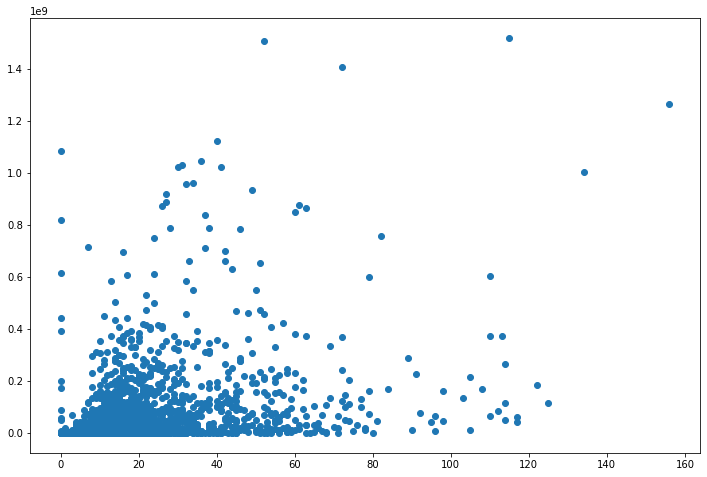

In [77]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['castCount'], y_train['revenue'])
plt.show()

In [78]:
list_of_actors = []
for l in x_train['list_of_cast']:
    for act in l:
        list_of_actors.append(act)

print(len(list_of_actors))
unique_actors = set(list_of_actors)
print(len(unique_actors))
top_100_actors_pair = Counter(list_of_actors).most_common(100)
top_100_actors = []
for p in top_100_actors_pair:
    top_100_actors.append(p[0])
Counter(list_of_actors).most_common(100)

49560
32697


[('Samuel L. Jackson', 25),
 ('Morgan Freeman', 24),
 ('Liam Neeson', 23),
 ('J.K. Simmons', 22),
 ('Robert De Niro', 22),
 ('Bruce Willis', 21),
 ('Bill Murray', 20),
 ('Forest Whitaker', 20),
 ('Willem Dafoe', 20),
 ('Jason Statham', 19),
 ('John Turturro', 19),
 ('Bruce McGill', 19),
 ('Susan Sarandon', 19),
 ('Ed Harris', 19),
 ('Robert Duvall', 18),
 ('Sylvester Stallone', 18),
 ('Denzel Washington', 17),
 ('Philip Seymour Hoffman', 17),
 ('Kevin Bacon', 17),
 ('Steve Buscemi', 17),
 ('Christopher Plummer', 17),
 ('Nicolas Cage', 16),
 ('Allison Janney', 16),
 ('Michael Caine', 16),
 ('Richard Jenkins', 16),
 ('John Goodman', 16),
 ('George Clooney', 16),
 ('Christopher Walken', 16),
 ('Dennis Quaid', 16),
 ('Mark Wahlberg', 15),
 ('Gene Hackman', 15),
 ('James Franco', 15),
 ('Ethan Hawke', 15),
 ('Brian Cox', 15),
 ('Jim Broadbent', 15),
 ('Christian Bale', 15),
 ('Matt Damon', 15),
 ('Colin Farrell', 15),
 ('Alec Baldwin', 15),
 ('Mel Gibson', 15),
 ('Ray Liotta', 15),
 ('Keith

In [79]:
x_train['countTop100Actors'] = pd.Series([len(list(set(x) & set(top_100_actors))) for x in x_train['list_of_cast']], index =x_train.index)
x_train

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast,castCount,countTop100Actors
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,tt0094898,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,28,6,1988,1,8,"[Eddie Murphy, Arsenio Hall, James Earl Jones,...",14,2
701,[],2.500000e+07,tt0091419,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,19,12,1986,1,27,"[Rick Moranis, Ellen Greene, Vincent Gardenia,...",17,1
227,[],5.000000e+07,tt1502404,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,24,2,2011,1,10,"[Nicolas Cage, Amber Heard, William Fichtner, ...",51,1
1698,[],3.085483e+07,tt0105391,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,31,1,1992,1,4,"[Michael Douglas, Melanie Griffith, Liam Neeso...",12,2
1011,[],3.500000e+07,tt3152624,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,17,7,2015,1,2,"[Amy Schumer, Bill Hader, Brie Larson, Colin Q...",34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"[{'id': 102019, 'name': 'Death Note Collection...",3.085483e+07,tt0912597,L: change the WorLd,"""The human whose name is written in the Death ...",8.271179,/ndgSMCX4QmfcEX66bS37EiLcUlj.jpg,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",129.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",...,0,0,31,1,2008,1,1,"[Shunji Fujimura, Mayuko Fukuda, Sei Hiraizumi...",5,0
1096,"[{'id': 645, 'name': 'James Bond Collection', ...",5.800000e+07,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,16,11,1995,1,15,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",20,0
1131,"[{'id': 87220, 'name': 'Smokey and the Bandit ...",3.085483e+07,tt0076729,Smokey and the Bandit,A race car driver tries to transport an illega...,7.683720,/yjhrtTAIxt6HpuckQjXEbmhGTIa.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,26,5,1977,1,4,"[Burt Reynolds, Sally Field, Jerry Reed, Jacki...",14,0


In [80]:
set(x_train['list_of_cast'].iloc[2]) & set(top_100_actors)

{'Nicolas Cage'}

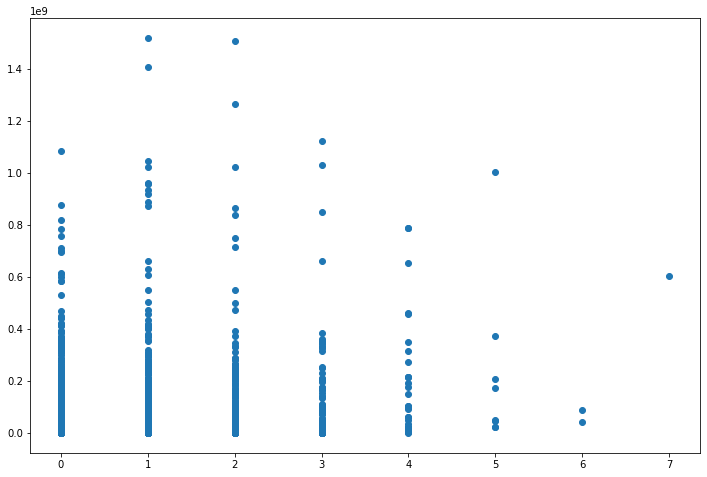

In [81]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['countTop100Actors'], y_train['revenue'])
plt.show()

In [82]:
#checked_actors = []
#for i, l in enumerate(train['list_of_cast']):
 #   for act in l:
  #      colName = 'is'+act
   #     if(act in top_100_actors and act not in checked_actors):
    #        checked_actors.append(act)
     #       train[colName] = pd.Series([1 if act in x else 0 for x in train['list_of_cast']], index =list(range(1,3001)))
#train

In [83]:
#for act in top_100_actors:
 #   col = 'is' + act
  #  print(col)
   # plt.figure(figsize=(3,3))
    #plt.scatter(col, "logRevenue", data=train)
    #plt.show()

In [84]:
dataset['list_of_cast'] = dataset['cast'].apply(lambda x: [act['name'] for act in x])
dataset['castCount'] = dataset['list_of_cast'].apply(lambda x: len(x))
list_of_actors = []
for l in dataset['list_of_cast']:
    for act in l:
        list_of_actors.append(act)

unique_actors = set(list_of_actors)
top_100_actors_pair = Counter(list_of_actors).most_common(100)
top_100_actors = []
for p in top_100_actors_pair:
    top_100_actors.append(p[0])
Counter(list_of_actors).most_common(100)
dataset['countTop100Actors'] = pd.Series([len(list(set(x) & set(top_100_actors))) for x in dataset['list_of_cast']], index =dataset.index)

In [85]:
dataset = dataset.drop(['cast'], axis=1)
dataset = dataset.drop(['list_of_cast'], axis=1)

CREW

In [86]:
x_train['list_of_crew'] = x_train['crew'].apply(lambda x: [act['name'] for act in x])


In [87]:
x_train['crew_count'] = x_train['list_of_crew'].apply(lambda x: len(x))

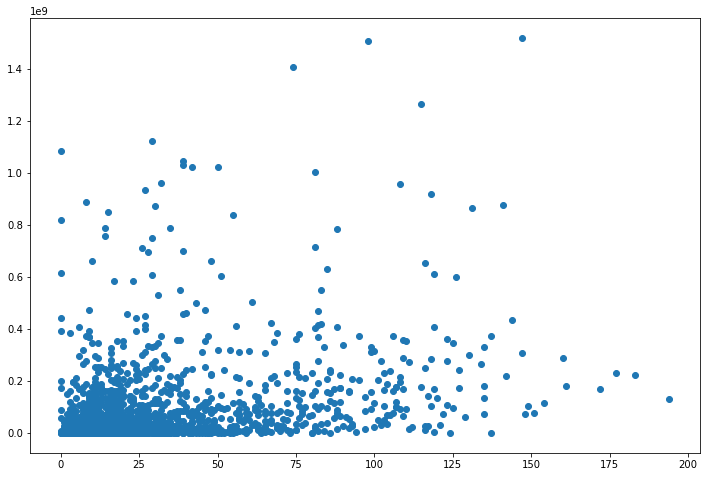

In [88]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['crew_count'], y_train['revenue'])
plt.show()

In [89]:
dataset['list_of_crew'] = dataset['crew'].apply(lambda x: [act['name'] for act in x])
dataset['crew_count'] = dataset['list_of_crew'].apply(lambda x: len(x))
dataset = dataset.drop(['list_of_crew'], axis=1)
dataset = dataset.drop(['crew'], axis=1)

In [90]:
dataset['Revenue'] = dataset['revenue']
dataset['LogRevenue'] = dataset['logRevenue']
dataset = dataset.drop(['revenue'], axis=1)
dataset = dataset.drop(['logRevenue'], axis=1)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   budget                                    3000 non-null   float64
 1   popularity                                3000 non-null   float64
 2   runtime                                   3000 non-null   float64
 3   has_collection                            3000 non-null   int64  
 4   isBudgetDirty                             3000 non-null   int64  
 5   genre_count                               3000 non-null   int64  
 6   hasHomepage                               3000 non-null   int64  
 7   is_english                                3000 non-null   int64  
 8   isParamount Pictures                      3000 non-null   int64  
 9   isUnited Artists                          3000 non-null   int64  
 10  isMetro-Goldwyn-Mayer (MGM)         

Predizioni

Baseline con Regressione lineare

In [92]:
dataset_mat = dataset.astype(float).values
x = dataset_mat[:, :2]
y = dataset_mat[:,35]

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [94]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Intercept: ", model.intercept_)
print ("Coefficients [slopes]:", model.coef_)
print ()
print ("Train Error : {:.3f}".format( mean_squared_error(y_true = y_train,  
                                          y_pred = y_pred_train)) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                          y_pred = y_pred_test)) )
model.score(x_test, y_test)

Intercept:  -41196973.74542251
Coefficients [slopes]: [2.59889525e+00 3.16315113e+06]

Train Error : 8411883287163542.000
Test Error : 7282202697059581.000


0.5479176051438146

In [95]:
#solo per grafico

pca = PCA(n_components=1)
x = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Intercept: ", model.intercept_)
print ("Coefficients [slopes]:", model.coef_)
print ()
print ("Train Error : {:.3f}".format( mean_squared_error(y_true = y_train,  
                                          y_pred = y_pred_train)) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                          y_pred = y_pred_test)) )
model.score(x_test, y_test)

Intercept:  67131902.38890475
Coefficients [slopes]: [2.94098569]

Train Error : 9763078678897512.000
Test Error : 8435797985416258.000


0.47630189457513206

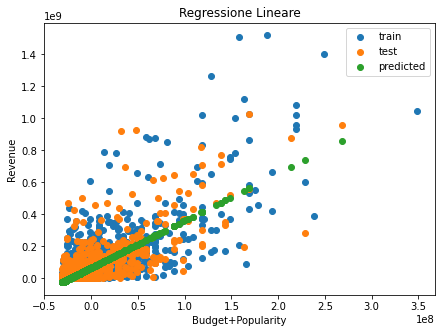

In [96]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_train, y_train, label='train')
ax.scatter(x_test, y_test, label='test')
ax.scatter(x_test, y_pred_test, label='predicted')
ax.set_title("Regressione Lineare")
ax.set_xlabel("Budget+Popularity")
ax.set_ylabel("Revenue")
ax.legend()

Modelli Predittivi

KNN

In [97]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

kNN = neighbors.KNeighborsRegressor(n_neighbors=10)
kNN.fit(x_train,y_train)

y_pred = kNN.predict(x_test)

# compute Accuracy
print ("Accuracy")
train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(x_train))
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(x_test))
print(train_acc)
print(test_acc)
print (kNN.score(x_test, y_test))

Accuracy
7363277233768258.0
8076215645518749.0
0.49862492678549564


In [99]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
scaler = MinMaxScaler()
scaler.fit(x_train)

kNN = neighbors.KNeighborsRegressor(n_neighbors=10)
kNN.fit(scaler.transform(x_train),y_train)

y_pred = kNN.predict(scaler.transform(x_test))

# compute Accuracy
print ("Accuracy")
train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(scaler.transform(x_train)))
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(scaler.transform(x_test)))
print(train_acc)
print(test_acc)
print (kNN.score(scaler.transform(x_test), y_test))

Accuracy
8501695470257469.0
7854216261484983.0
0.5124067476665742


[7974384088600888.0, 12]
[0.5555331291344641, 12]
8646791973247056.0


0.48591881646290647

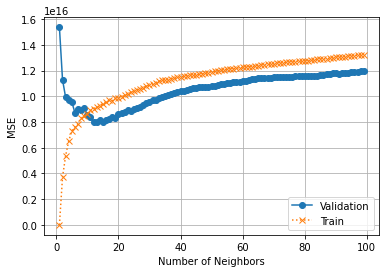

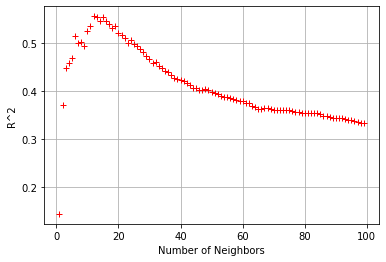

In [100]:
#validation con scaler

x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
scaler.fit(x_train)
train_mse=[]
valid_mse= []
R_square = []
for k in range(1,100):
    kNN = neighbors.KNeighborsRegressor(n_neighbors=k)
    kNN.fit(scaler.transform(x_train),y_train)

    y_pred = kNN.predict(scaler.transform(x_valid))

# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(scaler.transform(x_train)))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=kNN.predict(scaler.transform(x_valid)))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([kNN.score(scaler.transform(x_valid), y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Number of Neighbors")
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(R_square[:,1], R_square[:,0], "r+", label="R^2")
ax.set_ylabel("R^2")
ax.set_xlabel("Number of Neighbors")
ax.grid()

min_mse = float('inf')
best_k = 0
for mse, k in valid_mse:
    if(min_mse > mse):
        best_k = k
        min_mse = mse
        
kNN = neighbors.KNeighborsRegressor(n_neighbors=int(best_k))
kNN.fit(scaler.transform(x_train_80),y_train_80)
y_pred = kNN.predict(scaler.transform(x_test))
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(scaler.transform(x_test)))
print(test_acc)
kNN.score(scaler.transform(x_test), y_test)

[6783450318041946.0, 12]
[0.6219119993427711, 12]
8053835092763141.0


0.5211721191731791

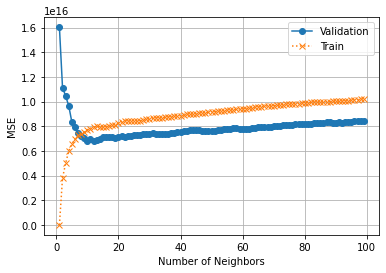

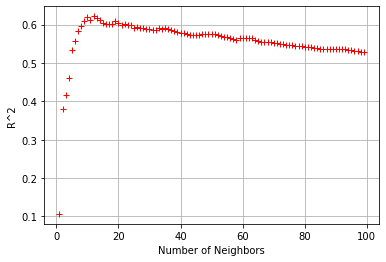

In [101]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
train_mse=[]
valid_mse= []
R_square = []
for k in range(1,100):
    kNN = neighbors.KNeighborsRegressor(n_neighbors=k)
    kNN.fit(x_train,y_train)

    y_pred = kNN.predict(x_valid)

# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(x_train))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=kNN.predict(x_valid))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([kNN.score(x_valid, y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Number of Neighbors")
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(R_square[:,1], R_square[:,0], "r+", label="R^2")
ax.set_ylabel("R^2")
ax.set_xlabel("Number of Neighbors")
ax.grid()

min_mse = float('inf')
best_k = 0
for mse, k in valid_mse:
    if(min_mse > mse):
        best_k = k
        min_mse = mse
        
kNN = neighbors.KNeighborsRegressor(n_neighbors=int(best_k))
kNN.fit(x_train_80,y_train_80)
y_pred = kNN.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(x_test))
print(test_acc)
kNN.score(x_test, y_test)

[0.5684290582715666, 23]
7289418594455162.0


0.5666192791582108

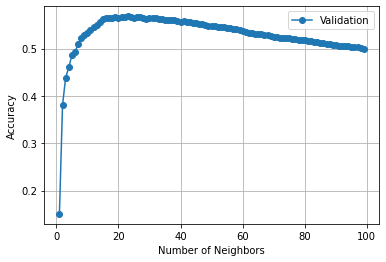

In [102]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
train_mse=[]
valid_acc= []
R_square = []
for k in range(1,100):
    kNN = neighbors.KNeighborsRegressor(n_neighbors=k)

    scores = cross_val_score(kNN, x_train_80, y_train_80, 
                         cv=5, 
                         verbose = 0)
    valid_acc_score = scores.mean()
    valid_acc.append([valid_acc_score, k])
print(max(valid_acc))

valid_acc = np.array(valid_acc)

fig, ax = plt.subplots()
ax.plot(valid_acc[:,1], valid_acc[:,0], "o-", label="Validation")

ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Neighbors")
ax.grid()
ax.legend()

max_acc = 0
best_k = 0
for acc, k in valid_acc:
    if(max_acc < acc):
        best_k = k
        max_acc = acc
        
kNN = neighbors.KNeighborsRegressor(n_neighbors=int(best_k))
kNN.fit(x_train_80,y_train_80)
y_pred = kNN.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(x_test))
print(test_acc)
kNN.score(x_test, y_test)

Regressione Lineare

In [103]:
x = dataset_mat[:, :35]
y = dataset_mat[:,35]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
scaler = MinMaxScaler()
scaler.fit(x_train)
model = LinearRegression(fit_intercept=True)
model.fit(scaler.transform(x_train), y_train)
y_pred_test = model.predict(scaler.transform(x_test))
y_pred_train = model.predict(scaler.transform(x_train))
print ("Intercept: ", model.intercept_)
print ("Coefficients [slopes]:", model.coef_)
print ()
print ("Train Error : {:.3f}".format( mean_squared_error(y_true = y_train,  
                                          y_pred = y_pred_train)) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                          y_pred = y_pred_test)) )
print(model.score(scaler.transform(x_test), y_test))

Intercept:  -39190413.09176437
Coefficients [slopes]: [ 9.14697082e+08  5.96905072e+08  5.76374202e+07  5.33838966e+07
 -5.31615945e+07 -2.10555018e+07  2.23028222e+07 -3.01455775e+06
  2.27646509e+07  2.03829205e+06 -1.40891645e+07  5.97405934e+07
 -6.24596818e+06 -1.63655535e+07 -9.29998570e+06  2.76645594e+07
  3.47224449e+06 -6.49671594e+06  3.31973163e+05  1.29251805e+07
 -1.30670531e+07  2.57241402e+06 -1.59721062e+07 -1.84955936e+07
 -2.97501126e+07 -2.44194730e+07 -2.07148576e+07  2.02543191e+07
  8.95060883e+06  3.31299674e+06 -3.22623992e+07  5.61737187e+07
  7.85339393e+07  8.02492520e+06  3.59427766e+04]

Train Error : 6548298164516332.000
Test Error : 5994543137058208.000
0.6436040279218367


Feature: 0, Score: 914697082.21172
Feature: 1, Score: 596905072.20645
Feature: 2, Score: 57637420.20256
Feature: 3, Score: 53383896.57188
Feature: 4, Score: -53161594.45887
Feature: 5, Score: -21055501.82527
Feature: 6, Score: 22302822.23083
Feature: 7, Score: -3014557.74610
Feature: 8, Score: 22764650.91478
Feature: 9, Score: 2038292.05395
Feature: 10, Score: -14089164.45891
Feature: 11, Score: 59740593.38141
Feature: 12, Score: -6245968.17717
Feature: 13, Score: -16365553.51001
Feature: 14, Score: -9299985.70296
Feature: 15, Score: 27664559.37953
Feature: 16, Score: 3472244.49486
Feature: 17, Score: -6496715.94272
Feature: 18, Score: 331973.16316
Feature: 19, Score: 12925180.47079
Feature: 20, Score: -13067053.13433
Feature: 21, Score: 2572414.02403
Feature: 22, Score: -15972106.24109
Feature: 23, Score: -18495593.63035
Feature: 24, Score: -29750112.57916
Feature: 25, Score: -24419473.03832
Feature: 26, Score: -20714857.63272
Feature: 27, Score: 20254319.12128
Feature: 28, Score: 895

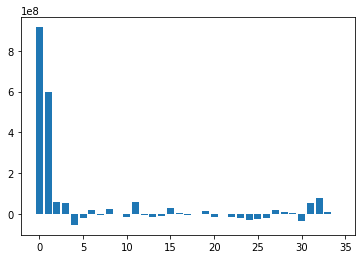

In [104]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Albero di Decisione

In [105]:
x = dataset_mat[:, :35]
y = dataset_mat[:,35]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
dt = tree.DecisionTreeRegressor(max_leaf_nodes=10)
dt.fit(x_train,y_train)
train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(x_train))
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(train_acc)
print(test_acc)
print(dt.score(x_test, y_test))

6036410932602866.0
9912567606418978.0
0.41066415119436306


[8620029798063592.0, 70]
[0.5195468855595078, 70]
1.034252058625069e+16


0.3851019846219452

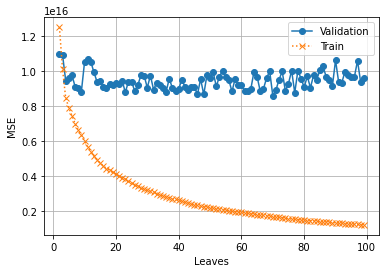

In [106]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
train_mse=[]
valid_mse= []
R_square = []
for k in range(2,100):
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=k)
    dt.fit(x_train,y_train)

    y_pred = dt.predict(x_valid)

# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(x_train))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=dt.predict(x_valid))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([dt.score(x_valid, y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Leaves")
ax.grid()
ax.legend()


min_mse = float('inf')
best_k = 0
for mse, k in valid_mse:
    if(min_mse > mse):
        best_k = k
        min_mse = mse
        
dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
dt.fit(x_train_80,y_train_80)
y_pred = dt.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(test_acc)
dt.score(x_test, y_test)

Feature: 0, Score: 0.62339
Feature: 1, Score: 0.10806
Feature: 2, Score: 0.03889
Feature: 3, Score: 0.03860
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.02141
Feature: 6, Score: 0.00292
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00476
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00235
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00127
Feature: 28, Score: 0.01329
Feature: 29, Score: 0.02521
Feature: 30, Score: 0.02942
Feature: 31, Score: 0.00684
Feature: 32, Score: 0.05931
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.02429


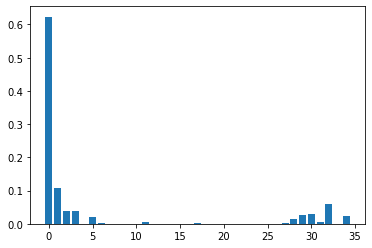

In [107]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [108]:
#approfondire importance
accuraces = []
for min_imp in np.arange(0, 0.5, 0.01):
    sel_features = []
    for i, x in enumerate(importance):
        if(x >min_imp):
            sel_features.append(i)

    x = dataset_mat[:,sel_features]
    y = dataset_mat[:,35]
    x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_valid)
    test_acc = mean_squared_error(y_true=y_valid, y_pred=dt.predict(x_valid))
    accuraces.append((dt.score(x_valid, y_valid), sel_features))
    
best_features = max(accuraces)[1]
x = dataset_mat[:,best_features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(test_acc, dt.score(x_test, y_test))

1.0739489749819666e+16 0.3615008180775586


[0.5468594085751853, 5]
8009607089528607.0
0.5238016243490453


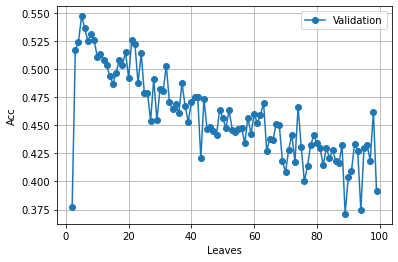

In [109]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
train_mse=[]
valid_acc= []
R_square = []
for k in range(2,100):
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=k)
    scores = cross_val_score(dt, x_train_80, y_train_80, 
                         cv=5, 
                         verbose = 0)
    valid_acc_score = scores.mean()
    valid_acc.append([valid_acc_score, k])
print(max(valid_acc))
valid_acc = np.array(valid_acc)

fig, ax = plt.subplots()
ax.plot(valid_acc[:,1], valid_acc[:,0], "o-", label="Validation")

ax.set_ylabel("Acc")
ax.set_xlabel("Leaves")
ax.grid()
ax.legend()


max_acc = 0
best_k = 0
for acc, k in valid_acc:
    if(max_acc < acc):
        best_k = k
        max_acc = acc
        
dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
dt.fit(x_train_80,y_train_80)
y_pred = dt.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(test_acc)
print(dt.score(x_test, y_test))

Feature: 0, Score: 0.85346
Feature: 1, Score: 0.07081
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.07574
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000


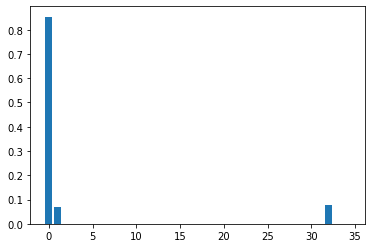

In [110]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [111]:
#approfondire importance
accuraces = []
for min_imp in np.arange(0, 0.1, 0.01):
    sel_features = []
    for i, x in enumerate(importance):
        if(x >min_imp):
            sel_features.append(i)

    x = dataset_mat[:,sel_features]
    y = dataset_mat[:,35]
    x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
    scores = cross_val_score(dt, x_train_80, y_train_80, 
                             cv=5, 
                             verbose = 0)
    valid_acc_score = scores.mean()
    accuraces.append((valid_acc_score, sel_features))
    
best_features = max(accuraces)[1]
x = dataset_mat[:,best_features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(test_acc, dt.score(x_test, y_test))

8009607089528607.0 0.5238016243490453


In [112]:
#knn validation scaler peggiora rispetto senza validation
#grafico cross validation
#importanza delle variabili nell'albero di decisione con e senza cross validation(perchè peggiora senza cv)
#discussione importanza features: ha senso rimuovere feature non importanti in questo caso? bisogna eleiminare in train e validatione poi fare il test?
#andando avanti: foreste con boosting e bagging, possibili altri algoritmi?
#lightgbm
#esplorare punti di precisione bassa


Random Forest

In [219]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
train_acc = mean_squared_error(y_true=y_train, y_pred=rf.predict(x_train))
test_acc = mean_squared_error(y_true=y_test, y_pred=rf.predict(x_test))
acc = rf.score(x_test,y_test)
print(train_acc)
print(test_acc)
acc

919291337286509.2
5279001682318718.0


0.6861454003823326

(array([ 1.42464192,  0.        ,  5.6985677 , 12.82177732, 15.67106117,
        41.31461581, 34.19140618, 18.52034502,  9.97249347,  2.84928385]),
 array([0.66277699, 0.6697963 , 0.67681561, 0.68383492, 0.69085422,
        0.69787353, 0.70489284, 0.71191215, 0.71893145, 0.72595076,
        0.73297007]),
 <BarContainer object of 10 artists>)

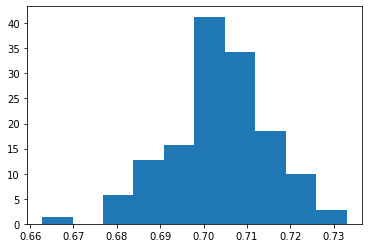

In [227]:
hist_data = []
for i in range (0,100):
    rf = RandomForestRegressor(n_estimators=50)
    rf.fit(x_train,y_train)
    hist_data.append(rf.score(x_test,y_test))
plt.hist(hist_data, density = True)

[5677947127077827.0, 68]
[0.6835292400676152, 68]
5067539459796981.0


0.6987175485227877

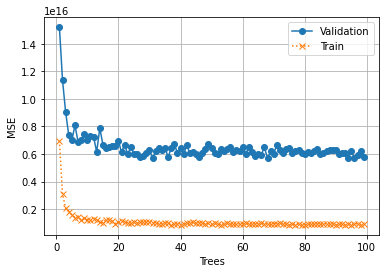

In [229]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
train_mse=[]
valid_mse= []
R_square = []
for k in range(1,100):
    rf = RandomForestRegressor(n_estimators=k)
    rf.fit(x_train,y_train)
# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=rf.predict(x_train))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=rf.predict(x_valid))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([rf.score(x_valid, y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Trees")
ax.grid()
ax.legend()


min_mse = float('inf')
best_k = 0
for mse, k in valid_mse:
    if(min_mse > mse):
        best_k = k
        min_mse = mse
        
rf = RandomForestRegressor(n_estimators=int(best_k))
rf.fit(x_train_80,y_train_80)
test_acc = mean_squared_error(y_true=y_test, y_pred=rf.predict(x_test))
print(test_acc)
rf.score(x_test, y_test)

(array([ 8.94148887, 23.84397031, 35.76595547, 41.72694805, 53.6489332 ,
        53.6489332 , 32.78545918, 29.80496289, 11.92198516,  5.96099258]),
 array([0.69269948, 0.69605463, 0.69940977, 0.70276492, 0.70612007,
        0.70947521, 0.71283036, 0.7161855 , 0.71954065, 0.7228958 ,
        0.72625094]),
 <BarContainer object of 10 artists>)

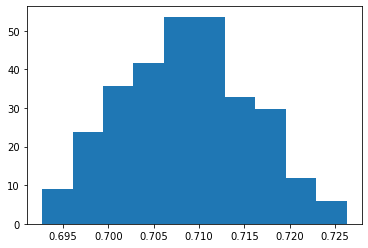

In [230]:
hist_data = []
for i in range (0,100):
    rf = RandomForestRegressor(n_estimators=int(best_k))
    rf.fit(x_train,y_train)
    hist_data.append(rf.score(x_test,y_test))
plt.hist(hist_data, density = True)

Feature: 0, Score: 0.56153
Feature: 1, Score: 0.10767
Feature: 2, Score: 0.04927
Feature: 3, Score: 0.03243
Feature: 4, Score: 0.00167
Feature: 5, Score: 0.01124
Feature: 6, Score: 0.00679
Feature: 7, Score: 0.00058
Feature: 8, Score: 0.00390
Feature: 9, Score: 0.00091
Feature: 10, Score: 0.00029
Feature: 11, Score: 0.00224
Feature: 12, Score: 0.00172
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00016
Feature: 15, Score: 0.00093
Feature: 16, Score: 0.00293
Feature: 17, Score: 0.00423
Feature: 18, Score: 0.00056
Feature: 19, Score: 0.00137
Feature: 20, Score: 0.00098
Feature: 21, Score: 0.00182
Feature: 22, Score: 0.00101
Feature: 23, Score: 0.00019
Feature: 24, Score: 0.00058
Feature: 25, Score: 0.00047
Feature: 26, Score: 0.00040
Feature: 27, Score: 0.00223
Feature: 28, Score: 0.01780
Feature: 29, Score: 0.03306
Feature: 30, Score: 0.02558
Feature: 31, Score: 0.02115
Feature: 32, Score: 0.05706
Feature: 33, Score: 0.01046
Feature: 34, Score: 0.03680


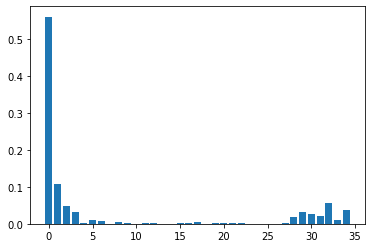

In [115]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [116]:
accuraces = []
for min_imp in np.arange(0, 0.5, 0.01):
    sel_features = []
    for i, x in enumerate(importance):
        if(x >min_imp):
            sel_features.append(i)

    x = dataset_mat[:,sel_features]
    y = dataset_mat[:,35]
    x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
    rf = RandomForestRegressor(n_estimators=int(best_k))
    rf.fit(x_train,y_train)
    test_acc = mean_squared_error(y_true=y_valid, y_pred=rf.predict(x_valid))
    accuraces.append((rf.score(x_valid, y_valid), sel_features))
    
best_features = max(accuraces)[1]
x = dataset_mat[:,best_features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
rf = RandomForestRegressor(n_estimators=int(best_k))
rf.fit(x_train, y_train)
test_acc = mean_squared_error(y_true=y_test, y_pred=rf.predict(x_test))
print(test_acc, rf.score(x_test, y_test))
len(best_features)

5701656292468702.0 0.6610171467033304


12

[0.6757408362087022, 89]
5043299606113174.0
0.7001586902443755


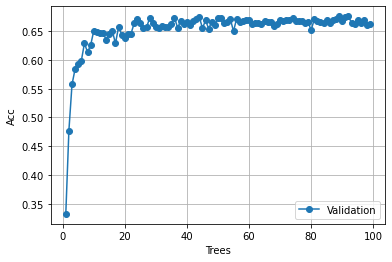

In [231]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
train_mse=[]
valid_acc= []
R_square = []
for k in range(1,100):
    rf = RandomForestRegressor(n_estimators=k)
    scores = cross_val_score(rf, x_train_80, y_train_80, 
                         cv=5, 
                         verbose = 0)
    valid_acc_score = scores.mean()
    valid_acc.append([valid_acc_score, k])
print(max(valid_acc))
valid_acc = np.array(valid_acc)

fig, ax = plt.subplots()
ax.plot(valid_acc[:,1], valid_acc[:,0], "o-", label="Validation")

ax.set_ylabel("Acc")
ax.set_xlabel("Trees")
ax.grid()
ax.legend()


max_acc = 0
best_k = 0
for acc, k in valid_acc:
    if(max_acc < acc):
        best_k = k
        max_acc = acc
        
rf = RandomForestRegressor(n_estimators=int(best_k))
rf.fit(x_train_80,y_train_80)
test_acc = mean_squared_error(y_true=y_test, y_pred=rf.predict(x_test))
print(test_acc)
print(rf.score(x_test, y_test))

(array([ 6.80993747, 13.61987495, 29.96372488, 34.04968737, 62.65142476,
        46.30757482, 39.49763735, 20.42981242, 10.89589996,  8.17192497]),
 array([0.69205656, 0.69572767, 0.69939877, 0.70306988, 0.70674098,
        0.71041209, 0.71408319, 0.7177543 , 0.7214254 , 0.72509651,
        0.72876762]),
 <BarContainer object of 10 artists>)

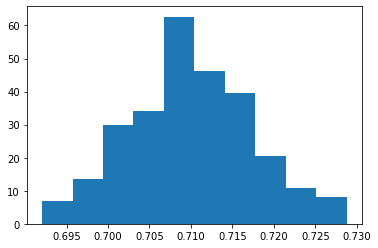

In [234]:
hist_data = []
for i in range (0,200):
    rf = RandomForestRegressor(n_estimators=int(best_k))
    rf.fit(x_train,y_train)
    hist_data.append(rf.score(x_test,y_test))
plt.hist(hist_data, density = True)

Feature: 0, Score: 0.55515
Feature: 1, Score: 0.11558
Feature: 2, Score: 0.04837
Feature: 3, Score: 0.04134
Feature: 4, Score: 0.00171
Feature: 5, Score: 0.01197
Feature: 6, Score: 0.00736
Feature: 7, Score: 0.00127
Feature: 8, Score: 0.00321
Feature: 9, Score: 0.00075
Feature: 10, Score: 0.00033
Feature: 11, Score: 0.00356
Feature: 12, Score: 0.00238
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00016
Feature: 15, Score: 0.00183
Feature: 16, Score: 0.00290
Feature: 17, Score: 0.00234
Feature: 18, Score: 0.00065
Feature: 19, Score: 0.00112
Feature: 20, Score: 0.00125
Feature: 21, Score: 0.00178
Feature: 22, Score: 0.00091
Feature: 23, Score: 0.00015
Feature: 24, Score: 0.00080
Feature: 25, Score: 0.00045
Feature: 26, Score: 0.00051
Feature: 27, Score: 0.00172
Feature: 28, Score: 0.01917
Feature: 29, Score: 0.03490
Feature: 30, Score: 0.02585
Feature: 31, Score: 0.02227
Feature: 32, Score: 0.04141
Feature: 33, Score: 0.01046
Feature: 34, Score: 0.03637


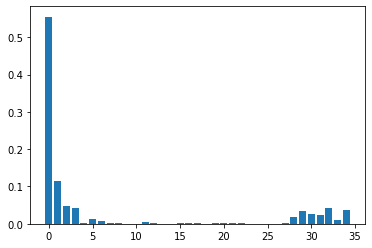

In [122]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

31


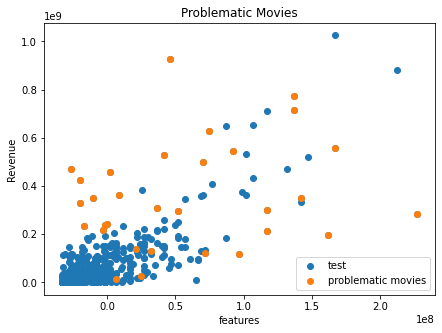

In [166]:
#error exploration
predicted_y = rf.predict(x_test)
sel_errors_pos = []
errors = np.square((predicted_y - y_test)**2)
test_acc = np.mean(errors)
for i, err in enumerate(errors):
    if(err > test_acc):
        sel_errors_pos.append((i))

pca = PCA(n_components=1)
x = pca.fit_transform(x_test)
problematic_movies = x[sel_errors_pos]
print(len(y_test[sel_errors_pos]))
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x, y_test, label='test')
ax.scatter(problematic_movies, y_test[sel_errors_pos], label='problematic movies')
ax.set_title("Problematic Movies")
ax.set_xlabel("features")
ax.set_ylabel("Revenue")
ax.legend()



<ipython-input-217-979d679ab730>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7,5))


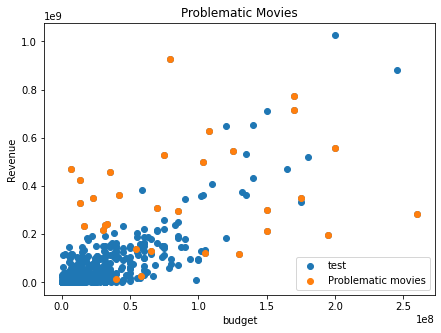

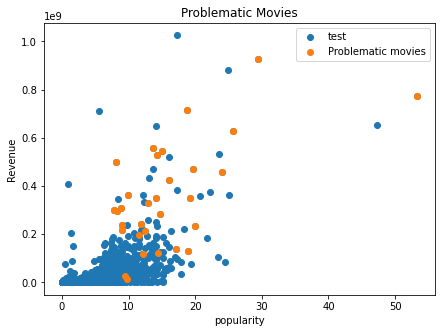

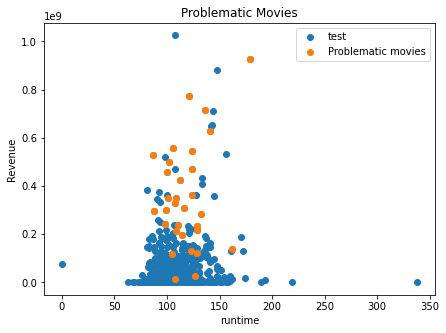

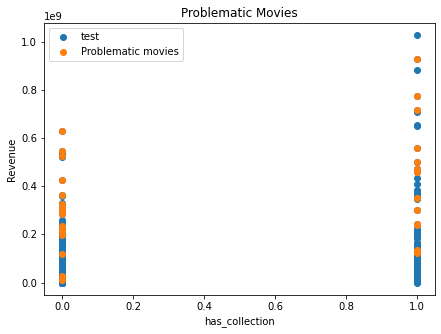

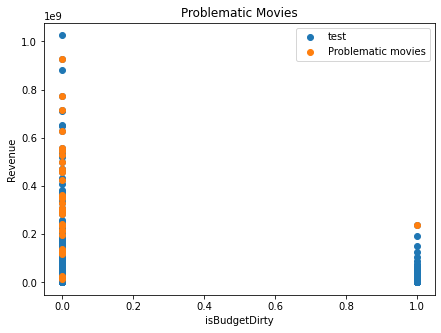

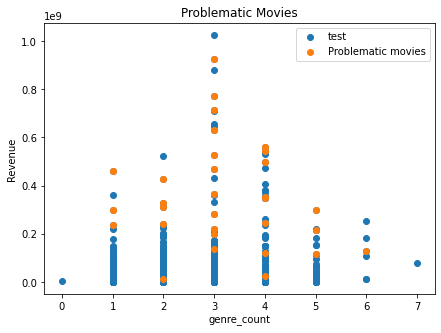

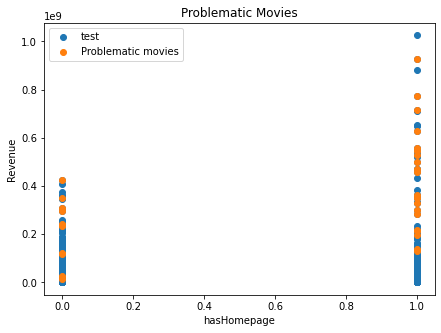

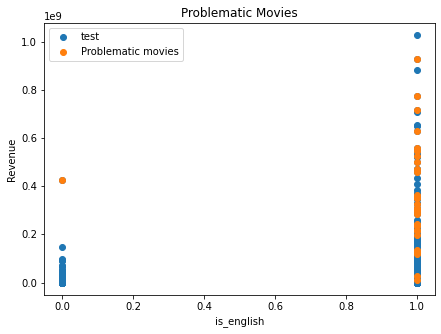

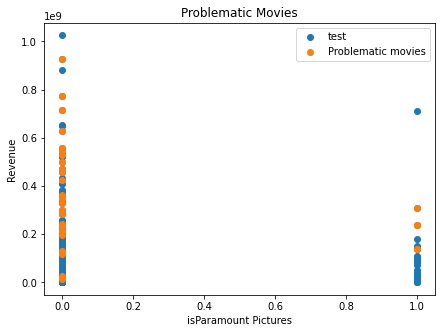

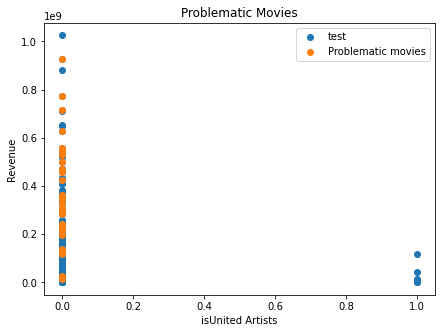

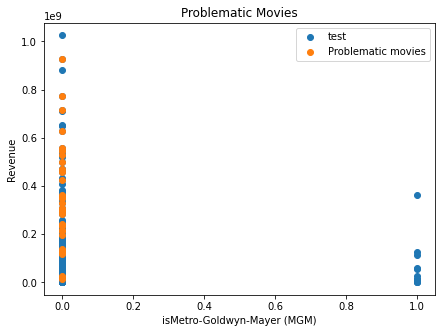

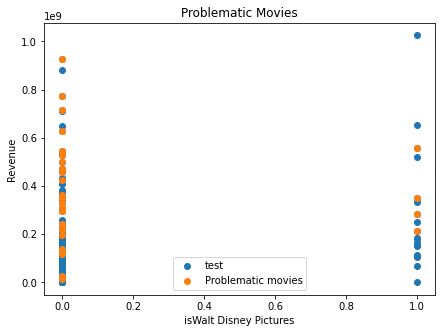

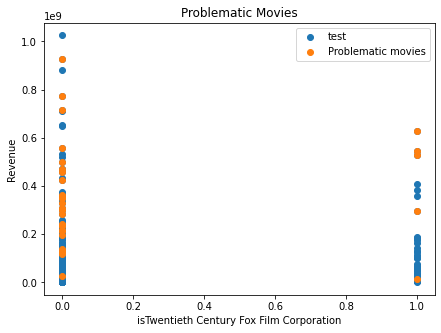

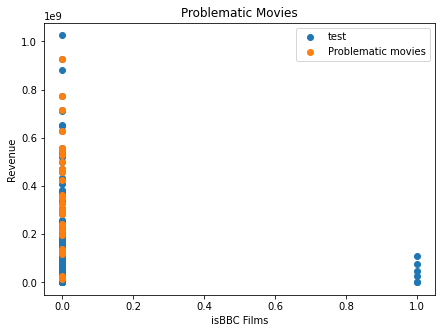

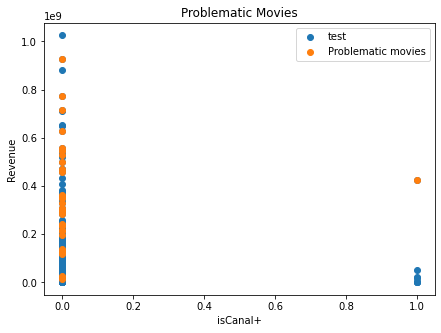

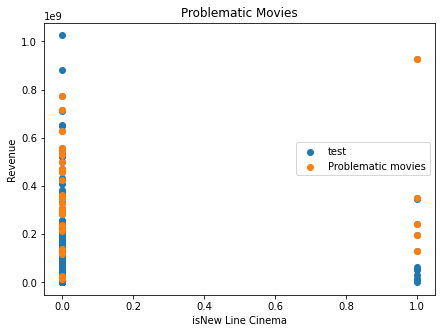

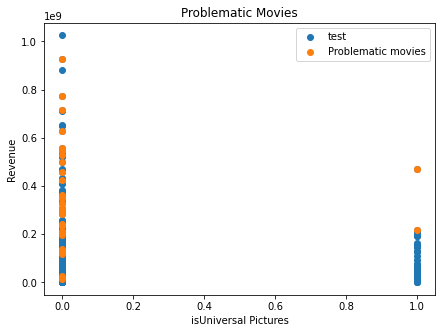

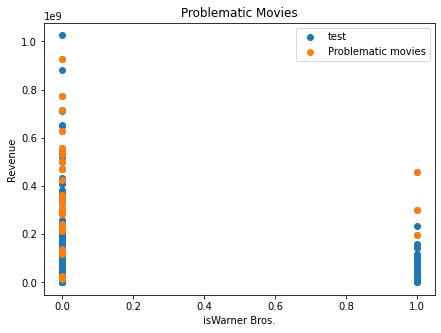

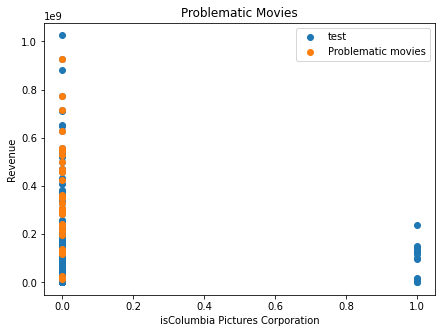

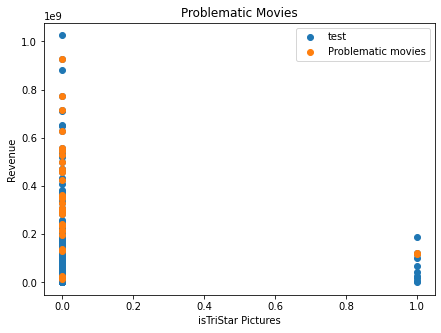

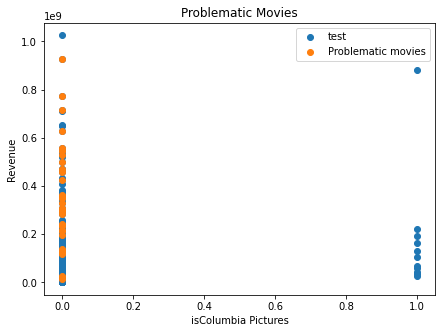

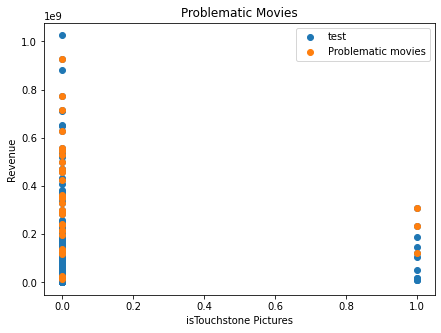

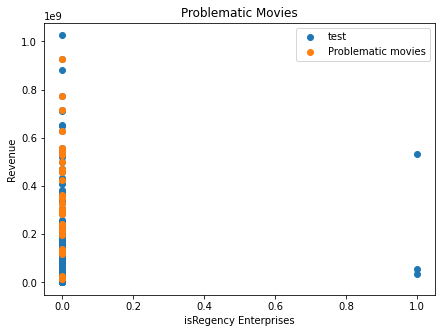

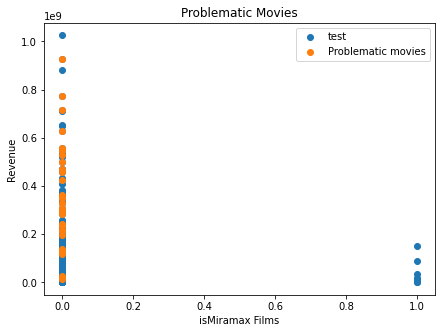

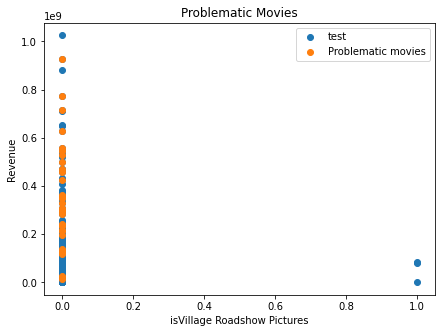

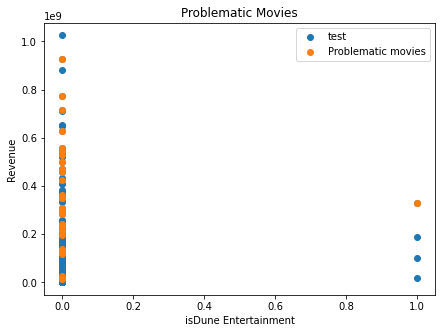

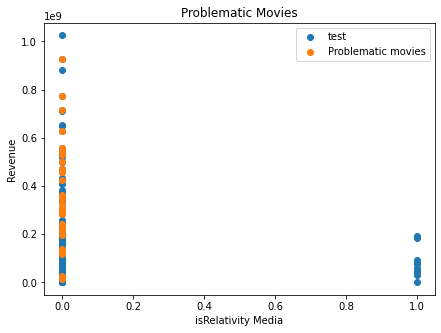

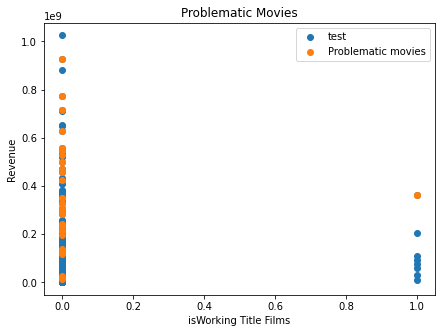

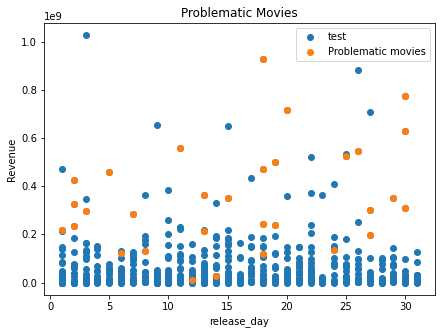

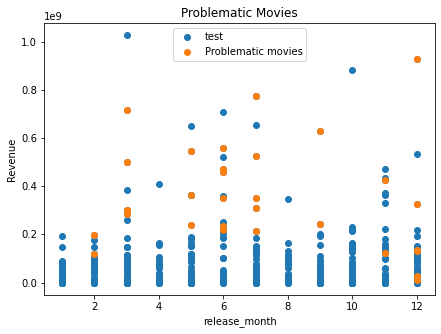

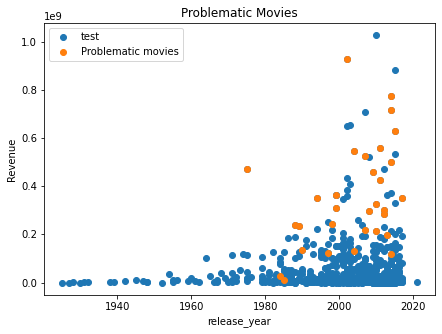

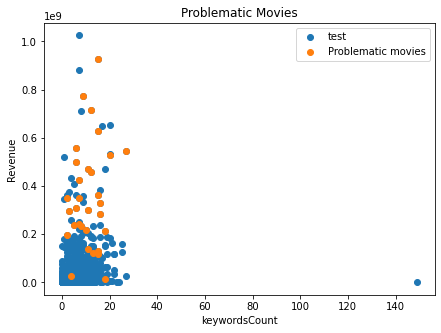

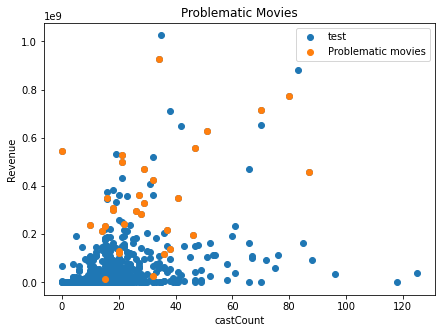

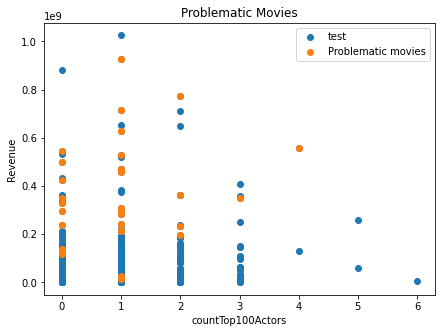

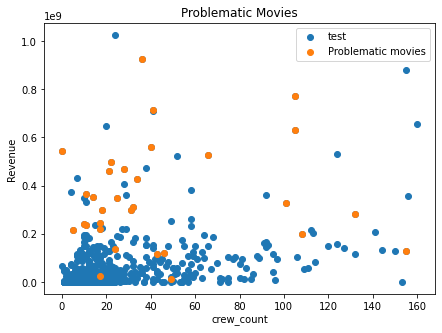

In [217]:
for i in range(35):
    problematic = (x_test[sel_errors_pos][:,i])
    test = x_test[:,i]
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(test, y_test, label='test')
    ax.scatter(problematic, y_test[sel_errors_pos], label="Problematic movies")
    ax.set_title("Problematic Movies")
    ax.set_xlabel(dataset.columns[i])
    ax.set_ylabel("Revenue")
    ax.legend()

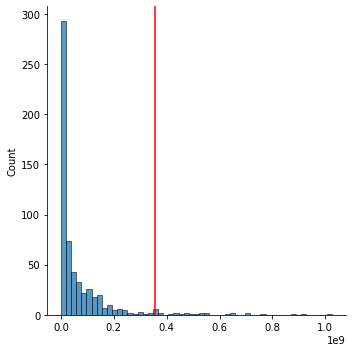

In [216]:
ax = sns.displot((y_test))
plt.axvline(np.mean((y_test[sel_errors_pos])), color='red')

In [235]:
#boosting
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
rf = RandomForestRegressor(n_estimators=int(best_k))
adaboost = AdaBoostRegressor(rf)
adaboost.fit(x_train_80,y_train_80)
adaboost.score(x_test,y_test)

0.7130374956518162

In [ ]:
hist_data = []
for i in range (0,200):
    rf = RandomForestRegressor(n_estimators=int(best_k))
    adaboost = AdaBoostRegressor(rf)
    adaboost.fit(x_train_80,y_train_80)
    hist_data.append(adaboost.score(x_test,y_test))
plt.hist(hist_data, density = True)

In [120]:
x = dataset_mat[:,:35]
y = dataset_mat[:,35]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
train_mse=[]
valid_acc= []
R_square = []
rf = RandomForestRegressor(n_estimators=int(best_k))
for k in range(1,100):
    adaboost = AdaBoostRegressor(rf, n_estimators = k)
    scores = cross_val_score(adaboost, x_train_80, y_train_80, 
                         cv=5, 
                         verbose = 0)
    valid_acc_score = scores.mean()
    valid_acc.append([valid_acc_score, k])
print(max(valid_acc))
valid_acc = np.array(valid_acc)

fig, ax = plt.subplots()
ax.plot(valid_acc[:,1], valid_acc[:,0], "o-", label="Validation")

ax.set_ylabel("Acc")
ax.set_xlabel("Trees")
ax.grid()
ax.legend()


max_acc = 0
best_k_ada = 0
for acc, k in valid_acc:
    if(max_acc < acc):
        best_k_ada = k
        max_acc = acc
        
adaboost = AdaBoostRegressor(rf, n_estimators = int(best_k_ada))
adaboost.fit(x_train_80,y_train_80)
test_acc = mean_squared_error(y_true=y_test, y_pred=adaboost.predict(x_test))
print(test_acc)
print(adaboost.score(x_test, y_test))

KeyboardInterrupt: 

In [ ]:
hist_data = []
for i in range (0,200):
    rf = RandomForestRegressor(n_estimators=int(best_k))
    adaboost = AdaBoostRegressor(rf, n_estimators = int(best_k_ada))
    adaboost.fit(x_train_80,y_train_80)
    hist_data.append(adaboost.score(x_test,y_test))
plt.hist(hist_data, density = True)